# Pacotes úteis

In [1]:
# !pip install numpy
# !pip install statsmodels
# !pip install pylab
# !pip install pmdarima
# !pip install lightgbm
# !pip install scikit-learn
# !pip install xgboost
# !pip install optuna
# !pip install scipy
# !pip install tensorflow
# !pip install keras
# !pip install pandas
# !pip install imageio
# !pip install matplotlib
# !pip install plotly
# !pip install seaborn
# !pip install tensorflow-gpu
# !pip install openpyxl
# !pip install scikit-optimize
# !pip install scikeras[tensorflow]
# !pip install nbformat
# !pip install -U kaleido
# !pip install prophet
# !pip install scikit-posthocs

In [2]:
import imageio  # Pacote para criação de animações a partir de imagens
import matplotlib.animation as animation  # Pacote para criação de animações
import matplotlib.pyplot as plt  # Pacote para criação de gráficos e visualizações
import numpy as np  # Pacote para manipulação de arrays e cálculos numéricos
import optuna  # Pacote para otimização de hiperparâmetros com Optuna
import pandas as pd  # Pacote para manipulação de dados em formato de tabela
import plotly.graph_objects as go  # Pacote para criação de gráficos interativos
import random  # Importar módulo random
import seaborn as sns  # Pacote para visualizações estatísticas avançadas
import statsmodels.api as sm  # Pacote para análise estatística avançada
import tensorflow as tf
import logging
from IPython.display import HTML  # Pacote para exibir conteúdo HTML no Jupyter Notebook

from pmdarima import auto_arima
from pmdarima.metrics import smape
from openpyxl import load_workbook
# Importar o módulo warnings
import warnings

from tensorflow import keras
from matplotlib import rcParams
from keras.layers import Conv1D, Dense, Flatten, GRU, LSTM, MaxPooling1D  # Camadas para redes neurais em Keras
from keras.models import Sequential  # Pacote para criação de modelos sequenciais em Keras
from lightgbm import LGBMRegressor  # Pacote para criação de modelos de aprendizado de máquina com LightGBM
from pmdarima.arima import ADFTest  # Pacote para teste de estacionariedade ADF (Augmented Dickey-Fuller)
from scipy import stats  # Pacote para funções estatísticas
from skopt import BayesSearchCV, space  # Pacote para busca de hiperparâmetros com validação cruzada e otimização Bayesiana
from sklearn.datasets import make_regression  # Pacote para geração de dados de regressão
from sklearn.ensemble import RandomForestRegressor  # Pacote para criação de modelos de aprendizado de máquina com Random Forest
from sklearn.linear_model import Lasso, LinearRegression, Ridge  # Pacotes para criação de modelos de regressão
from sklearn.metrics import (make_scorer, mean_absolute_error,
                             mean_absolute_percentage_error, mean_squared_error,
                             r2_score)  # Pacote para cálculo de métricas de erro
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV,
                                     cross_val_score, learning_curve,
                                     train_test_split, validation_curve)  # Pacote para divisão de dados de treinamento e teste e validação cruzada
from sklearn.tree import DecisionTreeRegressor as dt  # Pacote para criação de modelos de árvore de decisão
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Pacote para plotagem de funções de autocorrelação e autocorrelação parcial
from statsmodels.tsa.ar_model import AutoReg as AR  # Pacote para modelagem de séries temporais com modelo AutoReg
from statsmodels.tsa.arima.model import ARIMA  # Pacote para modelagem de séries temporais com modelo ARIMA
from statsmodels.tsa.filters.hp_filter import hpfilter  # Pacote para filtragem de séries temporais
from statsmodels.tsa.seasonal import seasonal_decompose as stl  # Pacote para decomposição de séries temporais
from statsmodels.tsa.stattools import adfuller  # Pacote para teste de estacionariedade ADF
from statsmodels.tsa.statespace.sarimax import SARIMAX as sr  # Pacote para modelagem de séries temporais com modelo SARIMAX
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor  # Pacote para envolver modelos Keras como estimadores do Scikit-learn
from scikeras.wrappers import KerasRegressor # Pacote para envolver modelos Keras como estimadores do Scikit-learn
from xgboost import XGBRegressor  # Pacote para criação de modelos de aprendizado de máquina com XGBoost

# Configuração para ignorar avisos
warnings.filterwarnings('ignore')

# Configuração para exibir gráficos no Jupyter Notebook
# %matplotlib notebook
%matplotlib inline
# %matplotlib auto
# ou %matplotlib tk
# ou %matplotlib qt
# %matplotlib qt
# %matplotlib agg


In [3]:
import numpy as np
import pandas as pd
from scipy.stats import yeojohnson
from sklearn.preprocessing import StandardScaler

# EDA



## Carregando o dataset

In [4]:

# Leitura das planilhas
data_frames = pd.read_excel("DadosBA.xlsx", sheet_name=None)

# Concatenar data de 2018, 2019 e 2020
df = pd.concat([data_frames['2018'], data_frames['2019']])

# Definir a coluna Timestamp como índice
df.set_index('Timestamp', inplace=True)

# Substituir 'Bad' por NaN e interpolá-los
df.replace(to_replace='Bad', value=np.nan, inplace=True)
df.interpolate(inplace=True)

# Filtrar o DataFrame para manter apenas o período de 2018 a 2020
df = df.loc['2018-01-01':'2020-12-31']

# Renomear colunas
df = df.rename(columns={
    'BAIRRO ALTO -  / FREQ B1': 'FREQUENCIA BOMBA 1',
    'BAIRRO ALTO -  / FREQ B2': 'FREQUENCIA BOMBA 2',
    'BAIRRO ALTO -  / FREQ B3': 'FREQUENCIA BOMBA 3',
    'BAIRRO ALTO - LT01 / NÍVEL': 'NIVEL DO RESERVATÓRIO - LT01',
    'BAIRRO ALTO - FT01 / ENT IRAI': 'VAZÃO DE ENTRADA - FT01',
    'BAIRRO ALTO - FT02 / GBAL': 'VAZÃO DE GRAVIDADE - FT02',
    'BAIRRO ALTO - FT03 / RBAL': 'VAZÃO DE RECALQUE - FT03',
    'BAIRRO ALTO - PT01 / SUCÇÃO': 'PRESSÃO DE SUCÇÃO - PT01',
    'BAIRRO ALTO - PT02 / RBAL': 'PRESSÃO DE RECALQUE - PT02'
})

# Verificar se não há valores NaN
print(df.isna().any())


FREQUENCIA BOMBA 1              False
FREQUENCIA BOMBA 2              False
FREQUENCIA BOMBA 3              False
NIVEL DO RESERVATÓRIO - LT01    False
VAZÃO DE ENTRADA - FT01         False
VAZÃO DE GRAVIDADE - FT02       False
VAZÃO DE RECALQUE - FT03        False
PRESSÃO DE SUCÇÃO - PT01        False
PRESSÃO DE RECALQUE - PT02      False
dtype: bool


In [5]:
# Verificar a forma do DataFrame após o resample
print(df.shape)

(17522, 9)


In [6]:
# Aplicar a transformação Yeo-Johnson
transformed_data = []
for i in range(df.shape[1]):
    col = df.iloc[:, i]
    yj_result = yeojohnson(col)
    transformed_col = yj_result[0]
    transformed_data.append(transformed_col)

# Criar um novo DataFrame com as colunas transformadas
df_transformed = pd.DataFrame(transformed_data).T
df_transformed.columns = df.columns
print(df_transformed)

       FREQUENCIA BOMBA 1  FREQUENCIA BOMBA 2  FREQUENCIA BOMBA 3  \
0            13574.464810           -0.000000                -0.0   
1            14522.884782           -0.000000                -0.0   
2             9193.196058           -0.000000                -0.0   
3             8488.039173           -0.000000                -0.0   
4             8251.876650           -0.000000                -0.0   
...                   ...                 ...                 ...   
17517        39044.582986            3.216874                -0.0   
17518        39044.582986            3.172094                -0.0   
17519        39044.582986            3.152983                -0.0   
17520        31574.998779           -0.000000                -0.0   
17521        29743.886140           -0.000000                -0.0   

       NIVEL DO RESERVATÓRIO - LT01  VAZÃO DE ENTRADA - FT01  \
0                        131.079242               126.730126   
1                        153.936456        

In [7]:
# Normalizar os dados
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_transformed), columns=df_transformed.columns)
print(df_normalized)

       FREQUENCIA BOMBA 1  FREQUENCIA BOMBA 2  FREQUENCIA BOMBA 3  \
0               -1.795299           -0.962555           -0.305236   
1               -1.702860           -0.962555           -0.305236   
2               -2.222325           -0.962555           -0.305236   
3               -2.291054           -0.962555           -0.305236   
4               -2.314072           -0.962555           -0.305236   
...                   ...                 ...                 ...   
17517            0.687180            1.047716           -0.305236   
17518            0.687180            1.019732           -0.305236   
17519            0.687180            1.007790           -0.305236   
17520           -0.040853           -0.962555           -0.305236   
17521           -0.219325           -0.962555           -0.305236   

       NIVEL DO RESERVATÓRIO - LT01  VAZÃO DE ENTRADA - FT01  \
0                          0.807721                 0.498543   
1                          1.333705        

In [8]:
df.tail()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA - FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02
Timestamp,,,,,,,,,
2019-12-31 19:00:00,57.988792,38.456902,0.0,3.250732,0.115741,162.143372,132.197601,4.000379,22.989004
2019-12-31 20:00:00,57.988792,36.208035,0.0,2.779499,0.115741,152.232193,127.253036,3.544534,21.968084
2019-12-31 21:00:00,57.988792,35.290569,0.0,2.357698,0.115741,126.166389,112.359825,3.239255,21.858894
2019-12-31 22:00:00,53.753368,0.000000,0.0,2.331112,270.812164,107.925911,89.857338,3.280874,18.970631
2019-12-31 23:00:00,52.617512,0.000000,0.0,2.479086,273.187653,98.132408,85.902672,3.472287,18.974443


# Barra da demanda no horario de pico 

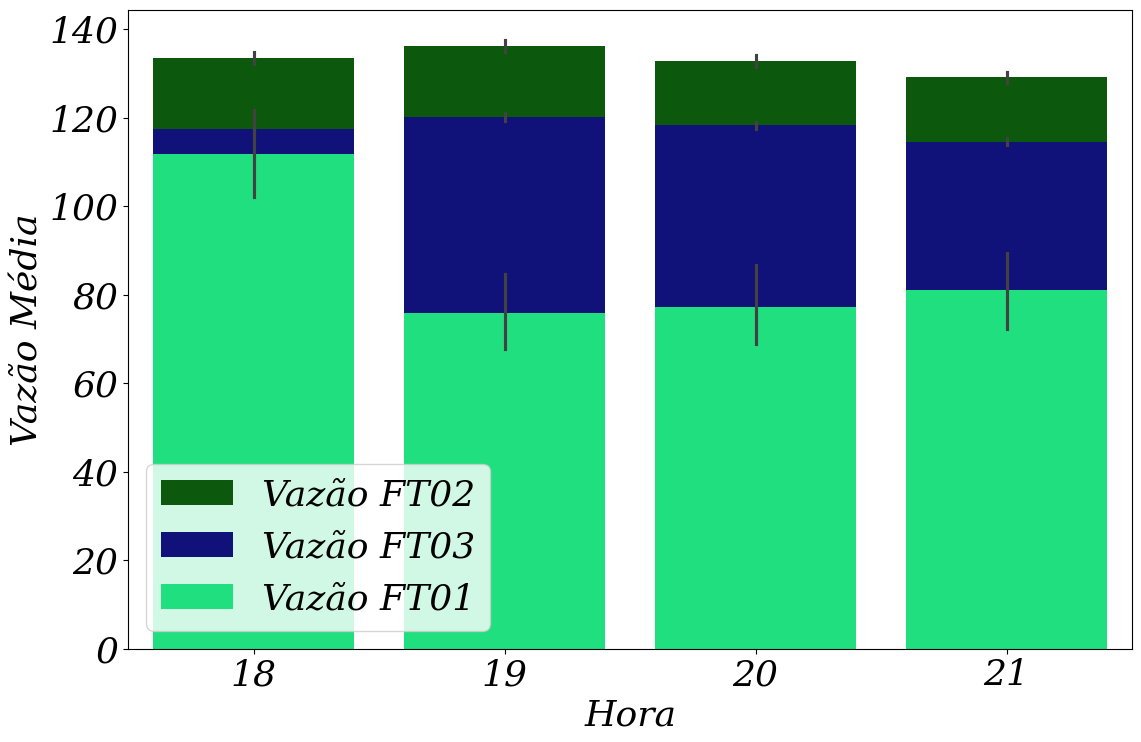

In [9]:

plt.figure(figsize = (12,8))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 26}
plt.rc('font', **font)
# Filtro para os horários de interesse (18h às 21h)
filtro = (df.index.hour >= 18) & (df.index.hour <= 21)
df_horarios_pico = df[filtro]

# Criar um gráfico de barras para mostrar a demanda média em cada hora
sns.barplot(x=df_horarios_pico.index.hour, y=df_horarios_pico['VAZÃO DE GRAVIDADE - FT02'], color='darkgreen', label='Vazão FT02')
sns.barplot(x=df_horarios_pico.index.hour, y=df_horarios_pico['VAZÃO DE RECALQUE - FT03'], color='darkblue', label='Vazão FT03')
sns.barplot(x=df_horarios_pico.index.hour, y=df_horarios_pico['VAZÃO DE ENTRADA - FT01'], color='springgreen', label='Vazão FT01')

#plt.title('Vazão Média nos Horários de Pico')
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.xlabel('Hora')
plt.ylabel('Vazão Média')
plt.legend()
plt.savefig('grafico-barras-demanda.pdf', bbox_inches='tight', dpi=600, format='pdf')
plt.show()



In [10]:

# # Filtro para os horários de interesse (18h às 21h)
# filtro = (df.index.hour >= 18) & (df.index.hour <= 21)
# df_horarios_pico = df[filtro]

# # Configuração inicial do gráfico
# fig, ax = plt.subplots(figsize=(8, 6))
# sns.barplot(x=df_horarios_pico.index.hour, y=df_horarios_pico['VAZÃO DE ENTRADA - FT01'], color='blue', label='Vazão FT01')
# sns.barplot(x=df_horarios_pico.index.hour, y=df_horarios_pico['VAZÃO DE GRAVIDADE - FT02'], color='green', label='Vazão FT02')
# sns.barplot(x=df_horarios_pico.index.hour, y=df_horarios_pico['VAZÃO DE RECALQUE - FT03'], color='black', label='Vazão FT03')

# plt.xlabel('Hora')
# plt.ylabel('Vazão Média')
# plt.legend()

# # Função de atualização para a animação
# def update(frame):
#     ax.clear()
#     sns.barplot(x=df_horarios_pico.index.hour[:frame+1], y=df_horarios_pico['VAZÃO DE ENTRADA - FT01'][:frame+1], color='blue', label='Vazão FT01')
#     sns.barplot(x=df_horarios_pico.index.hour[:frame+1], y=df_horarios_pico['VAZÃO DE GRAVIDADE - FT02'][:frame+1], color='green', label='Vazão FT02')
#     sns.barplot(x=df_horarios_pico.index.hour[:frame+1], y=df_horarios_pico['VAZÃO DE RECALQUE - FT03'][:frame+1], color='black', label='Vazão FT03')
#     plt.xlabel('Hora')
#     plt.ylabel('Vazão Média')
#     plt.legend()

# # Criação da animação
# ani = animation.FuncAnimation(fig, update, frames=len(df_horarios_pico), interval=200)

# # Salvar a animação em um arquivo GIF
# animation_file = 'barra-h-pico-animacao.gif'
# ani.save(animation_file, writer='pillow')

# # Exibir a animação
# plt.show()


In [11]:


# # Filtro para os horários de interesse (18h às 21h)
# filtro = (df.index.hour >= 18) & (df.index.hour <= 21)
# df_horarios_pico = df[filtro]

# # Configuração inicial do gráfico
# fig, ax = plt.subplots(figsize=(8, 6))
# font = {'family': 'serif', 'style': 'oblique', 'size': 12}
# plt.rc('font', **font)
# barplot = sns.barplot(x=df_horarios_pico.index.hour, y=df_horarios_pico['VAZÃO DE ENTRADA - FT01'], color='blue', label='Vazão FT01')
# barplot = sns.barplot(x=df_horarios_pico.index.hour, y=df_horarios_pico['VAZÃO DE GRAVIDADE - FT02'], color='green', label='Vazão FT02')
# barplot = sns.barplot(x=df_horarios_pico.index.hour, y=df_horarios_pico['VAZÃO DE RECALQUE - FT03'], color='black', label='Vazão FT03')

# # Função de atualização para a animação
# def animate(frame):
#     # Atualiza a altura das barras para cada quadro
#     for bar, val in zip(barplot.patches, df_horarios_pico.iloc[frame]):
#         bar.set_height(val)

# # Criação da animação
# ani = animation.FuncAnimation(fig, animate, frames=len(df_horarios_pico), interval=200)

# # Converter a animação em formato HTML
# html = ani.to_jshtml()

# # Exibir a animação no Jupyter Notebook
# HTML(html)


Exemplo de série

In [12]:
# Filtrar os horários de interesse (18h às 21h)
filtro_horarios = (df.index.hour >= 18) & (df.index.hour <= 21)
df_horarios_pico = df[filtro_horarios]

# Encontrar a data e hora do horário de maior demanda para cada variável
horario_maior_demanda_ft01 = df_horarios_pico['VAZÃO DE ENTRADA - FT01'].idxmax()
horario_maior_demanda_ft02 = df_horarios_pico['VAZÃO DE GRAVIDADE - FT02'].idxmax()
horario_maior_demanda_ft03 = df_horarios_pico['VAZÃO DE RECALQUE - FT03'].idxmax()

print("Horário de maior demanda das 18h às 21h - VAZÃO DE ENTRADA- FT01:")
print(horario_maior_demanda_ft01)
print("Horário de maior demanda das 18h às 21h - VAZÃO DE GRAVIDADE - FT02:")
print(horario_maior_demanda_ft02)
print("Horário de maior demanda das 18h às 21h - VAZÃO DE RECALQUE - FT03:")
print(horario_maior_demanda_ft03)


Horário de maior demanda das 18h às 21h - VAZÃO DE ENTRADA- FT01:
2018-02-28 21:00:00
Horário de maior demanda das 18h às 21h - VAZÃO DE GRAVIDADE - FT02:
2018-06-21 20:00:00
Horário de maior demanda das 18h às 21h - VAZÃO DE RECALQUE - FT03:
2018-11-13 20:00:00


In [13]:


# Filtro para os horários de interesse (18h às 21h)
filtro_horarios = (df.index.hour >= 18) & (df.index.hour <= 21)
df_filtrado = df.loc[filtro_horarios]

# Criação do DataFrame para armazenar os resultados
df_maior_demanda = pd.DataFrame(columns=['Variável', 'Horário de Maior Demanda', 'Valor da Demanda'])

# Variável VAZÃO DE ENTRADA - FT01
horario_maior_demanda_ft01 = df_filtrado['VAZÃO DE ENTRADA - FT01'].idxmax()
demanda_maior_horario_ft01 = df_filtrado.loc[horario_maior_demanda_ft01, 'VAZÃO DE ENTRADA - FT01']
df_maior_demanda.loc[0] = ['VAZÃO DE ENTRADA - FT01', horario_maior_demanda_ft01, demanda_maior_horario_ft01]

# Variável VAZÃO DE GRAVIDADE - FT02
horario_maior_demanda_ft02 = df_filtrado['VAZÃO DE GRAVIDADE - FT02'].idxmax()
demanda_maior_horario_ft02 = df_filtrado.loc[horario_maior_demanda_ft02, 'VAZÃO DE GRAVIDADE - FT02']
df_maior_demanda.loc[1] = ['VAZÃO DE GRAVIDADE - FT02', horario_maior_demanda_ft02, demanda_maior_horario_ft02]

# Variável VAZÃO DE RECALQUE - FT03
horario_maior_demanda_ft03 = df_filtrado['VAZÃO DE RECALQUE - FT03'].idxmax()
demanda_maior_horario_ft03 = df_filtrado.loc[horario_maior_demanda_ft03, 'VAZÃO DE RECALQUE - FT03']
df_maior_demanda.loc[2] = ['VAZÃO DE RECALQUE - FT03', horario_maior_demanda_ft03, demanda_maior_horario_ft03]

# Arredondar os valores para duas casas decimais
df_maior_demanda['Valor da Demanda'] = df_maior_demanda['Valor da Demanda'].round(2)

# Exibir o DataFrame com os resultados
print(df_maior_demanda)


                    Variável Horário de Maior Demanda  Valor da Demanda
0    VAZÃO DE ENTRADA - FT01      2018-02-28 21:00:00            370.35
1  VAZÃO DE GRAVIDADE - FT02      2018-06-21 20:00:00            277.94
2   VAZÃO DE RECALQUE - FT03      2018-11-13 20:00:00            167.78


In [14]:
df_maior_demanda.to_excel('maior_demanda.xlsx', index=False)

In [15]:
demanda_horario_pico = df.between_time('18:00:00', '21:00:00')['NIVEL DO RESERVATÓRIO - LT01'].max()
volume_minimo = demanda_horario_pico * 1.2 *1000

print(f"O volume mínimo de água necessário é de {volume_minimo:.2f} litros.")



O volume mínimo de água necessário é de 5264.56 litros.


In [16]:
# Calcular os percentis
pressao_percentil10 = round(df['PRESSÃO DE SUCÇÃO - PT01'].quantile(0.10), 2)
pressao_percentil90 = round(df['PRESSÃO DE SUCÇÃO - PT01'].quantile(0.90), 2)

# Imprimir os resultados
print("Pressão Percentil 10:", pressao_percentil10)
print("Pressão Percentil 90:", pressao_percentil90)


Pressão Percentil 10: 3.46
Pressão Percentil 90: 5.2


In [17]:
# Calcular os percentis
pressao_percentil10 = round(df['PRESSÃO DE RECALQUE - PT02'].quantile(0.10), 2)
pressao_percentil90 = round(df['PRESSÃO DE RECALQUE - PT02'].quantile(0.90), 2)

# Imprimir os resultados
print("Pressão Percentil 10:", pressao_percentil10)
print("Pressão Percentil 90:", pressao_percentil90)

Pressão Percentil 10: 16.02
Pressão Percentil 90: 24.03


# Demanda diaria

In [18]:

# Definir as variáveis
nivel_reservatorio = df['NIVEL DO RESERVATÓRIO - LT01']
vazao_entrada = df['VAZÃO DE ENTRADA - FT01'] / 3600  # Converter para m³/s
vazao_gravidade = df['VAZÃO DE GRAVIDADE - FT02'] / 3600  # Converter para m³/s
vazao_recalque = df['VAZÃO DE RECALQUE - FT03'] / 3600  # Converter para m³/s

# Calcular a variação do nível do reservatório
variacao_nivel_reservatorio = vazao_entrada - vazao_gravidade - vazao_recalque

# Verificar o equilíbrio do nível do reservatório
equilibrio = variacao_nivel_reservatorio.mean() == 0

# Exibir o resultado
if equilibrio:
    print("O sistema está em equilíbrio.")
else:
    print("O sistema não está em equilíbrio.")


O sistema não está em equilíbrio.


In [19]:
vazao_entrada = df_maior_demanda.loc[df_maior_demanda['Variável'] == 'VAZÃO DE ENTRADA - FT01', 'Valor da Demanda'].values[0]
vazao_gravidade = df_maior_demanda.loc[df_maior_demanda['Variável'] == 'VAZÃO DE GRAVIDADE - FT02', 'Valor da Demanda'].values[0]
vazao_recalque = df_maior_demanda.loc[df_maior_demanda['Variável'] == 'VAZÃO DE RECALQUE - FT03', 'Valor da Demanda'].values[0]


In [20]:
demanda_diaria = 904.39


In [21]:
quantidade_agua_necessaria = demanda_diaria - vazao_entrada - vazao_gravidade - vazao_recalque


In [22]:
if quantidade_agua_necessaria == 0:
    print("Existe um equilíbrio entre a demanda diária e as vazões.")
else:
    print("Não existe um equilíbrio entre a demanda diária e as vazões.")


Não existe um equilíbrio entre a demanda diária e as vazões.


In [23]:

# Variáveis de vazão em litros por hora
vazao_entrada = 383.87
vazao_gravidade = 326.17
vazao_recalque = 194.35

# Demanda diária em litros
demanda_diaria = 5000

# Calcular a quantidade de água necessária para atender à demanda diária
quantidade_agua_necessaria = np.round(demanda_diaria - vazao_entrada - vazao_gravidade - vazao_recalque, 2)

# Imprimir o resultado
print(f"A quantidade de água necessária para atender à demanda diária é de {quantidade_agua_necessaria} litros.")


A quantidade de água necessária para atender à demanda diária é de 4095.61 litros.


In [24]:
# Variáveis de vazão em litros por hora
vazao_entrada = df['VAZÃO DE ENTRADA - FT01'].max()
vazao_gravidade = df['VAZÃO DE GRAVIDADE - FT02'].max()
vazao_recalque = df['VAZÃO DE RECALQUE - FT03'].max()

# Cálculo da demanda diária
demanda_diaria = df['VAZÃO DE ENTRADA - FT01'] + df['VAZÃO DE GRAVIDADE - FT02'] + df['VAZÃO DE RECALQUE - FT03']

# Soma total da demanda diária
demanda_total = demanda_diaria.sum()

# Calcular a quantidade de água necessária para atender à demanda diária
quantidade_agua_necessaria = demanda_total - vazao_entrada - vazao_gravidade - vazao_recalque

# Verificar se há equilíbrio entre as vazões e a demanda diária
if quantidade_agua_necessaria == 0:
    print("Existe equilíbrio entre as vazões e a demanda diária.")
elif quantidade_agua_necessaria > 0:
    print("Há um excesso de água, é possível reduzir as vazões para atingir o equilíbrio.")
else:
    print("Há uma deficiência de água, é necessário aumentar as vazões para atingir o equilíbrio.")


Há um excesso de água, é possível reduzir as vazões para atingir o equilíbrio.


In [25]:
# Calcular a soma das vazões por intervalo de tempo (por exemplo, a cada hora)
vazoes_por_intervalo = df[['VAZÃO DE ENTRADA - FT01', 'VAZÃO DE GRAVIDADE - FT02', 'VAZÃO DE RECALQUE - FT03']].sum(axis=1)

# Definir a frequência dos dados (por exemplo, a cada hora)
frequencia = '1H'

# Resample dos dados para a frequência desejada (por exemplo, de hora em hora)
vazoes_resample = vazoes_por_intervalo.resample(frequencia).sum()

# Calcular a demanda diária somando as vazões
demandas_diarias = vazoes_resample.resample('D').sum()

# Imprimir as demandas diárias
print(demandas_diarias)


Timestamp
2018-01-01     8137.145294
2018-01-02     9104.172798
2018-01-03     9453.075214
2018-01-04     9435.461704
2018-01-05    10297.908028
                  ...     
2019-12-27    10984.901049
2019-12-28    11725.117759
2019-12-29    10057.635956
2019-12-30     9762.079523
2019-12-31    10412.977216
Freq: D, Length: 730, dtype: float64


In [26]:
# Filtrar os horários de interesse (18h às 21h)
df_horarios_pico = df[(df.index.hour >= 18) & (df.index.hour <= 21)]

# Identificar os horários de maior demanda
horarios_maior_demanda = df_horarios_pico[df_horarios_pico['VAZÃO DE RECALQUE - FT03'] == df_horarios_pico['VAZÃO DE RECALQUE - FT03'].max()].index

# Exibir os horários de maior demanda
print("Horários de maior demanda das 18h às 21h:")
for horario in horarios_maior_demanda:
    print(horario)


Horários de maior demanda das 18h às 21h:
2018-11-13 20:00:00


In [27]:
# Filtrar os horários de interesse (18h às 21h)
df_horarios_pico = df[(df.index.hour >= 18) & (df.index.hour <= 21)]

# Identificar os horários de maior demanda
horarios_maior_demanda = df_horarios_pico[df_horarios_pico['VAZÃO DE ENTRADA - FT01'] == df_horarios_pico['VAZÃO DE ENTRADA - FT01'].max()].index

# Exibir os horários de maior demanda
print("Horários de maior demanda das 18h às 21h:")
for horario in horarios_maior_demanda:
    print(horario)


Horários de maior demanda das 18h às 21h:
2018-02-28 21:00:00


In [28]:
# Filtrar os horários de interesse (18h às 21h)
df_horarios_pico = df[(df.index.hour >= 18) & (df.index.hour <= 21)]

# Identificar os horários de maior demanda
horarios_maior_demanda = df_horarios_pico[df_horarios_pico['VAZÃO DE GRAVIDADE - FT02'] == df_horarios_pico['VAZÃO DE GRAVIDADE - FT02'].max()].index

# Exibir os horários de maior demanda
print("Horários de maior demanda das 18h às 21h:")
for horario in horarios_maior_demanda:
    print(horario)


Horários de maior demanda das 18h às 21h:
2018-06-21 20:00:00


In [29]:
demanda_media = df['VAZÃO DE RECALQUE - FT03'].mean()
demanda_media_formatada = format(round(demanda_media, 2), ".2f")

print(f"A demanda média é: {demanda_media_formatada}")


A demanda média é: 104.20


In [30]:
demanda_media = df['VAZÃO DE ENTRADA - FT01'].mean()
demanda_media_formatada = format(round(demanda_media, 2), ".2f")

print(f"A demanda média é: {demanda_media_formatada}")



A demanda média é: 215.70


In [31]:
demanda_media = df['VAZÃO DE GRAVIDADE - FT02'].mean()
demanda_media_formatada = format(round(demanda_media, 2), ".2f")

print(f"A demanda média é: {demanda_media_formatada}")



A demanda média é: 114.83


In [32]:
# Resample do DataFrame para frequência diária (24 horas) e calcular a média
# df = df.resample('24h').mean()

# Verificar a forma do DataFrame após o resample
print(df.shape)

(17522, 9)


# Treino, test e validação


In [33]:
# Dividir o DataFrame em treinamento, validação e teste
# Proporção: 70% para treinamento e validação, 30% para teste

# Definir o número de amostras para cada conjunto
trn_samples = int(len(df) * 0.7)
tst_samples = int(len(df) * 0.3)

# Dividir o DataFrame em treinamento, validação e teste
df_trn_val = df.iloc[:trn_samples]
df_tst = df.iloc[trn_samples:]

# Dividir o conjunto de treinamento e validação em treinamento e validação
# Proporção: 80% para treinamento, 20% para validação

# Definir o número de amostras para o conjunto de treinamento e validação
trn_val_samples = int(len(df_trn_val) * 0.8)

# Dividir o DataFrame de treinamento e validação em treinamento e validação
df_trn = df_trn_val.iloc[:trn_val_samples]
df_val = df_trn_val.iloc[trn_val_samples:]

# Verificar o tamanho de cada conjunto
print("Tamanho do conjunto de treinamento:", len(df_trn))
print("Tamanho do conjunto de validação:", len(df_val))
print("Tamanho do conjunto de teste:", len(df_tst))


Tamanho do conjunto de treinamento: 9812
Tamanho do conjunto de validação: 2453
Tamanho do conjunto de teste: 5257


In [34]:
#%% Divide os dados em treinamento, validação e teste
# 70% para treinamento e validação (18.414 amostras) e 30% para teste (7.892 amostras)
# Das 18.414 amostras, 80% para treinamento (14.731 amostras) e 20% para validação (3.683 amostras)

# thresholds
trn_samples = int((len(df)*70/100)*(80/100))
vld_samples = int((len(df)*70/100)*(20/100))
tst_samples = int((len(df)*30/100))

trn = df.iloc[:trn_samples]
vld = df.iloc[trn_samples:trn_samples+vld_samples]
tst = df.iloc[trn_samples+vld_samples:]

#b3, ft02

endog_tst = tst['NIVEL DO RESERVATÓRIO - LT01']
exog_tst = tst[['FREQUENCIA BOMBA 1', 'FREQUENCIA BOMBA 2', 
                 'VAZÃO DE ENTRADA - FT01', 'VAZÃO DE RECALQUE - FT03', 
                 'PRESSÃO DE SUCÇÃO - PT01', 'PRESSÃO DE RECALQUE - PT02']]

# exog_tst = tst[['PRESSÃO DE SUCÇÃO - PT01']]



endog_vld = vld['NIVEL DO RESERVATÓRIO - LT01']
exog_vld = vld[['FREQUENCIA BOMBA 1', 'FREQUENCIA BOMBA 2', 
                 'VAZÃO DE ENTRADA - FT01', 'VAZÃO DE RECALQUE - FT03', 
                 'PRESSÃO DE SUCÇÃO - PT01', 'PRESSÃO DE RECALQUE - PT02']]

# exog_vld = vld[['PRESSÃO DE SUCÇÃO - PT01']]


       
endog_trn = trn['NIVEL DO RESERVATÓRIO - LT01']
exog_trn = trn[['FREQUENCIA BOMBA 1', 'FREQUENCIA BOMBA 2', 
                 'VAZÃO DE ENTRADA - FT01', 'VAZÃO DE RECALQUE - FT03', 
                 'PRESSÃO DE SUCÇÃO - PT01', 'PRESSÃO DE RECALQUE - PT02']]

# exog_trn = trn[['PRESSÃO DE SUCÇÃO - PT01']]



endog = df['NIVEL DO RESERVATÓRIO - LT01']
exog = df[['FREQUENCIA BOMBA 1', 'FREQUENCIA BOMBA 2', 
                 'VAZÃO DE ENTRADA - FT01', 'VAZÃO DE RECALQUE - FT03', 
                 'PRESSÃO DE SUCÇÃO - PT01', 'PRESSÃO DE RECALQUE - PT02']]

# exog = df[['PRESSÃO DE SUCÇÃO - PT01']]


rt = 'LT01 (m³)'

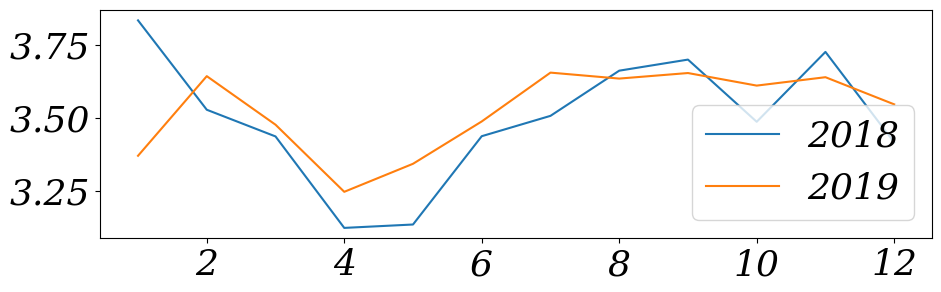

In [35]:

## Agrupando por ano
idx_year = df.index.year
idx_month = df.index.month
plt.figure(figsize = (10,3.5))
plt.plot(endog.groupby(by = [idx_year, idx_month]).mean().unstack(level = 0))
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.title('Agruapdo por Ano')
plt.legend(['2018','2019', '2020'])
# plt.legend(['2020'])
plt.savefig(f"media-agrupada.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

## Diferença com o valor anterior

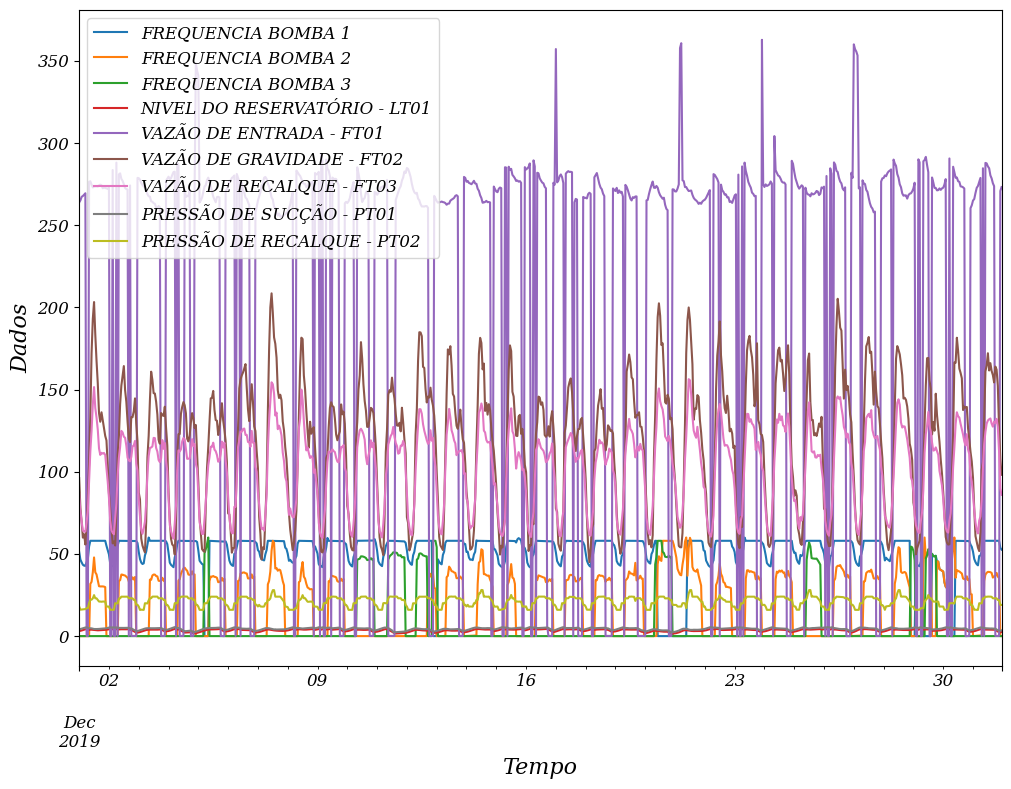

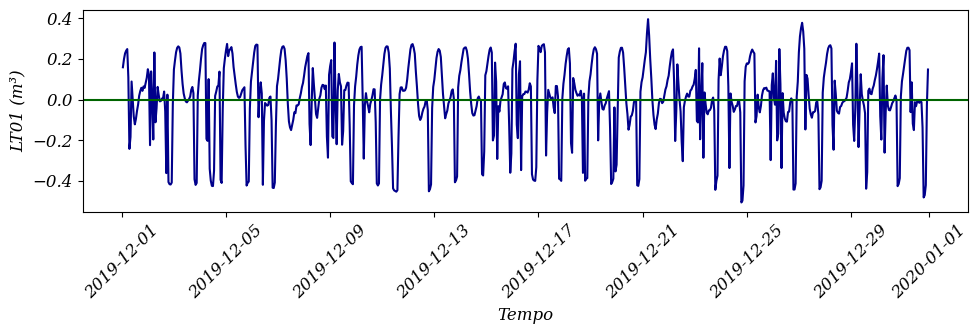

In [36]:
# Filtrar dados para o intervalo de datas desejado (de dezembro de 2019 até o início de 2020)
start_date = '2019-12-01'
end_date = '2020-01-01'
filtered_df = df.loc[start_date:end_date]


font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)

# Configurar a paleta no Seaborn usando as paletas do Matplotlib
# sns.set_palette("GnBu_d")  # Usar 'Blues_d' para azul escuro com 4 tons
# colors = sns.color_palette("GnBu_d")  # Usar 'Blues_d' para azul escuro com 4 tons

# Gráfico de linha para os dados filtrados
filtered_df.plot(figsize=(10, 8))#, color=colors)
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.xlabel('Tempo', fontsize=16)
plt.ylabel("Dados", fontsize=16)
plt.legend(loc=2)
plt.savefig("dados_todo.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()


# Filtrar dados para o intervalo de datas desejado (de dezembro de 2019 até o início de 2020)
filtered_endog = endog.loc[start_date:end_date]

plt.figure(figsize=(10, 3.5))
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.rc('font', **font)
plt.plot(filtered_endog.diff(), 'darkblue')
plt.axhline(y=0, color='darkgreen')
plt.ylabel(rt)
plt.xlabel("Tempo")
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig("ruido-branco.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()


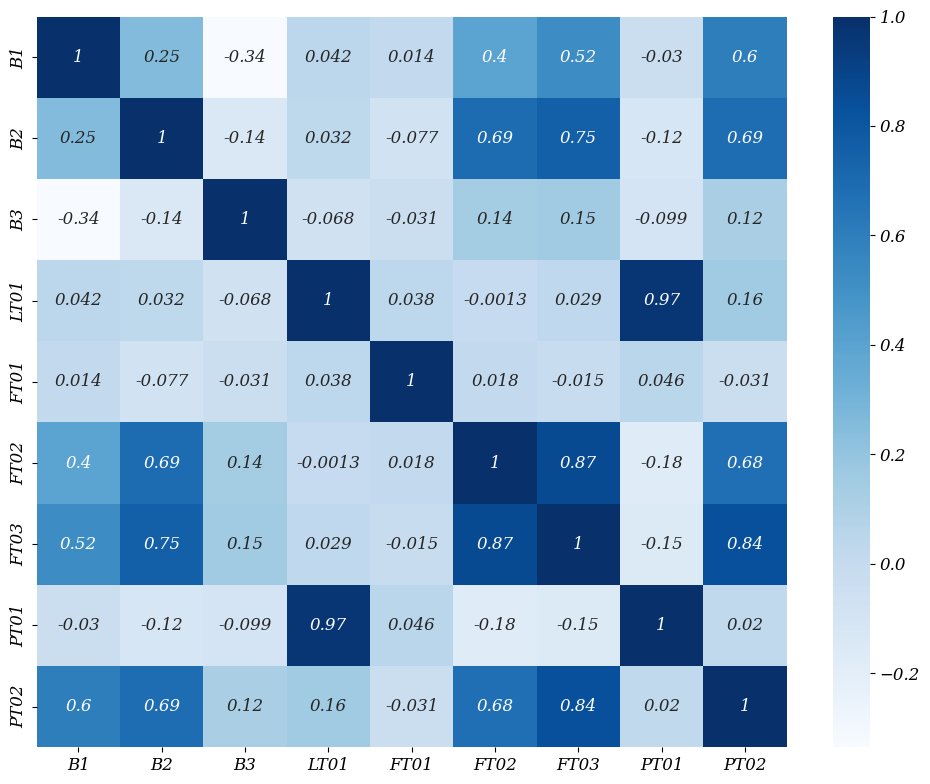

In [37]:
df2 = df.rename(columns={'FREQUENCIA BOMBA 1': 'B1',
                        'FREQUENCIA BOMBA 2': 'B2',
                        'FREQUENCIA BOMBA 3': 'B3',
                        'NIVEL DO RESERVATÓRIO - LT01': 'LT01',
                        'VAZÃO DE ENTRADA - FT01': 'FT01',
                        'VAZÃO DE GRAVIDADE - FT02': 'FT02',
                        'VAZÃO DE RECALQUE - FT03': 'FT03',
                        'PRESSÃO DE SUCÇÃO - PT01': 'PT01',
                        'PRESSÃO DE RECALQUE - PT02': 'PT02'})

plt.figure(figsize = (10,8))
sns.color_palette(as_cmap = True)
sns.heatmap(df2.corr(method = 'pearson'), annot = True, cmap = 'Blues')
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig(f"person.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

In [38]:
df_horarios_pico = df2[(df.index.hour >= 18) & (df.index.hour <= 21)]
df_horarios_pico.describe().to_excel('estatistica.xlsx')

In [39]:

# nomes = ['Yaseen, Z.M.\n (2019, 2020)', 'Papacharalampous, G.\n(2017, 2018, 2020,\n2022)',
#           'Tyralis, H.\n (2017, 2018, 2020,\n2022)', 'Bergmeir, C.\n (2018, 2021)', 'Bronakdari, H.\n(2019, 2020)']
# artigos = [6, 5, 5, 4, 4]

# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 18}
# plt.rc('font', **font)

# fig, ax = plt.subplots(figsize=(15, 5))
# ax.bar(nomes, artigos)
# ax.set_xlabel('Autores e Ano de Publicação')
# ax.set_ylabel('Artigos')
# ax.tick_params(axis='x', rotation=0, labelsize=8)  # Rotação de 0 graus para os rótulos do eixo x
# plt.tight_layout()
# plt.savefig(f"Autores Relação entre artigos publicados.pdf", dpi=600)
# plt.show()


In [40]:

# paises = ['China', 'Estados Unidos', 'India', 'Brasil', 'Espanha', 'Australia', 'Reino Unido', 'Iran', 'Canadá', 'Malaysia']
# artigos = [96, 56, 46, 25, 24, 22, 20, 17, 14, 14]

# fig = go.Figure(data=go.Choropleth(
#     locations=paises,
#     z=artigos,
#     locationmode='country names',
#     colorscale='Blues',
#     colorbar_title='Artigos',
# ))

# fig.update_layout(
#     geo=dict(
#         showframe=False,
#         showcoastlines=False,
#         projection_type='equirectangular'
#     )
# )

# fig.show()


In [41]:

# paises = ['CHN', 'USA', 'IND', 'BRA', 'ESP', 'GBR', 'AUS', 'IRN', 'MYS', 'CAN']
# artigos = [119, 67, 57, 32, 28, 25, 24, 18, 17, 16]

# fig = go.Figure(data=go.Choropleth(
#     locations=paises,
#     z=artigos,
#     locationmode='ISO-3',
#     colorscale='Greys',
#     colorbar_title='Artigos',
# ))

# fig.update_layout(
#     title_text='',
#     geo=dict(
#         showframe=False,
#         showcoastlines=False,
#         projection_type='equirectangular'
#     )
# )

# fig.update_traces(text=artigos, hovertemplate='%{location}<br>Artigos: %{text}')

# fig.update_layout(showlegend=False)

# fig.write_image('mapa mundi artigos.pdf')


# fig.show()


In [42]:


# paises = ['CHN', 'USA', 'IND', 'BRA', 'ESP', 'GBR', 'AUS', 'IRN', 'MYS', 'CAN']
# artigos = [119, 67, 57, 32, 28, 25, 24, 18, 17, 16]

# # Lista para armazenar as imagens geradas
# images = []

# # Criação das visualizações e adição das imagens à lista
# for i, pais in enumerate(paises):
#     fig = go.Figure(data=go.Choropleth(
#         locations=[pais],
#         z=[artigos[i]],
#         locationmode='ISO-3',
#         colorscale='Greys',
#         colorbar_title='Artigos',
#         showscale=False
#     ))
#     fig.update_layout(
#         title_text=f'Contagem de Artigos - {pais}',
#         geo=dict(
#             showframe=False,
#             showcoastlines=False,
#             projection_type='equirectangular'
#         )
#     )
    
#     # Salvar a visualização como imagem PNG
#     image_file = f'mapa_{paises[i]}.png'
#     fig.write_image(image_file)
    
#     # Adicionar a imagem à lista
#     images.append(imageio.imread(image_file))

# # Salvar a lista de imagens como arquivo GIF
# animation_file = 'mapa_animacao.gif'
# imageio.mimsave(animation_file, images, duration=3)

# print(f"Animação salva como '{animation_file}'.")


In [43]:


# categorias = ['Informática', 'Engenharia', 'Ciências Ambientais', 'Matemática', 'Neurociência', 'Medicina',
#               'Ciências sociais', 'Ciências dos Materiais', 'Negócios, Gestão e Contabilidade', 'Outros']
# artigos = [240, 174, 94, 67, 40, 38, 38, 34, 33, 204]

# # Paleta de cores personalizada
# cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# # Configurações do gráfico

# fig, ax = plt.subplots(figsize = (19,8))
# ax.pie(artigos, labels=categorias, autopct='%1.1f%%', startangle=90, counterclock=False, colors=cores, textprops={'fontsize': 26})
# ax.axis('equal')  # Assegura que o gráfico fique circular

# # Título do gráfico

# plt.savefig(f"areas.pdf", dpi=600)
# # Exibe o gráfico
# plt.show()


In [44]:
# # EDA using pandas-profiling
# profile = ProfileReport(df, explorative=True)

# #Saving results to a HTML file
# profile.to_file("output.html")

# # EDA using Autoviz
# sweet_report = sv.analyze(df)

# #Saving results to HTML file
# sweet_report.show_html('sweet_report.html')


In [45]:
# plt.plot(df2.LT01)

In [46]:

# dtale.show(df2)

In [47]:
# s = df2['LT01']
# sd_result = seasonal_decompose(s, model='additive')

In [48]:
s = df['NIVEL DO RESERVATÓRIO - LT01']
cycle, trend = hpfilter(s, lamb=1600)

In [49]:
# sd_result.plot();

# Ruido branco

In [50]:
df.mean()

FREQUENCIA BOMBA 1               52.288944
FREQUENCIA BOMBA 2               18.420901
FREQUENCIA BOMBA 3                3.338009
NIVEL DO RESERVATÓRIO - LT01      3.512739
VAZÃO DE ENTRADA - FT01         215.698533
VAZÃO DE GRAVIDADE - FT02       114.831665
VAZÃO DE RECALQUE - FT03        104.195310
PRESSÃO DE SUCÇÃO - PT01          4.447778
PRESSÃO DE RECALQUE - PT02       20.723772
dtype: float64

In [51]:
df2.mean().to_excel('media.xlsx')


In [52]:
df2.describe().to_excel('estatistica.xlsx')

In [53]:
df.describe()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA - FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02
count,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000
mean,52.288944,18.420901,3.338009,3.512739,215.698533,114.831665,104.195310,4.447778,20.723772
std,11.421441,19.741570,12.623541,0.669986,110.223322,43.604138,25.636096,0.699815,3.610445
min,0.000000,0.000000,0.000000,0.294076,0.000000,0.000000,0.000000,0.841916,0.000000
25%,49.519264,0.000000,0.000000,3.077392,255.453617,74.912092,81.429951,4.015280,18.072155
50%,57.925230,0.050206,0.000000,3.714758,265.357239,122.148888,109.910908,4.601657,21.790873
75%,57.988792,36.796480,0.000000,4.047409,272.608849,145.864563,123.189449,4.989501,23.051279
max,59.988281,59.991943,59.988281,4.445141,390.682861,400.415039,183.899887,5.638785,29.007524



# Métodos preditivos

In [54]:
result = adfuller(df2.LT01.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -12.515003
p-value: 0.000000


<Figure size 1500x800 with 0 Axes>

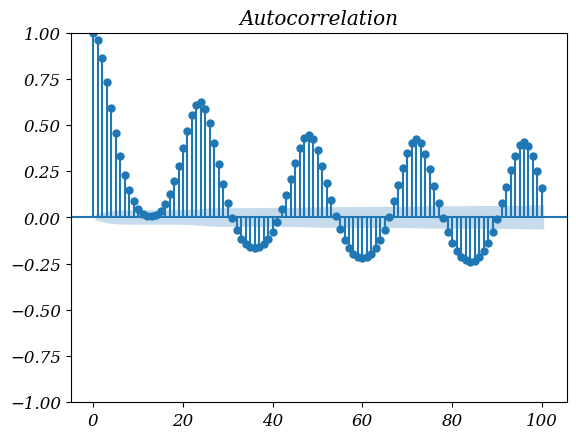

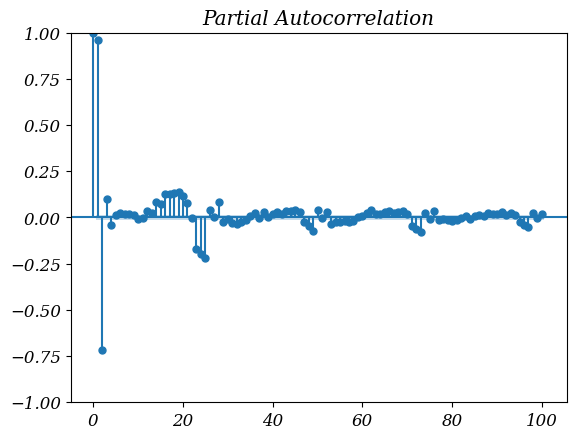

In [55]:

plt.figure(figsize = (15,8))
plot_acf(endog,lags=100)
plot_pacf(endog,lags=100)
plt.show()


## Estacionalidade


In [56]:
def adf_test(series,title=''):
    """
    Passa numa série cronológica e num título opcional, devolve um relatório ADF
    """
    print(f'Teste de Dickey-Fuller Aumentado: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['Estatística de teste ADF', 'p-valor', '# atrasos utilizados', '# observações']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'valor crítico ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Fortes provas contra a hipótese nula")
        print("Rejeitar a hipótese nula")
        print("Os dados não têm raiz unitária e são estacionários")
    else:
        print("Fracas provas contra a hipótese nula")
        print("Não rejeitar a hipótese nula")
        print("Os dados têm uma raiz unitária e não são estacionários")


adf_test(endog)


Teste de Dickey-Fuller Aumentado: 
Estatística de teste ADF   -1.251500e+01
p-valor                     2.623351e-23
# atrasos utilizados        4.400000e+01
# observações               1.747700e+04
valor crítico (1%)         -3.430724e+00
valor crítico (5%)         -2.861705e+00
valor crítico (10%)        -2.566858e+00
Fortes provas contra a hipótese nula
Rejeitar a hipótese nula
Os dados não têm raiz unitária e são estacionários


In [57]:

def adf_test(series, title=''):
    """
    Realiza o teste de Dickey-Fuller Aumentado para verificar a estacionaridade em uma série cronológica.
    
    Parâmetros:
        series (pandas.Series): A série cronológica a ser testada.
        title (str, opcional): Título opcional para o relatório.
    
    Retorna:
        pandas.Series: Resultados do teste ADF com estatísticas e valores críticos.
    """
    # Remover linhas com valores NaN, se houver
    series = series.dropna()
    
    # Realizar o teste ADF
    result = adfuller(series, autolag='AIC')
    
    # Criar um dicionário com informações importantes para o relatório
    report = {
        'Teste ADF': result[0],
        'p-valor': result[1],
        'Atrasos utilizados': result[2],
        'Número de observações': result[3]
    }
    
    # Adicionar informações sobre os valores críticos para diferentes níveis de significância
    for key, val in result[4].items():
        report[f'Valor crítico ({key})'] = val
    
    # Imprimir o relatório ADF
    print(f'Teste de Dickey-Fuller Aumentado: {title}')
    for label, value in report.items():
        print(f'{label}: {value}')
    
    # Verificar a estacionaridade com base no p-valor
    if result[1] <= 0.05:
        print("Fortes provas contra a hipótese nula")
        print("Rejeitar a hipótese nula")
        print("Os dados não têm raiz unitária e são estacionários")
    else:
        print("Fracas provas contra a hipótese nula")
        print("Não rejeitar a hipótese nula")
        print("Os dados têm uma raiz unitária e não são estacionários")
    
    # Retornar o resultado do teste para uso posterior, se necessário
    return pd.Series(report)

# Exemplo de uso:
result = adf_test(endog)


Teste de Dickey-Fuller Aumentado: 
Teste ADF: -12.515003245891648
p-valor: 2.6233511228149793e-23
Atrasos utilizados: 44
Número de observações: 17477
Valor crítico (1%): -3.430724221017473
Valor crítico (5%): -2.861705391222312
Valor crítico (10%): -2.566858033456859
Fortes provas contra a hipótese nula
Rejeitar a hipótese nula
Os dados não têm raiz unitária e são estacionários


# Decomposição STL

<Figure size 1200x800 with 0 Axes>

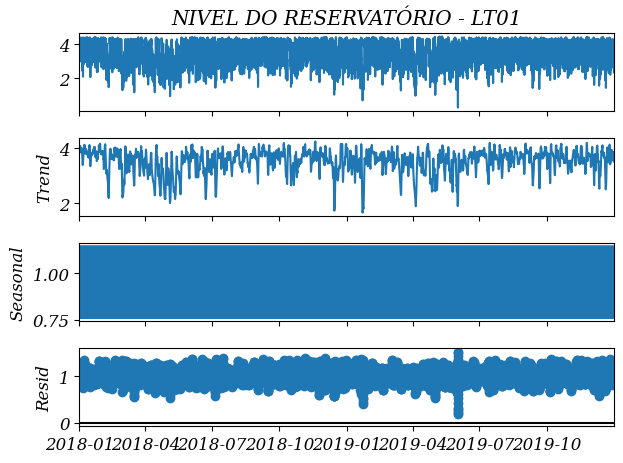

In [58]:

# Suponha que você tenha seu objeto rst criado anteriormente
rst = stl(endog, model='multiplicative', extrapolate_trend='freq', period=24)

# Ajusta o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Plota a série temporal usando rst.plot()
rst.plot()

# Personaliza os rótulos do eixo x para serem rotacionados
# plt.xticks(rotation=45)

# Mostra o gráfico
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.show()


<Figure size 1000x500 with 0 Axes>

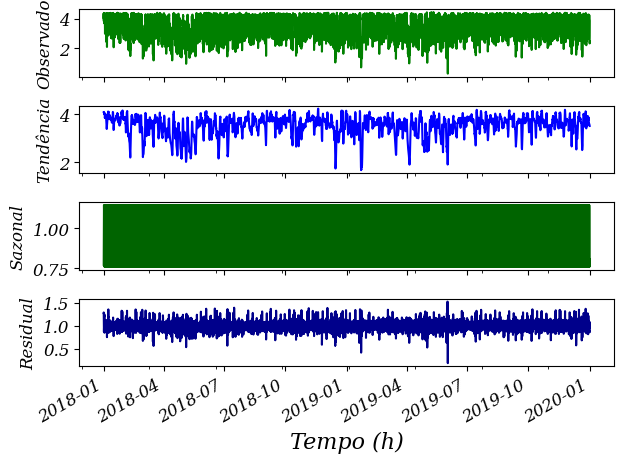

In [59]:
plt.figure(figsize = (10,5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
fig, axes = plt.subplots(4, 1, sharex=True)
rcParams['figure.figsize'] = 12,8 # aumentar o tamanho do grafico
rst.observed.plot(ax=axes[0], legend=False, label = rt, color='green')
axes[0].set_ylabel('Observado')
rst.trend.plot(ax=axes[1], legend=False, label = 'Tendência', color='blue')
axes[1].set_ylabel('Tendência')
rst.seasonal.plot(ax=axes[2], legend=False, label = 'Sazonal', color = 'darkgreen')
axes[2].set_ylabel('Sazonal')
rst.resid.plot(ax=axes[3], legend=False, label = 'Residual', color = 'darkblue')
axes[3].set_ylabel('Residual')
plt.xlabel( 'Tempo (h)', fontsize = 16)
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig("STL.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()


In [60]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(endog)


(0.01, False)

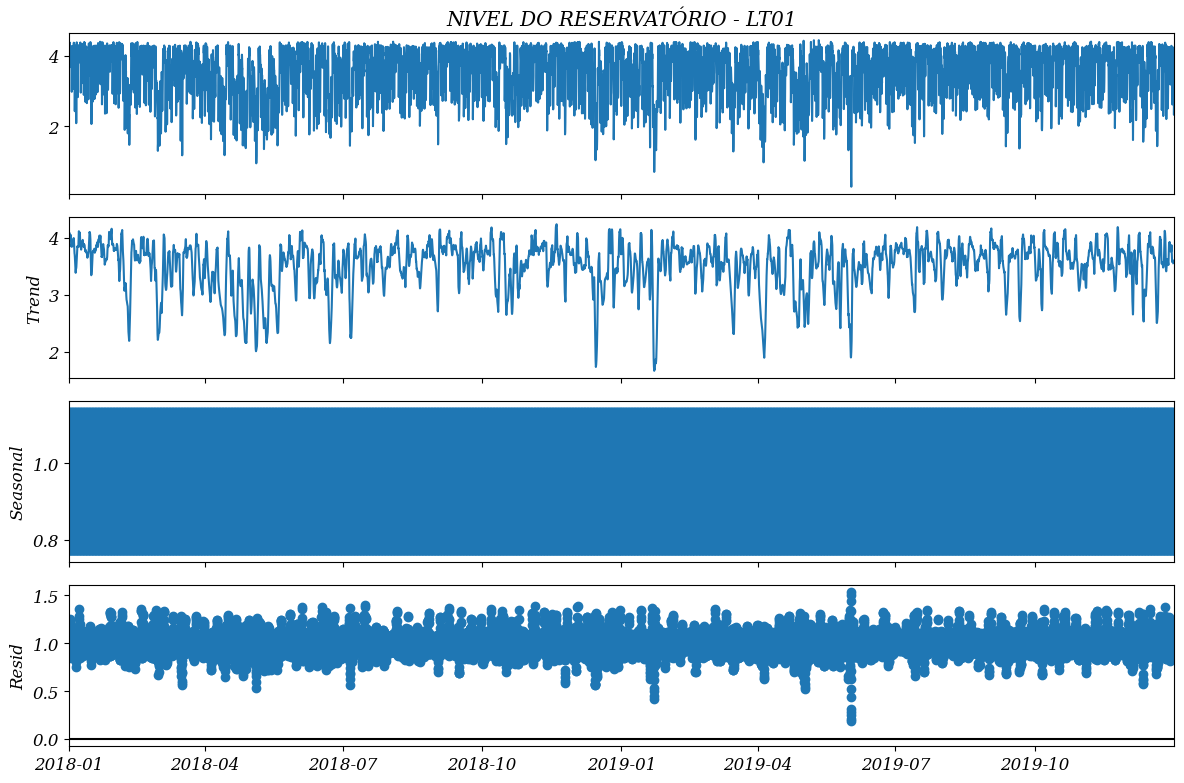

Resultado do Teste Augmented Dickey-Fuller:
Estatística do Teste: -12.515003245891648
P-valor: 2.6233511228149793e-23
Conclusão: Existem evidências contra a presença de raiz unitária. Não há padrão sazonal.


In [61]:
# Seus dados diários, após calcular a média para cada dia
# Substitua endog_vld pelos seus dados médios diários
# endog_vld = ...

# Gráfico de Decomposição
result = stl(endog, model='multiplicative', period=24)  # Se suspeitar de sazonalidade semanal (m=7)
result.plot()
plt.show()

# Teste Augmented Dickey-Fuller
adf_test_result = adfuller(endog)
adf_statistic = adf_test_result[0]
adf_p_value = adf_test_result[1]

print("Resultado do Teste Augmented Dickey-Fuller:")
print(f"Estatística do Teste: {adf_statistic}")
print(f"P-valor: {adf_p_value}")
if adf_p_value <= 0.05:
    print("Conclusão: Existem evidências contra a presença de raiz unitária. Não há padrão sazonal.")
else:
    print("Conclusão: Não há evidências contra a presença de raiz unitária. Pode haver padrão sazonal.")


In [69]:
# Auto ARIMA - Encontrar o melhor modelo ARIMA automaticamente

# Configuração do auto_arima
stepwise_fit = auto_arima(
    endog,  # Série temporal endógena (variável dependente)
    exog,   # Série temporal exógena (variável independente)
    
    # Parâmetros para ordens ARIMA
    start_p=1, d=1, start_q=1,  # Ordem inicial para os componentes AR e MA
    
    # Teste de estacionariedade
    test='adf',  # Método de teste de estacionariedade ('adf' é o teste aumentado de Dickey-Fuller)
    
    # Parâmetros de busca
    max_p=5, max_d=1, max_q=5, m=4,  # Máximas ordens para AR, diferenciação e MA, e a periodicidade sazonal
    start_P=1, D=1, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5,  # Ordem inicial e máximas para componentes sazonais
    
    # Outras configurações
    stationary=True,  # Indica se a série é estacionária (True) ou não (False)
    out_of_sample_size= int(0.1 * len(endog)),  # Número de observações a serem deixadas de fora durante a validação cruzada
    information_criterion='oob',  # Critério de informação para seleção do modelo (AIC, BIC, etc.)
    alpha=0.05,  # Nível de significância para os testes estatísticos
    seasonal_test='ocsb',  # Teste estatístico sazonal ('ocsb' é o teste de sazonalidade de OCSB)
    stepwise=True,  # Indica se o ajuste deve ser feito passo a passo (True) ou não (False)
    method='lbfgs',  # Método de otimização para ajuste do modelo ARIMA
    seasonal=True,  # Indica se o modelo deve incluir componentes sazonais (True) ou não (False)
    trace=True,  # Imprime informações detalhadas durante o ajuste do modelo
    error_action='ignore',  # Ação a ser tomada se ocorrer um erro durante o ajuste do modelo
    suppress_warnings=True,  # Suprime avisos durante o ajuste do modelo
    n_jobs=1,  # Define o número de núcleos para a paralelização (-1 usa todos os núcleos disponíveis)
    random=True, random_state=10,  # Controle da aleatoriedade no ajuste do modelo
    n_fits=10,  # Número máximo de ajustes a serem realizados
    maxiter=50,  # Número máximo de iterações no processo de otimização
    seasonal_test_args='lag_method',  # Argumentos adicionais para o teste estatístico sazonal
    scoring='mae',  # Função de pontuação para avaliar modelos durante a seleção
    with_intercept='auto',  # Indica se o intercepto deve ser incluído automaticamente no modelo
    # return_valid_fits=True,
    
    # # Argumentos adicionais para scoring
    # scoring_args={'discounts': {'overestimation': 0.1, 'underestimation': 0.05}},
    
    # # Configuração do SARIMAX
    # sarimax_kwargs={
    #     'enforce_stationarity': False,
    #     'enforce_invertibility': False,
    #     'simple_differencing': True
    # }, 
    
    # Argumentos adicionais para o ajuste
    fit_args={
        'cov_type': 'opg',  # Exemplo de argumento específico para a função fit
        'maxiter': 50       # Outro exemplo de argumento específico para a função fit
    }, 
    
    trend='ct'  # Configuração da tendência do modelo
)

# Exibir um resumo do melhor modelo ARIMA Encontrado
stepwise_fit.summary()


Performing stepwise search to minimize oob


 ARIMA(1,0,1)(1,0,1)[4] intercept   : OOB=0.127, Time=49.20 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : OOB=0.118, Time=25.62 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : OOB=0.129, Time=37.69 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : OOB=0.175, Time=325.20 sec
 ARIMA(0,0,0)(0,0,0)[4]             : OOB=0.118, Time=24.71 sec
 ARIMA(0,0,0)(1,0,0)[4] intercept   : OOB=0.130, Time=32.79 sec
 ARIMA(0,0,0)(0,0,1)[4] intercept   : OOB=0.118, Time=35.93 sec
 ARIMA(0,0,0)(1,0,1)[4] intercept   : OOB=0.128, Time=39.40 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : OOB=0.117, Time=27.77 sec
 ARIMA(1,0,0)(0,0,1)[4] intercept   : OOB=0.117, Time=60.77 sec
 ARIMA(1,0,0)(1,0,1)[4] intercept   : OOB=0.128, Time=42.65 sec
 ARIMA(2,0,0)(0,0,0)[4] intercept   : OOB=0.117, Time=31.17 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : OOB=0.117, Time=53.71 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : OOB=0.173, Time=328.88 sec
 ARIMA(2,0,1)(0,0,0)[4] intercept   : OOB=0.117, Time=57.93 sec
 ARIMA(2,0,1)(1,0,0)[4] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                17522
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -9898.629
Date:                Mon, 01 Jan 2024   AIC                          19821.259
Time:                        01:18:30   BIC                          19914.513
Sample:                             0   HQIC                         19851.965
                              - 17522                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.001      0.353      0.724      -0.002       0.003
drift        -1.7e-06   6.51e-08    -26.096      0.000   -1.83e-06   -1.57e-06
x1            -0.0016    2.9e-05    -56.594      0.000      -0.002      -0.002
x2             0.0044    2.3e-05    191.410      0.000       0.004       0.004
x3            -0.0002   2.86e-06    -71.337      0.000      -0.000      -0.000
x4             0.0036   2.06e-05    175.508      0.000       0.004       0.004
x5             0.8518      0.000   2478.560      0.000       0.851       0.852
x6            -0.0287      0.000   -241.688      0.000      -0.029      -0.028
ar.L1       7.304e-11      0.000   1.57e-07      1.000      -0.001       0.001
ar.L2        6.32e-11      0.001   8.76e-08      1.000      -0.001       0.001
ma.L1       7.298e-11      0.000   1.57e-07      1.000      -0.001       0.001
sigma2         0.0065   1.04e-05    629.329      0.000       0.007       0.007
===================================================================================
Ljung-Box (L1) (Q):               13551.62   Jarque-Bera (JB):           1168373.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             1.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.39e+16. Standard errors may be unstable.
"""

In [63]:
sdf 

NameError: name 'sdf' is not defined

## Modelo atualizado

In [ ]:
# Extrair os valores dos parâmetros do melhor modelo
best_model_params = {
    'p': stepwise_fit.order[0],
    'd': stepwise_fit.order[1],
    'q': stepwise_fit.order[2],
    'P': stepwise_fit.seasonal_order[0],
    'D': stepwise_fit.seasonal_order[1],
    'Q': stepwise_fit.seasonal_order[2]
}

# Verificar se 'M' tem um ou dois dígitos e calcular o valor adequado
seasonal_order = stepwise_fit.seasonal_order
M_value = 1  # Valor padrão de M caso não haja sazonalidade
if len(seasonal_order) >= 4:
    M_value = seasonal_order[3] * 10 + seasonal_order[4] if len(seasonal_order) >= 5 and len(str(seasonal_order[3])) == 2 else seasonal_order[3]

# Adicionar 'M' ao dicionário de parâmetros do melhor modelo
best_model_params['M'] = M_value

# Criar um DataFrame com os valores dos parâmetros do melhor modelo
best_df = pd.DataFrame(best_model_params, index=['Melhor Modelo'])

# Salvar o DataFrame em um arquivo Excel
best_df.to_excel('best.xlsx')

# Exibir o DataFrame com os valores dos parâmetros do melhor modelo
print(best_df)


In [ ]:
# Ler o arquivo best.xlsx usando pandas
best = pd.read_excel("best.xlsx")

# Atribuir valores a variáveis
p1 = int(best['p'])
d1 = int(best['d'])
q1 = int(best['q'])
P1 = int(best['P'])
D1 = int(best['D'])
Q1 = int(best['Q'])
M1 = int(best['M'])

# Exibir os valores das variáveis
print("p1:", p1)
print("d1:", d1)
print("q1:", q1)
print("P1:", P1)
print("D1:", D1)
print("Q1:", Q1)
print("M1:", M1)


In [ ]:
# import numpy as np
# import pandas as pd
# import statsmodels.api as sm
# import optuna

# # Função para criar o modelo ARIMA
# def create_arima_model(order, seasonal_order, train_data):
#     model = sm.tsa.statespace.SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
#     return model

# # Função de objetivo para otimizar usando o Optuna
# def objective(trial, endog_trn, exog_trn, endog_vld, exog_vld, endog_tst, exog_tst):
#     # Defina os espaços de busca para os hiperparâmetros do modelo ARIMA
#     p = trial.suggest_int('p', 0, 10)  # Ordem do termo AR
#     d = trial.suggest_int('d', 0, 2)  # Ordem do termo de diferenciação
#     q = trial.suggest_int('q', 0, 10)  # Ordem do termo MA
#     P = trial.suggest_int('P', 0, 2)  # Ordem do termo AR sazonal
#     D = trial.suggest_int('D', 0, 2)  # Ordem do termo de diferenciação sazonal
#     Q = trial.suggest_int('Q', 0, 2)  # Ordem do termo MA sazonal
#     s = trial.suggest_int('s', 12, 24)  # Período sazonal

#     # Certifique-se de que os lags MA sazonais e não sazonais sejam mutuamente exclusivos
#     if Q > 0:
#         q = 0
#     if q > 0:
#         Q = 0

#     # Crie o modelo ARIMA com os hiperparâmetros sugeridos pelo Optuna
#     order = (p, d, q)
#     seasonal_order = (P, D, Q, s)
#     model = create_arima_model(order, seasonal_order, endog_trn)  # Passe 'endog_trn' como argumento

#     # Treine o modelo e faça previsões fora da amostra
#     results = model.fit()
#     forecast = results.get_forecast(steps=len(endog_tst))
#     predictions = forecast.predicted_mean

#     # Calcule o erro do modelo (por exemplo, RMSE)
#     error = np.sqrt(np.mean((endog_tst - predictions) ** 2))

#     return error


# # Dados de exemplo (substitua por seus próprios dados)
# # Vamos supor que 'endog_trn', 'exog_trn', 'endog_vld', 'exog_vld', 'endog_tst', 'exog_tst' são seus dados

# # Crie um estudo Optuna e otimize a função objetivo
# study = optuna.create_study(direction='minimize')
# study.optimize(lambda trial: objective(trial, endog_trn, exog_trn, endog_vld, exog_vld, endog_tst, exog_tst), n_trials=100)

# # Imprima os melhores hiperparâmetros encontrados
# best_params = study.best_params
# print("Melhores hiperparâmetros encontrados:", best_params)


In [ ]:
# p1 = 7
# d1 = 1
# q1 = 7
# P1 = 2
# D1 = 1
# Q1 = 1
# M1 = 12

# Modelos de previsão


### sMAPE

In [ ]:

# def smape(y_true, y_pred):
#     """
#     Calculates the Symmetric Mean Absolute Percentage Error (SMAPE) between y_true and y_pred.
#     """
#     y_true = np.array(y_true)
#     y_pred = np.array(y_pred)
#     numerator = np.abs(y_true - y_pred)
#     denominator = np.abs(y_true) + np.abs(y_pred)
#     return np.mean(numerator / denominator) * 100

# y_true = [1, 2, 3, 4, 5]
# y_pred = [1.2, 2.3, 3.4, 4.5, 5.6]
# print(smape(y_true, y_pred))


### RRMSE

In [ ]:

def rrmse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    rrmse = rmse / np.mean(y_true)
    return rrmse

y_true = [1, 2, 3, 4, 5]
y_pred = [1.5, 2.5, 3.5, 4.5, 5.5]
print(rrmse(y_true, y_pred))


## Numeros de dias


In [ ]:
# pv_values = [1, 7, 14, 30]
# pvl_values = ['dia', 'dias', 'dias', 'dias']

# for pv, pvl in zip(pv_values, pvl_values):
#     print(pv, str(pv)+' '+pvl+' à frente')


In [ ]:
pv = 1
pv_7 = 6
pv_14 = 12
pv_30 = 24
pvl = str(1)+' hora à frente'
pvl_7 = str(6)+' horas à frente'
pvl_14 = str(12)+' horas à frente'
pvl_30 = str(24)+' horas à frente'

print(pv, pvl)
print(pv_7, pvl_7)
print(pv_14, pvl_14)
print(pv_30, pvl_30)

## Auto-Regressivo Exogedo (ARX)

In [ ]:
model_trn = ARIMA(endog_trn, exog_trn, order = (p1,0,0))
res_trn = model_trn.fit()

model_tst = ARIMA(endog_tst, exog_tst, order = (p1,0,0))
res_tst = model_tst.fit()

model_vld = ARIMA(endog_vld, exog_vld, order = (p1,0,0))
res_vld = model_vld.fit()

model = ARIMA(endog, exog, order = (p1,0,0))
res = model.fit()

### Previsão

arx_trn = res_trn.predict(start = -len(trn), end = len(trn)+0, exog = exog_trn[len(trn)-0-1:])
arx_vld = res_vld.predict(start = -len(vld), end = len(vld)+0, exog = exog_vld[len(vld)-0-1:])
arx_tst = res_tst.predict(start = -len(tst), end = len(tst)+0, exog = exog_tst[len(tst)-0-1:])
arx = res.predict(start = -len(df), end = len(df)+0, exog = exog[len(df)-0-1:])

### Erros AR

smape_ARX_trn = smape(endog_trn, arx_trn[0+1:])
smape_ARX_vld = smape(endog_vld, arx_vld[0+1:])
smape_ARX_tst = smape(endog_tst, arx_tst[0+1:])
ARX_smape = smape(endog, arx[0+1:])

mae_ARX_trn = mean_absolute_error(endog_trn, arx_trn[0+1:])
mae_ARX_vld = mean_absolute_error(endog_vld, arx_vld[0+1:])
mae_ARX_tst = mean_absolute_error(endog_tst, arx_tst[0+1:])
ARX_mae = mean_absolute_error(endog, arx[0+1:])

rrmse_ARX_trn = rrmse(endog_trn, arx_trn[0+1:])
rrmse_ARX_vld = rrmse(endog_vld, arx_vld[0+1:])
rrmse_ARX_tst = rrmse(endog_tst, arx_tst[0+1:])
ARX_rrmse = rrmse(endog, arx[0+1:])


print(f"ARX ({p1}) sMAPE Error: {smape_ARX_trn:2.3f} Train")
print(f"ARX ({p1}) sMAPE Error: {smape_ARX_vld:2.3f} Validation")
print(f"ARX ({p1}) sMAPE Error: {smape_ARX_tst:2.3f} Test")
print(f"ARX ({p1}) sMAPE Error: {ARX_smape:2.3f} ")

print(f"ARX ({p1}) MAE Error: {mae_ARX_trn:2.3f} Train")
print(f"ARX ({p1}) MAE Error: {mae_ARX_vld:2.3f} Validation")
print(f"ARX ({p1}) MAE Error: {mae_ARX_tst:2.3f} Test")
print(f"ARX ({p1}) MAE Error: {ARX_mae:2.3f} ")

print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_trn:2.3f} Train")
print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_vld:2.3f} Validation")
print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_tst:2.3f} Test")
print(f"ARX ({p1}) RRMSE Error: {ARX_rrmse:2.3f} ")


In [ ]:

# # Plotagem das previsões
# plt.figure(figsize=(10, 3.5))
# font = {'family': 'serif',
#         'style': 'oblique',
#         'size': 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arx_tst, 'darkblue')
# plt.ylabel(rt, fontsize=16)
# plt.xlabel('Tempo', fontsize=16)
# plt.legend(['Observado', f'ARX'], fontsize=16)

# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições

# # Salva o gráfico em formato PDF de alta qualidade e otimizado
# plt.savefig('ARX.pdf', dpi=600, bbox_inches='tight', format='pdf')
# plt.show()


### 1 hora à frente

In [ ]:

### Previsão

arx_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv, exog = exog_trn[len(trn)-pv-1:])
arx_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv, exog = exog_vld[len(vld)-pv-1:])
arx_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv, exog = exog_tst[len(tst)-pv-1:])
arx = res.predict(start = -len(df), end = len(df)+pv, exog = exog[len(df)-pv-1:])

### Erros AR

smape_ARX_trn = smape(endog_trn, arx_trn[pv+1:])
smape_ARX_vld = smape(endog_vld, arx_vld[pv+1:])
smape_ARX_tst = smape(endog_tst, arx_tst[pv+1:])
ARX_smape = smape(endog, arx[pv+1:])

mae_ARX_trn = mean_absolute_error(endog_trn, arx_trn[pv+1:])
mae_ARX_vld = mean_absolute_error(endog_vld, arx_vld[pv+1:])
mae_ARX_tst = mean_absolute_error(endog_tst, arx_tst[pv+1:])
ARX_mae = mean_absolute_error(endog, arx[pv+1:])

rrmse_ARX_trn = rrmse(endog_trn, arx_trn[pv+1:])
rrmse_ARX_vld = rrmse(endog_vld, arx_vld[pv+1:])
rrmse_ARX_tst = rrmse(endog_tst, arx_tst[pv+1:])
ARX_rrmse = rrmse(endog, arx[pv+1:])


print(f"ARX ({p1}) sMAPE Error: {smape_ARX_trn:2.3f} Train")
print(f"ARX ({p1}) sMAPE Error: {smape_ARX_vld:2.3f} Validation")
print(f"ARX ({p1}) sMAPE Error: {smape_ARX_tst:2.3f} Test")
print(f"ARX ({p1}) sMAPE Error: {ARX_smape:2.3f} ")

print(f"ARX ({p1}) MAE Error: {mae_ARX_trn:2.3f} Train")
print(f"ARX ({p1}) MAE Error: {mae_ARX_vld:2.3f} Validation")
print(f"ARX ({p1}) MAE Error: {mae_ARX_tst:2.3f} Test")
print(f"ARX ({p1}) MAE Error: {ARX_mae:2.3f} ")

print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_trn:2.3f} Train")
print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_vld:2.3f} Validation")
print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_tst:2.3f} Test")
print(f"ARX ({p1}) RRMSE Error: {ARX_rrmse:2.3f} ")


In [ ]:

# ### Plotagem das previsão

# # Um dia à frente

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arx_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel( 'Tempo', fontsize = 16)
# plt.legend(['Observado', f"ARX"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f'{pv}-ARX.pdf', bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 6 horas à frente

In [ ]:

### Previsão

arx_7_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_7, exog = exog_trn[len(trn)-pv_7-1:])
arx_7_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_7, exog = exog_vld[len(vld)-pv_7-1:])
arx_7_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_7, exog = exog_tst[len(tst)-pv_7-1:])
arx_7 = res.predict(start = -len(df), end = len(df)+pv_7, exog = exog[len(df)-pv_7-1:])

### Erros AR

smape_ARX_7_trn = smape(endog_trn, arx_7_trn[pv_7+1:])
smape_ARX_7_vld = smape(endog_vld, arx_7_vld[pv_7+1:])
smape_ARX_7_tst = smape(endog_tst, arx_7_tst[pv_7+1:])
ARX_7_smape = smape(endog, arx_7[pv_7+1:])

mae_ARX_7_trn = mean_absolute_error(endog_trn, arx_7_trn[pv_7+1:])
mae_ARX_7_vld = mean_absolute_error(endog_vld, arx_7_vld[pv_7+1:])
mae_ARX_7_tst = mean_absolute_error(endog_tst, arx_7_tst[pv_7+1:])
ARX_7_mae = mean_absolute_error(endog, arx_7[pv_7+1:])

rrmse_ARX_7_trn = rrmse(endog_trn, arx_7_trn[pv_7+1:])
rrmse_ARX_7_vld = rrmse(endog_vld, arx_7_vld[pv_7+1:])
rrmse_ARX_7_tst = rrmse(endog_tst, arx_7_tst[pv_7+1:])
ARX_7_rrmse = rrmse(endog, arx_7[pv_7+1:])


print(f"ARX ({p1}) sMAPE Error: {smape_ARX_7_trn:2.3f} Train")
print(f"ARX ({p1}) sMAPE Error: {smape_ARX_7_vld:2.3f} Validation")
print(f"ARX ({p1}) sMAPE Error: {smape_ARX_7_tst:2.3f} Test")
print(f"ARX ({p1}) sMAPE Error: {ARX_7_smape:2.3f} ")

print(f"ARX ({p1}) MAE Error: {mae_ARX_7_trn:2.3f} Train")
print(f"ARX ({p1}) MAE Error: {mae_ARX_7_vld:2.3f} Validation")
print(f"ARX ({p1}) MAE Error: {mae_ARX_7_tst:2.3f} Test")
print(f"ARX ({p1}) MAE Error: {ARX_7_mae:2.3f} ")

print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_7_trn:2.3f} Train")
print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_7_vld:2.3f} Validation")
print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_7_tst:2.3f} Test")
print(f"ARX ({p1}) RRMSE Error: {ARX_7_rrmse:2.3f} ")


In [ ]:

# ### Plotagem das previsão

# # 7 dia à frente

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arx_7_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel( 'Tempo', fontsize = 16)
# plt.legend(['Observado', f"ARX"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f'7-ARX_7.pdf', bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 12 horas à frente

In [ ]:
### Previsão

arx_14_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_14, exog = exog_trn[len(trn)-pv_14-1:])
arx_14_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_14, exog = exog_vld[len(vld)-pv_14-1:])
arx_14_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_14, exog = exog_tst[len(tst)-pv_14-1:])
arx_14 = res.predict(start = -len(df), end = len(df)+pv_14, exog = exog[len(df)-pv_14-1:])

### Erros AR

smape_ARX_14_trn = smape(endog_trn, arx_14_trn[pv_14+1:])
smape_ARX_14_vld = smape(endog_vld, arx_14_vld[pv_14+1:])
smape_ARX_14_tst = smape(endog_tst, arx_14_tst[pv_14+1:])
ARX_14_smape = smape(endog, arx_14[pv_14+1:])

mae_ARX_14_trn = mean_absolute_error(endog_trn, arx_14_trn[pv_14+1:])
mae_ARX_14_vld = mean_absolute_error(endog_vld, arx_14_vld[pv_14+1:])
mae_ARX_14_tst = mean_absolute_error(endog_tst, arx_14_tst[pv_14+1:])
ARX_14_mae = mean_absolute_error(endog, arx_14[pv_14+1:])

rrmse_ARX_14_trn = rrmse(endog_trn, arx_14_trn[pv_14+1:])
rrmse_ARX_14_vld = rrmse(endog_vld, arx_14_vld[pv_14+1:])
rrmse_ARX_14_tst = rrmse(endog_tst, arx_14_tst[pv_14+1:])
ARX_14_rrmse = rrmse(endog, arx_14[pv_14+1:])


print(f"ARX ({p1}) sMAPE Error: {smape_ARX_14_trn:2.3f} Train")
print(f"ARX ({p1}) sMAPE Error: {smape_ARX_14_vld:2.3f} Validation")
print(f"ARX ({p1}) sMAPE Error: {smape_ARX_14_tst:2.3f} Test")
print(f"ARX ({p1}) sMAPE Error: {ARX_14_smape:2.3f} ")

print(f"ARX ({p1}) MAE Error: {mae_ARX_14_trn:2.3f} Train")
print(f"ARX ({p1}) MAE Error: {mae_ARX_14_vld:2.3f} Validation")
print(f"ARX ({p1}) MAE Error: {mae_ARX_14_tst:2.3f} Test")
print(f"ARX ({p1}) MAE Error: {ARX_14_mae:2.3f} ")

print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_14_trn:2.3f} Train")
print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_14_vld:2.3f} Validation")
print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_14_tst:2.3f} Test")
print(f"ARX ({p1}) RRMSE Error: {ARX_14_rrmse:2.3f} ")


In [ ]:

# ### Plotagem das previsão

# # 14 dia à frente

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arx_14_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel( 'Tempo', fontsize = 16)
# plt.legend(['Observado', f"ARX"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f'14-ARX_14.pdf', bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 24 horas à frente

In [ ]:

### Previsão

arx_30_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_30, exog = exog_trn[len(trn)-pv_30-1:])
arx_30_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_30, exog = exog_vld[len(vld)-pv_30-1:])
arx_30_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_30, exog = exog_tst[len(tst)-pv_30-1:])
arx_30 = res.predict(start = -len(df), end = len(df)+pv_30, exog = exog[len(df)-pv_30-1:])

### Erros AR

smape_ARX_30_trn = smape(endog_trn, arx_30_trn[pv_30+1:])
smape_ARX_30_vld = smape(endog_vld, arx_30_vld[pv_30+1:])
smape_ARX_30_tst = smape(endog_tst, arx_30_tst[pv_30+1:])
ARX_30_smape = smape(endog, arx_30[pv_30+1:])

mae_ARX_30_trn = mean_absolute_error(endog_trn, arx_30_trn[pv_30+1:])
mae_ARX_30_vld = mean_absolute_error(endog_vld, arx_30_vld[pv_30+1:])
mae_ARX_30_tst = mean_absolute_error(endog_tst, arx_30_tst[pv_30+1:])
ARX_30_mae = mean_absolute_error(endog, arx_30[pv_30+1:])

rrmse_ARX_30_trn = rrmse(endog_trn, arx_30_trn[pv_30+1:])
rrmse_ARX_30_vld = rrmse(endog_vld, arx_30_vld[pv_30+1:])
rrmse_ARX_30_tst = rrmse(endog_tst, arx_30_tst[pv_30+1:])
ARX_30_rrmse = rrmse(endog, arx_30[pv_30+1:])


print(f"ARX ({p1}) sMAPE Error: {smape_ARX_30_trn:2.3f} Train")
print(f"ARX ({p1}) sMAPE Error: {smape_ARX_30_vld:2.3f} Validation")
print(f"ARX ({p1}) sMAPE Error: {smape_ARX_30_tst:2.3f} Test")
print(f"ARX ({p1}) sMAPE Error: {ARX_30_smape:2.3f} ")

print(f"ARX ({p1}) MAE Error: {mae_ARX_30_trn:2.3f} Train")
print(f"ARX ({p1}) MAE Error: {mae_ARX_30_vld:2.3f} Validation")
print(f"ARX ({p1}) MAE Error: {mae_ARX_30_tst:2.3f} Test")
print(f"ARX ({p1}) MAE Error: {ARX_30_mae:2.3f} ")

print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_30_trn:2.3f} Train")
print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_30_vld:2.3f} Validation")
print(f"ARX ({p1}) RRMSE Error: {rrmse_ARX_30_tst:2.3f} Test")
print(f"ARX ({p1}) RRMSE Error: {ARX_30_rrmse:2.3f} ")


In [ ]:

# ### Plotagem das previsão

# # 30 dia à frente

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arx_30_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel( 'Tempo', fontsize = 16)
# plt.legend(['Observado', f"ARX"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f'30-ARX_30.pdf', bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


In [ ]:
# # Código anterior...


# # Detecção de anomalias nos resíduos
# residuals = res_tst.resid
# mean_residuals = np.mean(residuals)
# std_residuals = np.std(residuals)
# threshold = 3 * std_residuals  # Definindo um limite de 3 desvios padrões

# anomalies = np.where(np.abs(residuals) > threshold)[0]

# print("Índices das anomalias encontradas:", anomalies)

# # Plot dos dados observados
# plt.figure(figsize=(10, 3.5))
# plt.plot(list(endog_tst), 'lime')
# plt.plot(list(arx_tst), 'darkblue')
# plt.ylabel(rt)
# plt.xlabel( 'Índice de Tempo')
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observado', f"ARX"])

# # Destacar anomalias
# anomaly_indices = anomalies
# anomaly_values = endog[anomaly_indices]


# # Adicionar linhas verticais para cada valor de anomalia
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim(4000, 5250)

# # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# for anomaly_idx in anomaly_indices:
#     plt.axvline(x=anomaly_idx, color='green', linestyle='--')
# plt.savefig(f"{pv}-anomalia-SARIMAX.pdf", bbox_inches='tight', dpi=600, format='pdf')

# plt.legend()
# plt.show()

## Animação ARX

In [ ]:
# # Configuração inicial do gráfico
# fig, ax = plt.subplots(figsize=(10, 3.5))
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Auto-Regressivo Exogedo', fontsize=16)
# plt.legend(['Observado', f"ARX ({p1})"])

# # Função de atualização para a animação
# def update(frame):
#     plt.cla()
#     plt.plot(list(endog_tst), 'lime')
#     plt.plot(list(arx_tst), 'darkblue')
#     plt.ylabel(rt)
#     plt.xlabel('Índice de Tempo', fontsize=16)
#     # Ajusta os limites do eixo x para mostrar apenas a parte prevista
#     plt.xlim(4000, 5250)
#     # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
#     plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
#     plt.legend(['Observado', f"ARX"])
    
#     # Destacar anomalias até o quadro atual
#     anomaly_indices = anomalies[:frame+1]
#     anomaly_values = endog[anomaly_indices]
    
#     for anomaly_idx in anomaly_indices:
#         plt.axvline(x=anomaly_idx, color='green', linestyle='--')
    
    
    

# # Criação da animação
# ani = animation.FuncAnimation(fig, update, frames=len(anomalies), interval=200)

# # Salvar a animação em um arquivo GIF
# animation_file = 'animacao_anomalias.gif'
# ani.save(animation_file, dpi=600, writer='pillow')

# # Exibir a animação
# plt.show()


## Lag Ljung Box

In [ ]:
lag = [10]
lag

In [ ]:

lj_arx_df = sm.stats.acorr_ljungbox(res.resid, lags=lag, return_df=True)
lj_arx_trn = sm.stats.acorr_ljungbox(res_trn.resid, lags=lag, return_df=True)
lj_arx_tst = sm.stats.acorr_ljungbox(res_tst.resid, lags=lag, return_df=True)
lj_arx_vld = sm.stats.acorr_ljungbox(res_vld.resid, lags=lag, return_df=True)


## Auto-Regressivo (AR)


In [ ]:
model_trn = ARIMA(endog_trn, order = (p1,0,0))
res_trn = model_trn.fit()

model_tst = ARIMA(endog_tst, order = (p1,0,0))
res_tst = model_tst.fit()

model_vld = ARIMA(endog_vld, order = (p1,0,0))
res_vld = model_vld.fit()

model = ARIMA(endog, order = (p1,0,0))
res = model.fit()

### Previsão

ar_trn = res_trn.predict(start = -len(trn), end = len(trn)+0)
ar_vld = res_vld.predict(start = -len(vld), end = len(vld)+0)
ar_tst = res_tst.predict(start = -len(tst), end = len(tst)+0)
ar = res.predict(start = -len(df), end = len(df)+0)

### Erros AR

smape_AR_trn = smape(endog_trn, ar_trn[0+1:])
smape_AR_vld = smape(endog_vld, ar_vld[0+1:])
smape_AR_tst = smape(endog_tst, ar_tst[0+1:])
AR_smape = smape(endog, ar[0+1:])

mae_AR_trn = mean_absolute_error(endog_trn, ar_trn[0+1:])
mae_AR_vld = mean_absolute_error(endog_vld, ar_vld[0+1:])
mae_AR_tst = mean_absolute_error(endog_tst, ar_tst[0+1:])
AR_mae = mean_absolute_error(endog, ar[0+1:])

rrmse_AR_trn = rrmse(endog_trn, ar_trn[0+1:])
rrmse_AR_vld = rrmse(endog_vld, ar_vld[0+1:])
rrmse_AR_tst = rrmse(endog_tst, ar_tst[0+1:])
AR_rrmse = rrmse(endog, ar[0+1:])

print(f"AR ({p1}) sMAPE Error: {smape_AR_trn:2.3f} Train")
print(f"AR ({p1}) sMAPE Error: {smape_AR_vld:2.3f} Validation")
print(f"AR ({p1}) sMAPE Error: {smape_AR_tst:2.3f} Test")
print(f"AR ({p1}) sMAPE Error: {AR_smape:2.3f} ")

print(f"AR ({p1}) MAE Error: {mae_AR_trn:2.3f} Train")
print(f"AR ({p1}) MAE Error: {mae_AR_vld:2.3f} Validation")
print(f"AR ({p1}) MAE Error: {mae_AR_tst:2.3f} Test")
print(f"AR ({p1}) MAE Error: {AR_mae:2.3f} ")

print(f"AR ({p1}) RRMSE Error: {rrmse_AR_trn:2.3f} Train")
print(f"AR ({p1}) RRMSE Error: {rrmse_AR_vld:2.3f} Validation")
print(f"AR ({p1}) RRMSE Error: {rrmse_AR_tst:2.3f} Test")
print(f"AR ({p1}) RRMSE Error: {AR_rrmse:2.3f} ")


In [ ]:

# ### Plotagem das previsão

# # 1 dia à frente

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(ar_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel( 'Tempo', fontsize = 16)
# plt.legend(['Observado', f"AR"], fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f'AR.pdf', bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 1 hora à frente

In [ ]:
model_trn = ARIMA(endog_trn, order = (p1,0,0))
res_trn = model_trn.fit()

model_tst = ARIMA(endog_tst, order = (p1,0,0))
res_tst = model_tst.fit()

model_vld = ARIMA(endog_vld, order = (p1,0,0))
res_vld = model_vld.fit()

model = ARIMA(endog, order = (p1,0,0))
res = model.fit()

### Previsão

ar_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv)
ar_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv)
ar_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv)
ar = res.predict(start = -len(df), end = len(df)+pv)

### Erros AR

smape_AR_trn = smape(endog_trn, ar_trn[pv+1:])
smape_AR_vld = smape(endog_vld, ar_vld[pv+1:])
smape_AR_tst = smape(endog_tst, ar_tst[pv+1:])
AR_smape = smape(endog, ar[pv+1:])

mae_AR_trn = mean_absolute_error(endog_trn, ar_trn[pv+1:])
mae_AR_vld = mean_absolute_error(endog_vld, ar_vld[pv+1:])
mae_AR_tst = mean_absolute_error(endog_tst, ar_tst[pv+1:])
AR_mae = mean_absolute_error(endog, ar[pv+1:])

rrmse_AR_trn = rrmse(endog_trn, ar_trn[pv+1:])
rrmse_AR_vld = rrmse(endog_vld, ar_vld[pv+1:])
rrmse_AR_tst = rrmse(endog_tst, ar_tst[pv+1:])
AR_rrmse = rrmse(endog, ar[pv+1:])

print(f"AR ({p1}) sMAPE Error: {smape_AR_trn:2.3f} Train")
print(f"AR ({p1}) sMAPE Error: {smape_AR_vld:2.3f} Validation")
print(f"AR ({p1}) sMAPE Error: {smape_AR_tst:2.3f} Test")
print(f"AR ({p1}) sMAPE Error: {AR_smape:2.3f} ")

print(f"AR ({p1}) MAE Error: {mae_AR_trn:2.3f} Train")
print(f"AR ({p1}) MAE Error: {mae_AR_vld:2.3f} Validation")
print(f"AR ({p1}) MAE Error: {mae_AR_tst:2.3f} Test")
print(f"AR ({p1}) MAE Error: {AR_mae:2.3f} ")

print(f"AR ({p1}) RRMSE Error: {rrmse_AR_trn:2.3f} Train")
print(f"AR ({p1}) RRMSE Error: {rrmse_AR_vld:2.3f} Validation")
print(f"AR ({p1}) RRMSE Error: {rrmse_AR_tst:2.3f} Test")
print(f"AR ({p1}) RRMSE Error: {AR_rrmse:2.3f} ")


In [ ]:

# ### Plotagem das previsão

# # 1 dia à frente

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(ar_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel( 'Tempo', fontsize = 16)
# plt.legend(['Observado', f"AR"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f'{pv}-AR.pdf', bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 6 horas à frente

In [ ]:

### Previsão

ar_7_trn = res_trn.predict(star_7t = -len(trn), end = len(trn)+pv_7)
ar_7_vld = res_vld.predict(star_7t = -len(vld), end = len(vld)+pv_7)
ar_7_tst = res_tst.predict(star_7t = -len(tst), end = len(tst)+pv_7)
ar_7 = res.predict(star_7t = -len(df), end = len(df)+pv_7)

### Erros AR_7

smape_AR_7_trn = smape(endog_trn, ar_7_trn[pv_7+1:])
smape_AR_7_vld = smape(endog_vld, ar_7_vld[pv_7+1:])
smape_AR_7_tst = smape(endog_tst, ar_7_tst[pv_7+1:])
AR_7_smape = smape(endog, ar_7[pv_7+1:])

mae_AR_7_trn = mean_absolute_error(endog_trn, ar_7_trn[pv_7+1:])
mae_AR_7_vld = mean_absolute_error(endog_vld, ar_7_vld[pv_7+1:])
mae_AR_7_tst = mean_absolute_error(endog_tst, ar_7_tst[pv_7+1:])
AR_7_mae = mean_absolute_error(endog, ar_7[pv_7+1:])

rrmse_AR_7_trn = rrmse(endog_trn, ar_7_trn[pv_7+1:])
rrmse_AR_7_vld = rrmse(endog_vld, ar_7_vld[pv_7+1:])
rrmse_AR_7_tst = rrmse(endog_tst, ar_7_tst[pv_7+1:])
AR_7_rrmse = rrmse(endog, ar_7[pv_7+1:])

print(f"AR ({p1}) sMAPE Error: {smape_AR_7_trn:2.3f} Train")
print(f"AR ({p1}) sMAPE Error: {smape_AR_7_vld:2.3f} Validation")
print(f"AR ({p1}) sMAPE Error: {smape_AR_7_tst:2.3f} Test")
print(f"AR ({p1}) sMAPE Error: {AR_7_smape:2.3f} ")

print(f"AR ({p1}) MAE Error: {mae_AR_7_trn:2.3f} Train")
print(f"AR ({p1}) MAE Error: {mae_AR_7_vld:2.3f} Validation")
print(f"AR ({p1}) MAE Error: {mae_AR_7_tst:2.3f} Test")
print(f"AR ({p1}) MAE Error: {AR_7_mae:2.3f} ")

print(f"AR ({p1}) RRMSE Error: {rrmse_AR_7_trn:2.3f} Train")
print(f"AR ({p1}) RRMSE Error: {rrmse_AR_7_vld:2.3f} Validation")
print(f"AR ({p1}) RRMSE Error: {rrmse_AR_7_tst:2.3f} Test")
print(f"AR ({p1}) RRMSE Error: {AR_7_rrmse:2.3f} ")


In [ ]:

# ### Plotagem das previsão

# # 7 dias à frente

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(ar_7_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel( 'Tempo', fontsize = 16)
# plt.legend(['Observado', f"AR"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f'7-AR_7.pdf', bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 12 horas à frente

In [ ]:

### Previsão

ar_14_trn = res_trn.predict(star_14t = -len(trn), end = len(trn)+pv_14)
ar_14_vld = res_vld.predict(star_14t = -len(vld), end = len(vld)+pv_14)
ar_14_tst = res_tst.predict(star_14t = -len(tst), end = len(tst)+pv_14)
ar_14 = res.predict(star_14t = -len(df), end = len(df)+pv_14)

### Erros AR_14

smape_AR_14_trn = smape(endog_trn, ar_14_trn[pv_14+1:])
smape_AR_14_vld = smape(endog_vld, ar_14_vld[pv_14+1:])
smape_AR_14_tst = smape(endog_tst, ar_14_tst[pv_14+1:])
AR_14_smape = smape(endog, ar_14[pv_14+1:])

mae_AR_14_trn = mean_absolute_error(endog_trn, ar_14_trn[pv_14+1:])
mae_AR_14_vld = mean_absolute_error(endog_vld, ar_14_vld[pv_14+1:])
mae_AR_14_tst = mean_absolute_error(endog_tst, ar_14_tst[pv_14+1:])
AR_14_mae = mean_absolute_error(endog, ar_14[pv_14+1:])

rrmse_AR_14_trn = rrmse(endog_trn, ar_14_trn[pv_14+1:])
rrmse_AR_14_vld = rrmse(endog_vld, ar_14_vld[pv_14+1:])
rrmse_AR_14_tst = rrmse(endog_tst, ar_14_tst[pv_14+1:])
AR_14_rrmse = rrmse(endog, ar_14[pv_14+1:])

print(f"AR ({p1}) sMAPE Error: {smape_AR_14_trn:2.3f} Train")
print(f"AR ({p1}) sMAPE Error: {smape_AR_14_vld:2.3f} Validation")
print(f"AR ({p1}) sMAPE Error: {smape_AR_14_tst:2.3f} Test")
print(f"AR ({p1}) sMAPE Error: {AR_14_smape:2.3f} ")

print(f"AR ({p1}) MAE Error: {mae_AR_14_trn:2.3f} Train")
print(f"AR ({p1}) MAE Error: {mae_AR_14_vld:2.3f} Validation")
print(f"AR ({p1}) MAE Error: {mae_AR_14_tst:2.3f} Test")
print(f"AR ({p1}) MAE Error: {AR_14_mae:2.3f} ")

print(f"AR ({p1}) RRMSE Error: {rrmse_AR_14_trn:2.3f} Train")
print(f"AR ({p1}) RRMSE Error: {rrmse_AR_14_vld:2.3f} Validation")
print(f"AR ({p1}) RRMSE Error: {rrmse_AR_14_tst:2.3f} Test")
print(f"AR ({p1}) RRMSE Error: {AR_14_rrmse:2.3f} ")


In [ ]:

# ### Plotagem das previsão

# # 14 dias à frente

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(ar_14_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel( 'Tempo', fontsize = 16)
# plt.legend(['Observado', f"AR"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f'14-AR_14.pdf', bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 24 horas à frente 

In [ ]:

### Previsão

ar_30_trn = res_trn.predict(star_30t = -len(trn), end = len(trn)+pv_30)
ar_30_vld = res_vld.predict(star_30t = -len(vld), end = len(vld)+pv_30)
ar_30_tst = res_tst.predict(star_30t = -len(tst), end = len(tst)+pv_30)
ar_30 = res.predict(star_30t = -len(df), end = len(df)+pv_30)

### Erros AR_30

smape_AR_30_trn = smape(endog_trn, ar_30_trn[pv_30+1:])
smape_AR_30_vld = smape(endog_vld, ar_30_vld[pv_30+1:])
smape_AR_30_tst = smape(endog_tst, ar_30_tst[pv_30+1:])
AR_30_smape = smape(endog, ar_30[pv_30+1:])

mae_AR_30_trn = mean_absolute_error(endog_trn, ar_30_trn[pv_30+1:])
mae_AR_30_vld = mean_absolute_error(endog_vld, ar_30_vld[pv_30+1:])
mae_AR_30_tst = mean_absolute_error(endog_tst, ar_30_tst[pv_30+1:])
AR_30_mae = mean_absolute_error(endog, ar_30[pv_30+1:])

rrmse_AR_30_trn = rrmse(endog_trn, ar_30_trn[pv_30+1:])
rrmse_AR_30_vld = rrmse(endog_vld, ar_30_vld[pv_30+1:])
rrmse_AR_30_tst = rrmse(endog_tst, ar_30_tst[pv_30+1:])
AR_30_rrmse = rrmse(endog, ar_30[pv_30+1:])

print(f"AR ({p1}) sMAPE Error: {smape_AR_30_trn:2.3f} Train")
print(f"AR ({p1}) sMAPE Error: {smape_AR_30_vld:2.3f} Validation")
print(f"AR ({p1}) sMAPE Error: {smape_AR_30_tst:2.3f} Test")
print(f"AR ({p1}) sMAPE Error: {AR_30_smape:2.3f} ")

print(f"AR ({p1}) MAE Error: {mae_AR_30_trn:2.3f} Train")
print(f"AR ({p1}) MAE Error: {mae_AR_30_vld:2.3f} Validation")
print(f"AR ({p1}) MAE Error: {mae_AR_30_tst:2.3f} Test")
print(f"AR ({p1}) MAE Error: {AR_30_mae:2.3f} ")

print(f"AR ({p1}) RRMSE Error: {rrmse_AR_30_trn:2.3f} Train")
print(f"AR ({p1}) RRMSE Error: {rrmse_AR_30_vld:2.3f} Validation")
print(f"AR ({p1}) RRMSE Error: {rrmse_AR_30_tst:2.3f} Test")
print(f"AR ({p1}) RRMSE Error: {AR_30_rrmse:2.3f} ")


In [ ]:

# ### Plotagem das previsão

# # 30 dias à frente

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(ar_30_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel( 'Tempo', fontsize = 16)
# plt.legend(['Observado', f"AR"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f'30-AR_30.pdf', bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### Anomalias AR

In [ ]:
# # Código anterior...


# # Detecção de anomalias nos resíduos
# residuals = res_tst.resid
# mean_residuals = np.mean(residuals)
# std_residuals = np.std(residuals)
# threshold = 3 * std_residuals  # Definindo um limite de 3 desvios padrões

# anomalies = np.where(np.abs(residuals) > threshold)[0]

# print("Índices das anomalias encontradas:", anomalies)

# # Plot dos dados observados
# plt.figure(figsize=(10, 3.5))
# plt.plot(list(endog_tst), 'lime')
# plt.plot(list(ar_tst), 'darkblue')
# plt.legend(['Observado', f"AR"], fontsize = 16)
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel( 'Índice de Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim(4200, 5250)
# # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições


# # Destacar anomalias
# anomaly_indices = anomalies
# anomaly_values = endog[anomaly_indices]


# # Adicionar linhas verticais para cada valor de anomalia

# for anomaly_idx in anomaly_indices:
#     plt.axvline(x=anomaly_idx, color='green', linestyle='--')
# plt.savefig(f"{pv}-anomalia-SARIMAX.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.legend()
# plt.show()


In [ ]:


# # Configuração inicial do gráfico
# fig, ax = plt.subplots(figsize=(10, 3.5))
# plt.ylabel(rt, fontsize=16)
# plt.xlabel('Auto-Regressivo Exogedo', fontsize=16)
# plt.legend(['Observado', f"ARX"], fontsize = 16)

# # Função de atualização para a animação
# def update(frame):
#     plt.cla()
#     plt.plot(list(endog_tst), 'lime')
#     plt.plot(list(arx_tst), 'darkblue')
#     plt.ylabel(rt, fontsize = 16)
#     plt.xlabel( 'Índice de Tempo', fontsize = 16)
#     # Ajusta os limites do eixo x para mostrar apenas a parte prevista
#     plt.xlim(4000, 5250)
#     # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
#     plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
#     plt.legend(['Observado', f"AR"], fontsize = 16)
    
#     # Destacar anomalias até o quadro atual
#     anomaly_indices = anomalies[:frame+1]
#     anomaly_values = endog[anomaly_indices]
    
#     for anomaly_idx in anomaly_indices:
#         plt.axvline(x=anomaly_idx, color='green', linestyle='--')
    
    

# # Criação da animação
# ani = animation.FuncAnimation(fig, update, frames=len(anomalies), interval=200)

# # Salvar a animação em um arquivo GIF
# animation_file = 'animacao_anomalias.gif'
# ani.save(animation_file, dpi=600, writer='pillow')
# # Exibir a animação
# plt.show()


In [ ]:
lj_ar_df = sm.stats.acorr_ljungbox(res.resid, lags=lag, return_df=True)
lj_ar_trn = sm.stats.acorr_ljungbox(res_trn.resid, lags=lag, return_df=True)
lj_ar_tst = sm.stats.acorr_ljungbox(res_tst.resid, lags=lag, return_df=True)
lj_ar_vld = sm.stats.acorr_ljungbox(res_vld.resid, lags=lag, return_df=True)

## Médias Móveis (MA)


In [ ]:

model_trn = ARIMA(endog_trn,order=(0,0,q1))
res_trn = model_trn.fit()

model_vld = ARIMA(endog_vld,order=(0,0,q1))
res_vld = model_vld.fit()

model_tst = ARIMA(endog_tst,order=(0,0,q1))
res_tst = model_tst.fit()

model = ARIMA(endog,order=(0,0,q1))
res = model.fit()

### Previsão

ma_trn = res_trn.predict(start = -len(trn), end = len(trn)+0)
ma_vld = res_vld.predict(start = -len(vld), end = len(vld)+0)
ma_tst = res_tst.predict(start = -len(tst), end = len(tst)+0)
MA = res.predict(start = -len(df), end = len(df)+0)

### Erros MA

smape_MA_trn = smape(endog_trn, ma_trn[0+1:])
smape_MA_vld = smape(endog_vld, ma_vld[0+1:])
smape_MA_tst = smape(endog_tst, ma_tst[0+1:])
MA_smape = smape(endog, MA[0+1:])

mae_MA_trn = mean_absolute_error(endog_trn, ma_trn[0+1:])
mae_MA_vld = mean_absolute_error(endog_vld, ma_vld[0+1:])
mae_MA_tst = mean_absolute_error(endog_tst, ma_tst[0+1:])
MA_mae = mean_absolute_error(endog, MA[0+1:])

rrmse_MA_trn = rrmse(endog_trn, ma_trn[0+1:])
rrmse_MA_vld = rrmse(endog_vld, ma_vld[0+1:])
rrmse_MA_tst = rrmse(endog_tst, ma_tst[0+1:])
MA_rrmse = rrmse(endog, MA[0+1:])

print(f"MA ({q1}) sMAPE Error: {smape_MA_trn:2.3f} Train")
print(f"MA ({q1}) sMAPE Error: {smape_MA_vld:2.3f} Validation")
print(f"MA ({q1}) sMAPE Error: {smape_MA_tst:2.3f} Test")
print(f"MA ({q1}) sMAPE Error: {MA_smape:2.3f} ")

print(f"MA ({q1}) MAE Error: {mae_MA_trn:2.3f} Train")
print(f"MA ({q1}) MAE Error: {mae_MA_vld:2.3f} Validation")
print(f"MA ({q1}) MAE Error: {mae_MA_tst:2.3f} Test")
print(f"MA ({q1}) MAE Error: {MA_mae:2.3f} ")

print(f"MA ({q1}) RRMSE Error: {rrmse_MA_trn:2.3f} Train")
print(f"MA ({q1}) RRMSE Error: {rrmse_MA_vld:2.3f} Validation")
print(f"MA ({q1}) RRMSE Error: {rrmse_MA_tst:2.3f} Test")
print(f"MA ({q1}) RRMSE Error: {MA_rrmse:2.3f} Test")



In [ ]:

# ### Plotagem das previsão


# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(ma_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# plt.legend(['Observedo', f"MA"], fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"MA.pdf", bbox_inches='tight', dpi=600, format='pdf')

# plt.show()


### 1 hora à frente

In [ ]:


### Previsão

ma_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv)
ma_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv)
ma_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv)
MA = res.predict(start = -len(df), end = len(df)+pv)

### Erros MA

smape_MA_trn = smape(endog_trn, ma_trn[pv+1:])
smape_MA_vld = smape(endog_vld, ma_vld[pv+1:])
smape_MA_tst = smape(endog_tst, ma_tst[pv+1:])
MA_smape = smape(endog, MA[pv+1:])

mae_MA_trn = mean_absolute_error(endog_trn, ma_trn[pv+1:])
mae_MA_vld = mean_absolute_error(endog_vld, ma_vld[pv+1:])
mae_MA_tst = mean_absolute_error(endog_tst, ma_tst[pv+1:])
MA_mae = mean_absolute_error(endog, MA[pv+1:])

rrmse_MA_trn = rrmse(endog_trn, ma_trn[pv+1:])
rrmse_MA_vld = rrmse(endog_vld, ma_vld[pv+1:])
rrmse_MA_tst = rrmse(endog_tst, ma_tst[pv+1:])
MA_rrmse = rrmse(endog, MA[pv+1:])

print(f"MA ({q1}) sMAPE Error: {smape_MA_trn:2.3f} Train")
print(f"MA ({q1}) sMAPE Error: {smape_MA_vld:2.3f} Validation")
print(f"MA ({q1}) sMAPE Error: {smape_MA_tst:2.3f} Test")
print(f"MA ({q1}) sMAPE Error: {MA_smape:2.3f} ")

print(f"MA ({q1}) MAE Error: {mae_MA_trn:2.3f} Train")
print(f"MA ({q1}) MAE Error: {mae_MA_vld:2.3f} Validation")
print(f"MA ({q1}) MAE Error: {mae_MA_tst:2.3f} Test")
print(f"MA ({q1}) MAE Error: {MA_mae:2.3f} ")

print(f"MA ({q1}) RRMSE Error: {rrmse_MA_trn:2.3f} Train")
print(f"MA ({q1}) RRMSE Error: {rrmse_MA_vld:2.3f} Validation")
print(f"MA ({q1}) RRMSE Error: {rrmse_MA_tst:2.3f} Test")
print(f"MA ({q1}) RRMSE Error: {MA_rrmse:2.3f} Test")



In [ ]:

# ### Plotagem das previsão


# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(ma_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# plt.legend(['Observedo', f"MA"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"{pv}-MA.pdf", bbox_inches='tight', dpi=600, format='pdf')

# plt.show()


### 6 horas à frente

In [ ]:

### Previsão

ma_7_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_7)
ma_7_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_7)
ma_7_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_7)
MA_7 = res.predict(start = -len(df), end = len(df)+pv_7)

### Erros MA_7

smape_MA_7_trn = smape(endog_trn, ma_7_trn[pv_7+1:])
smape_MA_7_vld = smape(endog_vld, ma_7_vld[pv_7+1:])
smape_MA_7_tst = smape(endog_tst, ma_7_tst[pv_7+1:])
MA_7_smape = smape(endog, MA_7[pv_7+1:])

mae_MA_7_trn = mean_absolute_error(endog_trn, ma_7_trn[pv_7+1:])
mae_MA_7_vld = mean_absolute_error(endog_vld, ma_7_vld[pv_7+1:])
mae_MA_7_tst = mean_absolute_error(endog_tst, ma_7_tst[pv_7+1:])
MA_7_mae = mean_absolute_error(endog, MA_7[pv_7+1:])

rrmse_MA_7_trn = rrmse(endog_trn, ma_7_trn[pv_7+1:])
rrmse_MA_7_vld = rrmse(endog_vld, ma_7_vld[pv_7+1:])
rrmse_MA_7_tst = rrmse(endog_tst, ma_7_tst[pv_7+1:])
MA_7_rrmse = rrmse(endog, MA_7[pv_7+1:])

print(f"MA ({q1}) sMAPE Error: {smape_MA_7_trn:2.3f} Train")
print(f"MA ({q1}) sMAPE Error: {smape_MA_7_vld:2.3f} Validation")
print(f"MA ({q1}) sMAPE Error: {smape_MA_7_tst:2.3f} Test")
print(f"MA ({q1}) sMAPE Error: {MA_7_smape:2.3f} ")

print(f"MA ({q1}) MAE Error: {mae_MA_7_trn:2.3f} Train")
print(f"MA ({q1}) MAE Error: {mae_MA_7_vld:2.3f} Validation")
print(f"MA ({q1}) MAE Error: {mae_MA_7_tst:2.3f} Test")
print(f"MA ({q1}) MAE Error: {MA_7_mae:2.3f} ")

print(f"MA ({q1}) RRMSE Error: {rrmse_MA_7_trn:2.3f} Train")
print(f"MA ({q1}) RRMSE Error: {rrmse_MA_7_vld:2.3f} Validation")
print(f"MA ({q1}) RRMSE Error: {rrmse_MA_7_tst:2.3f} Test")
print(f"MA ({q1}) RRMSE Error: {MA_7_rrmse:2.3f} Test")



In [ ]:

# ### Plotagem das previsão


# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(ma_7_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# plt.legend(['Observedo', f"MA"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"7-MA_7.pdf", bbox_inches='tight', dpi=600, format='pdf')

# plt.show()


### 12 horas à frente

In [ ]:

### Previsão

ma_14_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_14)
ma_14_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_14)
ma_14_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_14)
MA_14 = res.predict(start = -len(df), end = len(df)+pv_14)

### Erros MA_14

smape_MA_14_trn = smape(endog_trn, ma_14_trn[pv_14+1:])
smape_MA_14_vld = smape(endog_vld, ma_14_vld[pv_14+1:])
smape_MA_14_tst = smape(endog_tst, ma_14_tst[pv_14+1:])
MA_14_smape = smape(endog, MA_14[pv_14+1:])

mae_MA_14_trn = mean_absolute_error(endog_trn, ma_14_trn[pv_14+1:])
mae_MA_14_vld = mean_absolute_error(endog_vld, ma_14_vld[pv_14+1:])
mae_MA_14_tst = mean_absolute_error(endog_tst, ma_14_tst[pv_14+1:])
MA_14_mae = mean_absolute_error(endog, MA_14[pv_14+1:])

rrmse_MA_14_trn = rrmse(endog_trn, ma_14_trn[pv_14+1:])
rrmse_MA_14_vld = rrmse(endog_vld, ma_14_vld[pv_14+1:])
rrmse_MA_14_tst = rrmse(endog_tst, ma_14_tst[pv_14+1:])
MA_14_rrmse = rrmse(endog, MA_14[pv_14+1:])

print(f"MA ({q1}) sMAPE Error: {smape_MA_14_trn:2.3f} Train")
print(f"MA ({q1}) sMAPE Error: {smape_MA_14_vld:2.3f} Validation")
print(f"MA ({q1}) sMAPE Error: {smape_MA_14_tst:2.3f} Test")
print(f"MA ({q1}) sMAPE Error: {MA_14_smape:2.3f} ")

print(f"MA ({q1}) MAE Error: {mae_MA_14_trn:2.3f} Train")
print(f"MA ({q1}) MAE Error: {mae_MA_14_vld:2.3f} Validation")
print(f"MA ({q1}) MAE Error: {mae_MA_14_tst:2.3f} Test")
print(f"MA ({q1}) MAE Error: {MA_14_mae:2.3f} ")

print(f"MA ({q1}) RRMSE Error: {rrmse_MA_14_trn:2.3f} Train")
print(f"MA ({q1}) RRMSE Error: {rrmse_MA_14_vld:2.3f} Validation")
print(f"MA ({q1}) RRMSE Error: {rrmse_MA_14_tst:2.3f} Test")
print(f"MA ({q1}) RRMSE Error: {MA_14_rrmse:2.3f} Test")



In [ ]:

# ### Plotagem das previsão


# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(ma_14_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# plt.legend(['Observedo', f"MA"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"14-MA_14.pdf", bbox_inches='tight', dpi=600, format='pdf')

# plt.show()


### 24 horas à frente

In [ ]:

### Previsão

ma_30_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_30)
ma_30_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_30)
ma_30_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_30)
MA_30 = res.predict(start = -len(df), end = len(df)+pv_30)

### Erros MA_30

smape_MA_30_trn = smape(endog_trn, ma_30_trn[pv_30+1:])
smape_MA_30_vld = smape(endog_vld, ma_30_vld[pv_30+1:])
smape_MA_30_tst = smape(endog_tst, ma_30_tst[pv_30+1:])
MA_30_smape = smape(endog, MA_30[pv_30+1:])

mae_MA_30_trn = mean_absolute_error(endog_trn, ma_30_trn[pv_30+1:])
mae_MA_30_vld = mean_absolute_error(endog_vld, ma_30_vld[pv_30+1:])
mae_MA_30_tst = mean_absolute_error(endog_tst, ma_30_tst[pv_30+1:])
MA_30_mae = mean_absolute_error(endog, MA_30[pv_30+1:])

rrmse_MA_30_trn = rrmse(endog_trn, ma_30_trn[pv_30+1:])
rrmse_MA_30_vld = rrmse(endog_vld, ma_30_vld[pv_30+1:])
rrmse_MA_30_tst = rrmse(endog_tst, ma_30_tst[pv_30+1:])
MA_30_rrmse = rrmse(endog, MA_30[pv_30+1:])

print(f"MA ({q1}) sMAPE Error: {smape_MA_30_trn:2.3f} Train")
print(f"MA ({q1}) sMAPE Error: {smape_MA_30_vld:2.3f} Validation")
print(f"MA ({q1}) sMAPE Error: {smape_MA_30_tst:2.3f} Test")
print(f"MA ({q1}) sMAPE Error: {MA_30_smape:2.3f} ")

print(f"MA ({q1}) MAE Error: {mae_MA_30_trn:2.3f} Train")
print(f"MA ({q1}) MAE Error: {mae_MA_30_vld:2.3f} Validation")
print(f"MA ({q1}) MAE Error: {mae_MA_30_tst:2.3f} Test")
print(f"MA ({q1}) MAE Error: {MA_30_mae:2.3f} ")

print(f"MA ({q1}) RRMSE Error: {rrmse_MA_30_trn:2.3f} Train")
print(f"MA ({q1}) RRMSE Error: {rrmse_MA_30_vld:2.3f} Validation")
print(f"MA ({q1}) RRMSE Error: {rrmse_MA_30_tst:2.3f} Test")
print(f"MA ({q1}) RRMSE Error: {MA_30_rrmse:2.3f} Test")



In [ ]:

# ### Plotagem das previsão


# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(ma_30_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# plt.legend(['Observedo', f"MA"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-03")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"30-MA_30.pdf", bbox_inches='tight', dpi=600, format='pdf')

# plt.show()


In [ ]:
# # Código anterior...


# # Detecção de anomalias nos resíduos
# residuals = res_tst.resid
# mean_residuals = np.mean(residuals)
# std_residuals = np.std(residuals)
# threshold = 3 * std_residuals  # Definindo um limite de 3 desvios padrões

# anomalies = np.where(np.abs(residuals) > threshold)[0]

# print("Índices das anomalias encontradas:", anomalies)

# # Plot dos dados observados
# plt.figure(figsize = (10,3.5))
# plt.plot(list(endog_tst), 'lime')
# plt.plot(list(ma_tst), 'darkblue')
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim(4200, 5250)
# # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Índice de Tempo', fontsize = 16)
# plt.legend(['Observedo', f"MA"], fontsize = 16)

# # Destacar anomalias
# anomaly_indices = anomalies
# anomaly_values = endog[anomaly_indices]


# # Adicionar linhas verticais para cada valor de anomalia

# for anomaly_idx in anomaly_indices:
#     plt.axvline(x=anomaly_idx, color='darkgreen', linestyle='--')

# plt.savefig(f"anomalia-MA.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.legend()
# plt.show()


In [ ]:

# # Configuração inicial do gráfico
# fig, ax = plt.subplots(figsize=(10, 3.5))
# plt.ylabel(rt, fontsize=16)
# plt.xlabel('Médias Móveis', fontsize=16)
# plt.legend(['Observado', f"MA"], fontsize = 16)

# # Função de atualização para a animação
# def update(frame):
#     plt.cla()
#     plt.plot(list(endog_tst), 'lime')
#     plt.plot(list(arx_tst), 'darkblue')
#     plt.ylabel(rt, fontsize=16)
#     # Ajusta os limites do eixo x para mostrar apenas a parte prevista
#     plt.xlim(4200, 5250)
#     # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
#     plt.xlabel('Índice de Tempo', fontsize=16)
#     plt.legend(['Observado', f"MA"], fontsize = 16)
#     plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições

#     # Destacar anomalias até o quadro atual
#     anomaly_indices = anomalies[:frame+1]
#     anomaly_values = endog[anomaly_indices]

#     for anomaly_idx in anomaly_indices:
#         plt.axvline(x=anomaly_idx, color='darkgreen', linestyle='--')


# # Criação da animação
# ani = animation.FuncAnimation(fig, update, frames=len(anomalies), interval=200)

# # Salvar a animação em um arquivo GIF
# animation_file = 'animacao_medias_moveis.gif'
# ani.save(animation_file, dpi=600, writer='pillow')

# # Exibir a animação
# plt.show()


In [ ]:

lj_ma_df = sm.stats.acorr_ljungbox(res.resid, lags=lag, return_df=True)
lj_ma_trn = sm.stats.acorr_ljungbox(res_trn.resid, lags=lag, return_df=True)
lj_ma_tst = sm.stats.acorr_ljungbox(res_tst.resid, lags=lag, return_df=True)
lj_ma_vld = sm.stats.acorr_ljungbox(res_vld.resid, lags=lag, return_df=True)


## ARMA


In [ ]:

model_trn = ARIMA(endog_trn,order=(p1,0,q1))
res_trn = model_trn.fit()

model_vld = ARIMA(endog_vld,order=(p1,0,q1))
res_vld = model_vld.fit()

model_tst = ARIMA(endog_tst,order=(p1,0,q1))
res_tst = model_tst.fit()

model = ARIMA(endog,order=(p1,0,q1))
res = model.fit()

arma_trn = res_trn.predict(start = -len(trn), end = len(trn)+0)
arma_vld = res_vld.predict(start = -len(vld), end = len(vld)+0)
arma_tst = res_tst.predict(start = -len(tst), end = len(tst)+0)
arma = res.predict(start = -len(df), end = len(df)+0)


### Erros ARMA



smape_ARMA_trn = smape(endog_trn, arma_trn[0+1:])
smape_ARMA_vld = smape(endog_vld, arma_vld[0+1:])
smape_ARMA_tst = smape(endog_tst, arma_tst[0+1:])
ARMA_smape = smape(endog, arma[0+1:])

mae_ARMA_trn = mean_absolute_error(endog_trn, arma_trn[0+1:])
mae_ARMA_vld = mean_absolute_error(endog_vld, arma_vld[0+1:])
mae_ARMA_tst = mean_absolute_error(endog_tst, arma_tst[0+1:])
ARMA_mae = mean_absolute_error(endog, arma[0+1:])

rrmse_ARMA_trn = rrmse(endog_trn, arma_trn[0+1:])
rrmse_ARMA_vld = rrmse(endog_vld, arma_vld[0+1:])
rrmse_ARMA_tst = rrmse(endog_tst, arma_tst[0+1:])
ARMA_rrmse = rrmse(endog, arma[0+1:])


print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_trn:2.3f} Train")
print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_vld:2.3f} Validation")
print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_tst:2.3f} Test")
print(f"ARMA {p1,q1} sMAPE Error: {ARMA_smape:2.3f} ")

print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_trn:2.3f} Train")
print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_vld:2.3f} Validation")
print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_tst:2.3f} Test")
print(f"ARMA {p1,q1} MAE Error: {ARMA_mae:2.3f}")

print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_trn:2.3f} Train")
print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_vld:2.3f} Validation")
print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_tst:2.3f} Test")
print(f"ARMA {p1,q1} RRMSE Error: {ARMA_rrmse:2.3f} Test")


In [ ]:

# ### Plotagem das previsão


# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arma_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# plt.legend(['Observedo', f"ARMA"], fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"ARMA.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 1 hora à frente

In [ ]:
arma_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv)
arma_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv)
arma_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv)
arma = res.predict(start = -len(df), end = len(df)+pv)


### Erros ARMA



smape_ARMA_trn = smape(endog_trn, arma_trn[pv+1:])
smape_ARMA_vld = smape(endog_vld, arma_vld[pv+1:])
smape_ARMA_tst = smape(endog_tst, arma_tst[pv+1:])
ARMA_smape = smape(endog, arma[pv+1:])

mae_ARMA_trn = mean_absolute_error(endog_trn, arma_trn[pv+1:])
mae_ARMA_vld = mean_absolute_error(endog_vld, arma_vld[pv+1:])
mae_ARMA_tst = mean_absolute_error(endog_tst, arma_tst[pv+1:])
ARMA_mae = mean_absolute_error(endog, arma[pv+1:])

rrmse_ARMA_trn = rrmse(endog_trn, arma_trn[pv+1:])
rrmse_ARMA_vld = rrmse(endog_vld, arma_vld[pv+1:])
rrmse_ARMA_tst = rrmse(endog_tst, arma_tst[pv+1:])
ARMA_rrmse = rrmse(endog, arma[pv+1:])


print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_trn:2.3f} Train")
print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_vld:2.3f} Validation")
print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_tst:2.3f} Test")
print(f"ARMA {p1,q1} sMAPE Error: {ARMA_smape:2.3f} ")

print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_trn:2.3f} Train")
print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_vld:2.3f} Validation")
print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_tst:2.3f} Test")
print(f"ARMA {p1,q1} MAE Error: {ARMA_mae:2.3f}")

print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_trn:2.3f} Train")
print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_vld:2.3f} Validation")
print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_tst:2.3f} Test")
print(f"ARMA {p1,q1} RRMSE Error: {ARMA_rrmse:2.3f} Test")


In [ ]:

# ### Plotagem das previsão


# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arma_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# plt.legend(['Observedo', f"ARMA"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"{pv}-ARMA.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 6 horas à frente

In [ ]:

arma_7_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_7)
arma_7_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_7)
arma_7_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_7)
arma_7 = res.predict(start = -len(df), end = len(df)+pv_7)


### Erros ARMA_7



smape_ARMA_7_trn = smape(endog_trn, arma_7_trn[pv_7+1:])
smape_ARMA_7_vld = smape(endog_vld, arma_7_vld[pv_7+1:])
smape_ARMA_7_tst = smape(endog_tst, arma_7_tst[pv_7+1:])
ARMA_7_smape = smape(endog, arma_7[pv_7+1:])

mae_ARMA_7_trn = mean_absolute_error(endog_trn, arma_7_trn[pv_7+1:])
mae_ARMA_7_vld = mean_absolute_error(endog_vld, arma_7_vld[pv_7+1:])
mae_ARMA_7_tst = mean_absolute_error(endog_tst, arma_7_tst[pv_7+1:])
ARMA_7_mae = mean_absolute_error(endog, arma_7[pv_7+1:])

rrmse_ARMA_7_trn = rrmse(endog_trn, arma_7_trn[pv_7+1:])
rrmse_ARMA_7_vld = rrmse(endog_vld, arma_7_vld[pv_7+1:])
rrmse_ARMA_7_tst = rrmse(endog_tst, arma_7_tst[pv_7+1:])
ARMA_7_rrmse = rrmse(endog, arma_7[pv_7+1:])


print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_7_trn:2.3f} Train")
print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_7_vld:2.3f} Validation")
print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_7_tst:2.3f} Test")
print(f"ARMA {p1,q1} sMAPE Error: {ARMA_7_smape:2.3f} ")

print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_7_trn:2.3f} Train")
print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_7_vld:2.3f} Validation")
print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_7_tst:2.3f} Test")
print(f"ARMA {p1,q1} MAE Error: {ARMA_7_mae:2.3f}")

print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_7_trn:2.3f} Train")
print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_7_vld:2.3f} Validation")
print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_7_tst:2.3f} Test")
print(f"ARMA {p1,q1} RRMSE Error: {ARMA_7_rrmse:2.3f} Test")


In [ ]:

# ### Plotagem das previsão


# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arma_7_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# plt.legend(['Observedo', f"ARMA"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"7-ARMA_7.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 12 horas à frente

In [ ]:

arma_14_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_14)
arma_14_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_14)
arma_14_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_14)
arma_14 = res.predict(start = -len(df), end = len(df)+pv_14)


### Erros ARMA_14



smape_ARMA_14_trn = smape(endog_trn, arma_14_trn[pv_14+1:])
smape_ARMA_14_vld = smape(endog_vld, arma_14_vld[pv_14+1:])
smape_ARMA_14_tst = smape(endog_tst, arma_14_tst[pv_14+1:])
ARMA_14_smape = smape(endog, arma_14[pv_14+1:])

mae_ARMA_14_trn = mean_absolute_error(endog_trn, arma_14_trn[pv_14+1:])
mae_ARMA_14_vld = mean_absolute_error(endog_vld, arma_14_vld[pv_14+1:])
mae_ARMA_14_tst = mean_absolute_error(endog_tst, arma_14_tst[pv_14+1:])
ARMA_14_mae = mean_absolute_error(endog, arma_14[pv_14+1:])

rrmse_ARMA_14_trn = rrmse(endog_trn, arma_14_trn[pv_14+1:])
rrmse_ARMA_14_vld = rrmse(endog_vld, arma_14_vld[pv_14+1:])
rrmse_ARMA_14_tst = rrmse(endog_tst, arma_14_tst[pv_14+1:])
ARMA_14_rrmse = rrmse(endog, arma_14[pv_14+1:])


print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_14_trn:2.3f} Train")
print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_14_vld:2.3f} Validation")
print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_14_tst:2.3f} Test")
print(f"ARMA {p1,q1} sMAPE Error: {ARMA_14_smape:2.3f} ")

print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_14_trn:2.3f} Train")
print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_14_vld:2.3f} Validation")
print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_14_tst:2.3f} Test")
print(f"ARMA {p1,q1} MAE Error: {ARMA_14_mae:2.3f}")

print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_14_trn:2.3f} Train")
print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_14_vld:2.3f} Validation")
print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_14_tst:2.3f} Test")
print(f"ARMA {p1,q1} RRMSE Error: {ARMA_14_rrmse:2.3f} Test")


In [ ]:

# ### Plotagem das previsão


# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arma_14_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# plt.legend(['Observedo', f"ARMA"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"14-ARMA_14.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 24 horas à frente

In [ ]:

arma_30_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_30)
arma_30_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_30)
arma_30_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_30)
arma_30 = res.predict(start = -len(df), end = len(df)+pv_30)


### Erros ARMA_30



smape_ARMA_30_trn = smape(endog_trn, arma_30_trn[pv_30+1:])
smape_ARMA_30_vld = smape(endog_vld, arma_30_vld[pv_30+1:])
smape_ARMA_30_tst = smape(endog_tst, arma_30_tst[pv_30+1:])
ARMA_30_smape = smape(endog, arma_30[pv_30+1:])

mae_ARMA_30_trn = mean_absolute_error(endog_trn, arma_30_trn[pv_30+1:])
mae_ARMA_30_vld = mean_absolute_error(endog_vld, arma_30_vld[pv_30+1:])
mae_ARMA_30_tst = mean_absolute_error(endog_tst, arma_30_tst[pv_30+1:])
ARMA_30_mae = mean_absolute_error(endog, arma_30[pv_30+1:])

rrmse_ARMA_30_trn = rrmse(endog_trn, arma_30_trn[pv_30+1:])
rrmse_ARMA_30_vld = rrmse(endog_vld, arma_30_vld[pv_30+1:])
rrmse_ARMA_30_tst = rrmse(endog_tst, arma_30_tst[pv_30+1:])
ARMA_30_rrmse = rrmse(endog, arma_30[pv_30+1:])


print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_30_trn:2.3f} Train")
print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_30_vld:2.3f} Validation")
print(f"ARMA {p1,q1} sMAPE Error: {smape_ARMA_30_tst:2.3f} Test")
print(f"ARMA {p1,q1} sMAPE Error: {ARMA_30_smape:2.3f} ")

print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_30_trn:2.3f} Train")
print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_30_vld:2.3f} Validation")
print(f"ARMA {p1,q1} MAE Error: {mae_ARMA_30_tst:2.3f} Test")
print(f"ARMA {p1,q1} MAE Error: {ARMA_30_mae:2.3f}")

print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_30_trn:2.3f} Train")
print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_30_vld:2.3f} Validation")
print(f"ARMA {p1,q1} RRMSE Error: {rrmse_ARMA_30_tst:2.3f} Test")
print(f"ARMA {p1,q1} RRMSE Error: {ARMA_30_rrmse:2.3f} Test")


In [ ]:

# ### Plotagem das previsão


# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arma_30_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# plt.legend(['Observedo', f"ARMA"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"30-ARMA_30.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


In [ ]:
# # Código anterior...


# # Detecção de anomalias nos resíduos
# residuals = res_tst.resid
# mean_residuals = np.mean(residuals)
# std_residuals = np.std(residuals)
# threshold = 3 * std_residuals  # Definindo um limite de 3 desvios padrões

# anomalies = np.where(np.abs(residuals) > threshold)[0]

# print("Índices das anomalias encontradas:", anomalies)

# # Plot dos dados observados
# plt.figure(figsize=(10, 3.5))
# plt.plot(list(endog_tst), 'lime')
# plt.plot(list(arma_tst), 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Índice de Tempo', fontsize = 16)
# plt.legend(['Observedo', f"ARMA"], fontsize = 16)

# # Destacar anomalias
# anomaly_indices = anomalies
# anomaly_values = endog[anomaly_indices]

# # Adicionar linhas verticais para cada valor de anomalia
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim(4200, 5250)

# # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# for anomaly_idx in anomaly_indices:
#     plt.axvline(x=anomaly_idx, color='green', linestyle='--')
# plt.savefig(f"{pv}-anomalia-SARIMAX.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.legend()
# plt.show()


In [ ]:

# # Código anterior...

# # Configuração inicial do gráfico
# fig, ax = plt.subplots(figsize=(10, 3.5))
# plt.ylabel(rt, fontsize=16)
# plt.xlabel('ARMA', fontsize=16)
# plt.legend(['Observado', f"ARMA"], fontsize = 16)

# # Função de atualização para a animação
# def update(frame):
#     plt.cla()
#     plt.plot(list(endog_tst), 'lime')
#     plt.plot(list(arma_tst), 'darkblue')
#     plt.ylabel(rt, fontsize=16)
#     plt.xlabel('Índice de Tempo', fontsize=16)
#     # Ajusta os limites do eixo x para mostrar apenas a parte prevista
#     plt.xlim(4200, 5250)
#     # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
#     plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
#     plt.legend(['Observado', f"ARMA"], fontsize = 16)
    
#     # Atualizar a posição das linhas verticais para destacar as anomalias
#     for anomaly_idx in anomaly_indices[:frame+1]:
#         plt.axvline(x=anomaly_idx, color='green', linestyle='--')
    
    
    

# # Criação da animação
# ani = animation.FuncAnimation(fig, update, frames=len(anomaly_indices), interval=200)

# # Salvar a animação em um arquivo GIF
# animation_file = 'arma_animacao_detecao_anomalias.gif'
# ani.save(animation_file, dpi=600, writer='pillow')

# # Exibir a animação
# plt.show()


In [ ]:

lj_arma_df = sm.stats.acorr_ljungbox(res.resid, lags=lag, return_df=True)
lj_arma_trn = sm.stats.acorr_ljungbox(res_trn.resid, lags=lag, return_df=True)
lj_arma_tst = sm.stats.acorr_ljungbox(res_tst.resid, lags=lag, return_df=True)
lj_arma_vld = sm.stats.acorr_ljungbox(res_vld.resid, lags=lag, return_df=True)

## ARIMA

In [ ]:

model_trn = ARIMA(endog_trn,
                        order=(p1,d1,q1))
res_trn = model_trn.fit()

model_vld = ARIMA(endog_vld,
                        order=(p1,d1,q1))
res_vld = model_vld.fit()

model_tst = ARIMA(endog_tst,
                        order=(p1,d1,q1))
res_tst = model_tst.fit()

model_df = ARIMA(endog,
                        order=(p1,d1,q1))
res_df = model_df.fit()

arima_trn = res_trn.predict(start = -len(trn), end = len(trn)+0)
arima_vld = res_vld.predict(start = -len(vld), end = len(vld)+0)
arima_tst = res_tst.predict(start = -len(tst), end = len(tst)+0)
arima = res_df.predict(start = -len(df), end = len(df)+0)

### Erros ARIMA



smape_ARIMA_trn = smape(endog_trn, arima_trn[0+1:])
smape_ARIMA_vld = smape(endog_vld, arima_vld[0+1:])
smape_ARIMA_tst = smape(endog_tst, arima_tst[0+1:])
ARIMA_smape = smape(endog, arima[0+1:])

mae_ARIMA_trn = mean_absolute_error(endog_trn, arima_trn[0+1:])
mae_ARIMA_vld = mean_absolute_error(endog_vld, arima_vld[0+1:])
mae_ARIMA_tst = mean_absolute_error(endog_tst, arima_tst[0+1:])
ARIMA_mae = mean_absolute_error(endog, arima[0+1:])

rrmse_ARIMA_trn = rrmse(endog_trn, arima_trn[0+1:])
rrmse_ARIMA_vld = rrmse(endog_vld, arima_vld[0+1:])
rrmse_ARIMA_tst = rrmse(endog_tst, arima_tst[0+1:])
ARIMA_rrmse = rrmse(endog, arima[0+1:])

print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {ARIMA_smape:2.3f}")

print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} MAE Error: {ARIMA_mae:2.3f}")

print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {ARIMA_rrmse:2.3f}")



In [ ]:

# # ### Plotagem das previsão

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arima_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observedo', f"ARIMA"], fontsize = 16)
# plt.savefig(f"ARIMA.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 1 hora à frente

In [ ]:


arima_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv)
arima_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv)
arima_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv)
arima = res_df.predict(start = -len(df), end = len(df)+pv)

### Erros ARIMA



smape_ARIMA_trn = smape(endog_trn, arima_trn[pv+1:])
smape_ARIMA_vld = smape(endog_vld, arima_vld[pv+1:])
smape_ARIMA_tst = smape(endog_tst, arima_tst[pv+1:])
ARIMA_smape = smape(endog, arima[pv+1:])

mae_ARIMA_trn = mean_absolute_error(endog_trn, arima_trn[pv+1:])
mae_ARIMA_vld = mean_absolute_error(endog_vld, arima_vld[pv+1:])
mae_ARIMA_tst = mean_absolute_error(endog_tst, arima_tst[pv+1:])
ARIMA_mae = mean_absolute_error(endog, arima[pv+1:])

rrmse_ARIMA_trn = rrmse(endog_trn, arima_trn[pv+1:])
rrmse_ARIMA_vld = rrmse(endog_vld, arima_vld[pv+1:])
rrmse_ARIMA_tst = rrmse(endog_tst, arima_tst[pv+1:])
ARIMA_rrmse = rrmse(endog, arima[pv+1:])

print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {ARIMA_smape:2.3f}")

print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} MAE Error: {ARIMA_mae:2.3f}")

print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {ARIMA_rrmse:2.3f}")


In [ ]:


# # ### Plotagem das previsão

# # test
# plt.figure(figsize = (10, 3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arima_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observedo', f"ARIMA"])
# plt.savefig(f"{pv}-ARIMA.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 6 horas à frente

In [ ]:

arima_7_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_7)
arima_7_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_7)
arima_7_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_7)
arima_7 = res_df.predict(start = -len(df), end = len(df)+pv_7)

### Erros ARIMA_7



smape_ARIMA_7_trn = smape(endog_trn, arima_7_trn[pv_7+1:])
smape_ARIMA_7_vld = smape(endog_vld, arima_7_vld[pv_7+1:])
smape_ARIMA_7_tst = smape(endog_tst, arima_7_tst[pv_7+1:])
ARIMA_7_smape = smape(endog, arima_7[pv_7+1:])

mae_ARIMA_7_trn = mean_absolute_error(endog_trn, arima_7_trn[pv_7+1:])
mae_ARIMA_7_vld = mean_absolute_error(endog_vld, arima_7_vld[pv_7+1:])
mae_ARIMA_7_tst = mean_absolute_error(endog_tst, arima_7_tst[pv_7+1:])
ARIMA_7_mae = mean_absolute_error(endog, arima_7[pv_7+1:])

rrmse_ARIMA_7_trn = rrmse(endog_trn, arima_7_trn[pv_7+1:])
rrmse_ARIMA_7_vld = rrmse(endog_vld, arima_7_vld[pv_7+1:])
rrmse_ARIMA_7_tst = rrmse(endog_tst, arima_7_tst[pv_7+1:])
ARIMA_7_rrmse = rrmse(endog, arima_7[pv_7+1:])

print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_7_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_7_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_7_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {ARIMA_7_smape:2.3f}")

print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_7_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_7_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_7_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} MAE Error: {ARIMA_7_mae:2.3f}")

print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_7_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_7_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_7_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {ARIMA_7_rrmse:2.3f}")


In [ ]:


# # ### Plotagem das previsão

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arima_7_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observedo', f"ARIMA"])
# plt.savefig(f"7-ARIMA_7.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 12 horas à frente

In [ ]:

arima_14_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_14)
arima_14_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_14)
arima_14_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_14)
arima_14 = res_df.predict(start = -len(df), end = len(df)+pv_14)

### Erros ARIMA_14



smape_ARIMA_14_trn = smape(endog_trn, arima_14_trn[pv_14+1:])
smape_ARIMA_14_vld = smape(endog_vld, arima_14_vld[pv_14+1:])
smape_ARIMA_14_tst = smape(endog_tst, arima_14_tst[pv_14+1:])
ARIMA_14_smape = smape(endog, arima_14[pv_14+1:])

mae_ARIMA_14_trn = mean_absolute_error(endog_trn, arima_14_trn[pv_14+1:])
mae_ARIMA_14_vld = mean_absolute_error(endog_vld, arima_14_vld[pv_14+1:])
mae_ARIMA_14_tst = mean_absolute_error(endog_tst, arima_14_tst[pv_14+1:])
ARIMA_14_mae = mean_absolute_error(endog, arima_14[pv_14+1:])

rrmse_ARIMA_14_trn = rrmse(endog_trn, arima_14_trn[pv_14+1:])
rrmse_ARIMA_14_vld = rrmse(endog_vld, arima_14_vld[pv_14+1:])
rrmse_ARIMA_14_tst = rrmse(endog_tst, arima_14_tst[pv_14+1:])
ARIMA_14_rrmse = rrmse(endog, arima_14[pv_14+1:])

print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_14_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_14_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_14_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {ARIMA_14_smape:2.3f}")

print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_14_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_14_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_14_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} MAE Error: {ARIMA_14_mae:2.3f}")

print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_14_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_14_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_14_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {ARIMA_14_rrmse:2.3f}")



In [ ]:

# # ### Plotagem das previsão

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arima_14_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observedo', f"ARIMA"])
# plt.savefig(f"14-ARIMA_14.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 24 horas à frente 

In [ ]:

arima_30_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_30)
arima_30_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_30)
arima_30_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_30)
arima_30 = res_df.predict(start = -len(df), end = len(df)+pv_30)

### Erros ARIMA_30



smape_ARIMA_30_trn = smape(endog_trn, arima_30_trn[pv_30+1:])
smape_ARIMA_30_vld = smape(endog_vld, arima_30_vld[pv_30+1:])
smape_ARIMA_30_tst = smape(endog_tst, arima_30_tst[pv_30+1:])
ARIMA_30_smape = smape(endog, arima_30[pv_30+1:])

mae_ARIMA_30_trn = mean_absolute_error(endog_trn, arima_30_trn[pv_30+1:])
mae_ARIMA_30_vld = mean_absolute_error(endog_vld, arima_30_vld[pv_30+1:])
mae_ARIMA_30_tst = mean_absolute_error(endog_tst, arima_30_tst[pv_30+1:])
ARIMA_30_mae = mean_absolute_error(endog, arima_30[pv_30+1:])

rrmse_ARIMA_30_trn = rrmse(endog_trn, arima_30_trn[pv_30+1:])
rrmse_ARIMA_30_vld = rrmse(endog_vld, arima_30_vld[pv_30+1:])
rrmse_ARIMA_30_tst = rrmse(endog_tst, arima_30_tst[pv_30+1:])
ARIMA_30_rrmse = rrmse(endog, arima_30[pv_30+1:])

print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_30_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_30_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {smape_ARIMA_30_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} sMAPE Error: {ARIMA_30_smape:2.3f}")

print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_30_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_30_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} MAE Error: {mae_ARIMA_30_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} MAE Error: {ARIMA_30_mae:2.3f}")

print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_30_trn:2.3f} Train")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_30_vld:2.3f} Validation")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {rrmse_ARIMA_30_tst:2.3f} Test")
print(f"ARIMA {p1,d1,q1} RRMSE Error: {ARIMA_30_rrmse:2.3f}")



In [ ]:

# # ### Plotagem das previsão

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arima_30_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.legend(['Observedo', f"ARIMA"])
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"30-ARIMA_30.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


In [ ]:
# # Código anterior...


# # Detecção de anomalias nos resíduos
# residuals = res_tst.resid
# mean_residuals = np.mean(residuals)
# std_residuals = np.std(residuals)
# threshold = 3 * std_residuals  # Definindo um limite de 3 desvios padrões

# anomalies = np.where(np.abs(residuals) > threshold)[0]

# print("Índices das anomalias encontradas:", anomalies)

# # Plot dos dados observados
# plt.figure(figsize=(10, 3.5))
# plt.plot(list(endog_tst), 'lime')
# plt.plot(list(arima_tst), 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim(4200, 5250)
# # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.xlabel('Índice de Tempo', fontsize = 16)
# plt.legend(['Observedo', f"ARIMA"], fontsize = 16)

# # Destacar anomalias
# anomaly_indices = anomalies
# anomaly_values = endog[anomaly_indices]


# # Adicionar linhas verticais para cada valor de anomalia

# for anomaly_idx in anomaly_indices:
#     plt.axvline(x=anomaly_idx, color='green', linestyle='--')
# plt.savefig(f"{pv}-anomalia-SARIMAX.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.legend()
# plt.show()


In [ ]:

# # Código anterior...

# # Configuração inicial do gráfico
# fig, ax = plt.subplots(figsize=(10, 3.5))
# plt.ylabel(rt, fontsize=16)
# plt.xlabel('ARIMA', fontsize=16)
# plt.legend(['Observado', f"ARIMA"], fontsize = 16)

# # Função de atualização para a animação
# def update(frame):
#     plt.cla()
#     plt.plot(list(endog_tst), 'lime')
#     plt.plot(list(arima_tst), 'darkblue')
#     plt.ylabel(rt, fontsize=16)
#     # Ajusta os limites do eixo x para mostrar apenas a parte prevista
#     plt.xlim(4200, 5250)
#     # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
#     plt.xlabel('Índice de Tempo', fontsize=16)
#     plt.legend(['Observado', f"ARIMA"], fontsize = 16)
#     plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
#     # Atualizar a posição das linhas verticais para destacar as anomalias
#     for anomaly_idx in anomaly_indices[:frame+1]:
#         plt.axvline(x=anomaly_idx, color='green', linestyle='--')
    
    
    

# # Criação da animação
# ani = animation.FuncAnimation(fig, update, frames=len(anomaly_indices), interval=200)

# # Salvar a animação em um arquivo GIF
# animation_file = 'animacao_detecao_anomalias.gif'
# ani.save(animation_file, dpi=600, writer='pillow')

# # Exibir a animação
# plt.show()


In [ ]:

lj_arima_df = sm.stats.acorr_ljungbox(res.resid, lags=lag, return_df=True)
lj_arima_trn = sm.stats.acorr_ljungbox(res_trn.resid, lags=lag, return_df=True)
lj_arima_tst = sm.stats.acorr_ljungbox(res_tst.resid, lags=lag, return_df=True)
lj_arima_vld = sm.stats.acorr_ljungbox(res_vld.resid, lags=lag, return_df=True)

## SARIMA


In [ ]:
model_trn = sr(endog_trn,order=(p1,d1,q1),
                 seasonal_order = (P1,D1,Q1,M1),
                 simple_differencing=False)
res_trn = model_trn.fit(dis=False)

model_vld = sr(endog_vld,order=(p1,d1,q1),
                 seasonal_order = (P1,D1,Q1,M1),
                 simple_differencing=False)
res_vld = model_vld.fit(dis=False)

model_tst = sr(endog_tst,order=(p1,d1,q1),
                 seasonal_order = (P1,D1,Q1,M1),
                 simple_differencing=False)
res_tst = model_tst.fit(dis=False)

model_df = sr(endog,order=(p1,d1,q1),
                seasonal_order = (P1,D1,Q1,M1),
                simple_differencing=False)
res_df = model_df.fit(dis=False)

### Erro SARIMA

sarima_trn = res_trn.predict(start = -len(trn), end = len(trn)+0)
sarima_vld = res_vld.predict(start = -len(vld), end = len(vld)+0)
sarima_tst = res_tst.predict(start = -len(tst), end = len(tst)+0)
sarima = res_df.predict(start = -len(df), end = len(df)+0)

smape_SARIMA_trn = smape(endog_trn, sarima_trn[0+1:])
smape_SARIMA_vld = smape(endog_vld, sarima_vld[0+1:])
smape_SARIMA_tst = smape(endog_tst, sarima_tst[0+1:])
SARIMA_smape = smape(endog, sarima[0+1:])

mae_SARIMA_trn = mean_absolute_error(endog_trn, sarima_trn[0+1:])
mae_SARIMA_vld = mean_absolute_error(endog_vld, sarima_vld[0+1:])
mae_SARIMA_tst = mean_absolute_error(endog_tst, sarima_tst[0+1:])
SARIMA_mae = mean_absolute_error(endog, sarima[0+1:])

rrmse_SARIMA_trn = rrmse(endog_trn, sarima_trn[0+1:])
rrmse_SARIMA_vld = rrmse(endog_vld, sarima_vld[0+1:])
rrmse_SARIMA_tst = rrmse(endog_tst, sarima_tst[0+1:])
SARIMA_rrmse = rrmse(endog, sarima[0+1:])

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {SARIMA_smape:2.3f}")

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {SARIMA_mae:2.3f}")

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {SARIMA_rrmse:2.3f}")


In [ ]:

# ### Plotagem da previsão

# # test
# plt.figure(figsize = (10,4))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(sarima_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")
# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observedo', f"SARIMA"], fontsize = 16)
# plt.savefig(f"SARIMA.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 1 hora à frente

In [ ]:


### Erro SARIMA

sarima_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv)
sarima_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv)
sarima_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv)
sarima = res_df.predict(start = -len(df), end = len(df)+pv)

smape_SARIMA_trn = smape(endog_trn, sarima_trn[pv+1:])
smape_SARIMA_vld = smape(endog_vld, sarima_vld[pv+1:])
smape_SARIMA_tst = smape(endog_tst, sarima_tst[pv+1:])
SARIMA_smape = smape(endog, sarima[pv+1:])

mae_SARIMA_trn = mean_absolute_error(endog_trn, sarima_trn[pv+1:])
mae_SARIMA_vld = mean_absolute_error(endog_vld, sarima_vld[pv+1:])
mae_SARIMA_tst = mean_absolute_error(endog_tst, sarima_tst[pv+1:])
SARIMA_mae = mean_absolute_error(endog, sarima[pv+1:])

rrmse_SARIMA_trn = rrmse(endog_trn, sarima_trn[pv+1:])
rrmse_SARIMA_vld = rrmse(endog_vld, sarima_vld[pv+1:])
rrmse_SARIMA_tst = rrmse(endog_tst, sarima_tst[pv+1:])
SARIMA_rrmse = rrmse(endog, sarima[pv+1:])

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {SARIMA_smape:2.3f}")

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {SARIMA_mae:2.3f}")

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {SARIMA_rrmse:2.3f}")


In [ ]:

# ### Plotagem da previsão

# # test
# plt.figure(figsize = (10,4))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(sarima_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")
# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observedo', f"SARIMA"])
# plt.savefig(f"{pv}-SARIMA.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 6 horas à frente

In [ ]:

### Erro SARIMA_7

sarima_7_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_7)
sarima_7_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_7)
sarima_7_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_7)
sarima_7 = res_df.predict(start = -len(df), end = len(df)+pv_7)

smape_SARIMA_7_trn = smape(endog_trn, sarima_7_trn[pv_7+1:])
smape_SARIMA_7_vld = smape(endog_vld, sarima_7_vld[pv_7+1:])
smape_SARIMA_7_tst = smape(endog_tst, sarima_7_tst[pv_7+1:])
SARIMA_7_smape = smape(endog, sarima_7[pv_7+1:])

mae_SARIMA_7_trn = mean_absolute_error(endog_trn, sarima_7_trn[pv_7+1:])
mae_SARIMA_7_vld = mean_absolute_error(endog_vld, sarima_7_vld[pv_7+1:])
mae_SARIMA_7_tst = mean_absolute_error(endog_tst, sarima_7_tst[pv_7+1:])
SARIMA_7_mae = mean_absolute_error(endog, sarima_7[pv_7+1:])

rrmse_SARIMA_7_trn = rrmse(endog_trn, sarima_7_trn[pv_7+1:])
rrmse_SARIMA_7_vld = rrmse(endog_vld, sarima_7_vld[pv_7+1:])
rrmse_SARIMA_7_tst = rrmse(endog_tst, sarima_7_tst[pv_7+1:])
SARIMA_7_rrmse = rrmse(endog, sarima_7[pv_7+1:])

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_7_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_7_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_7_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {SARIMA_7_smape:2.3f}")

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_7_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_7_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_7_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {SARIMA_7_mae:2.3f}")

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_7_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_7_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_7_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {SARIMA_7_rrmse:2.3f}")


In [ ]:

# ### Plotagem da previsão

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(sarima_7_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")
# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observedo', f"SARIMA"])
# plt.savefig(f"7-SARIMA_7.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 12 horas à frente

In [ ]:

### Erro SARIMA_14

sarima_14_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_14)
sarima_14_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_14)
sarima_14_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_14)
sarima_14 = res_df.predict(start = -len(df), end = len(df)+pv_14)

smape_SARIMA_14_trn = smape(endog_trn, sarima_14_trn[pv_14+1:])
smape_SARIMA_14_vld = smape(endog_vld, sarima_14_vld[pv_14+1:])
smape_SARIMA_14_tst = smape(endog_tst, sarima_14_tst[pv_14+1:])
SARIMA_14_smape = smape(endog, sarima_14[pv_14+1:])

mae_SARIMA_14_trn = mean_absolute_error(endog_trn, sarima_14_trn[pv_14+1:])
mae_SARIMA_14_vld = mean_absolute_error(endog_vld, sarima_14_vld[pv_14+1:])
mae_SARIMA_14_tst = mean_absolute_error(endog_tst, sarima_14_tst[pv_14+1:])
SARIMA_14_mae = mean_absolute_error(endog, sarima_14[pv_14+1:])

rrmse_SARIMA_14_trn = rrmse(endog_trn, sarima_14_trn[pv_14+1:])
rrmse_SARIMA_14_vld = rrmse(endog_vld, sarima_14_vld[pv_14+1:])
rrmse_SARIMA_14_tst = rrmse(endog_tst, sarima_14_tst[pv_14+1:])
SARIMA_14_rrmse = rrmse(endog, sarima_14[pv_14+1:])

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_14_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_14_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_14_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {SARIMA_14_smape:2.3f}")

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_14_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_14_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_14_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {SARIMA_14_mae:2.3f}")

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_14_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_14_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_14_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {SARIMA_14_rrmse:2.3f}")


In [ ]:

# ### Plotagem da previsão

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(sarima_14_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")
# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observedo', f"SARIMA"])
# plt.savefig(f"14-SARIMA_14.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


### 24 horas à frente

In [ ]:

### Erro SARIMA_30

sarima_30_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_30)
sarima_30_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_30)
sarima_30_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_30)
sarima_30 = res_df.predict(start = -len(df), end = len(df)+pv_30)

smape_SARIMA_30_trn = smape(endog_trn, sarima_30_trn[pv_30+1:])
smape_SARIMA_30_vld = smape(endog_vld, sarima_30_vld[pv_30+1:])
smape_SARIMA_30_tst = smape(endog_tst, sarima_30_tst[pv_30+1:])
SARIMA_30_smape = smape(endog, sarima_30[pv_30+1:])

mae_SARIMA_30_trn = mean_absolute_error(endog_trn, sarima_30_trn[pv_30+1:])
mae_SARIMA_30_vld = mean_absolute_error(endog_vld, sarima_30_vld[pv_30+1:])
mae_SARIMA_30_tst = mean_absolute_error(endog_tst, sarima_30_tst[pv_30+1:])
SARIMA_30_mae = mean_absolute_error(endog, sarima_30[pv_30+1:])

rrmse_SARIMA_30_trn = rrmse(endog_trn, sarima_30_trn[pv_30+1:])
rrmse_SARIMA_30_vld = rrmse(endog_vld, sarima_30_vld[pv_30+1:])
rrmse_SARIMA_30_tst = rrmse(endog_tst, sarima_30_tst[pv_30+1:])
SARIMA_30_rrmse = rrmse(endog, sarima_30[pv_30+1:])

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_30_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_30_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {smape_SARIMA_30_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Error: {SARIMA_30_smape:2.3f}")

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_30_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_30_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {mae_SARIMA_30_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} MAE Error: {SARIMA_30_mae:2.3f}")

print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_30_trn:2.3f} Train")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_30_vld:2.3f} Validation")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {rrmse_SARIMA_30_tst:2.3f} Test")
print(f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Error: {SARIMA_30_rrmse:2.3f}")


In [ ]:

# ### Plotagem da previsão

# # # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(sarima_30_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel('Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")
# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observedo', f"SARIMA"])
# plt.savefig(f"30-SARIMA_30.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


In [ ]:
# # Código anterior...


# # Detecção de anomalias nos resíduos
# residuals = res_tst.resid
# mean_residuals = np.mean(residuals)
# std_residuals = np.std(residuals)
# threshold = 3 * std_residuals  # Definindo um limite de 3 desvios padrões

# anomalies = np.where(np.abs(residuals) > threshold)[0]

# print("Índices das anomalias encontradas:", anomalies)

# # Plot dos dados observados
# plt.figure(figsize=(10, 3.5))
# plt.plot(list(endog_tst), 'lime')
# plt.plot(list(sarima_tst), 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim(4000, 5250)
# # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.xlabel('Índice de Tempo', fontsize = 16)
# plt.legend(['Observedo', f"SARIMA"], fontsize = 16)

# # Destacar anomalias
# anomaly_indices = anomalies
# anomaly_values = endog[anomaly_indices]


# # Adicionar linhas verticais para cada valor de anomalia

# for anomaly_idx in anomaly_indices:
#     plt.axvline(x=anomaly_idx, color='green', linestyle='--')
# plt.savefig(f"{pv}-anomalia-SARIMAX.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.legend()
# plt.show()


In [ ]:

# # Código anterior...

# # Configuração inicial do gráfico
# fig, ax = plt.subplots(figsize=(10, 3.5))
# plt.ylabel(rt, fontsize=16)
# plt.xlabel('Tempo', fontsize=16)
# plt.legend(['Observado', f"SARIMA {p1,d1,q1} {P1,D1,Q1,M1}"], fontsize = 16)

# # Função de atualização para a animação
# def update(frame):
#     plt.cla()
#     plt.plot(list(endog_tst), 'lime')
#     plt.plot(list(sarima_tst), 'darkblue')
#     # Ajusta os limites do eixo x para mostrar apenas a parte prevista
#     plt.xlim(4000, 5250)
#     # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
    
#     plt.ylabel(rt, fontsize=16)
#     plt.xlabel('Índice de Tempo', fontsize=16)
#     plt.legend(['Observado', f"SARIMA"], fontsize = 16)
    
#     # Atualizar a posição das linhas verticais para destacar as anomalias
#     for anomaly_idx in anomaly_indices[:frame+1]:
#         plt.axvline(x=anomaly_idx, color='green', linestyle='--')
    
#     plt.title('')
#     plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
#     # plt.grid(True)

# # Criação da animação
# ani = animation.FuncAnimation(fig, update, frames=len(anomaly_indices), interval=200)

# # Salvar a animação em um arquivo GIF
# animation_file = 'sarima_animacao_detecao_anomalias.gif'
# ani.save(animation_file, dpi=600, writer='pillow')

# # Exibir a animação
# plt.show()


adf e pacf

In [ ]:

# Seu código para calcular o teste de ADF e os gráficos ACF e PACF aqui...

# Código para o gráfico ACF
plt.figure(figsize=(10, 3.5))
font = {'family': 'serif',
        'style': 'oblique',
        'size': 12}
plt.rc('font', **font)
plot_acf(endog[1:]);
plt.title('')
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.ylabel('ACF', fontsize=16)
plt.xlabel('Atraso (Lags)', fontsize=16)
plt.ylim(-0.2, 1.05)  # Limita o eixo y de -0,75 a 1
plt.savefig("acf.pdf", bbox_inches='tight', dpi=600, format='pdf')

# Código para o gráfico PACF
plt.figure(figsize=(10, 3.5))
plot_pacf(endog[1:]);
plt.title('')
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.ylabel('PACF', fontsize=16)
plt.xlabel('Atraso (Lags)', fontsize=16)
plt.ylim(-0.75, 1.05)  # Limita o eixo y de -0,75 a 1
plt.savefig("pacf.pdf", bbox_inches='tight', dpi=600, format='pdf')

plt.show()


In [ ]:

lj_sarima_df = sm.stats.acorr_ljungbox(res.resid, lags=lag, return_df=True)
lj_sarima_trn = sm.stats.acorr_ljungbox(res_trn.resid, lags=lag, return_df=True)
lj_sarima_tst = sm.stats.acorr_ljungbox(res_tst.resid, lags=lag, return_df=True)
lj_sarima_vld = sm.stats.acorr_ljungbox(res_vld.resid, lags=lag, return_df=True)

## ARIMAX

In [ ]:

best_model_tst = ARIMA(endog_tst, 
                     exog_tst, 
                     order=(p1,d1,q1))


res_tst = best_model_tst.fit()
### Validação



best_model_vld = ARIMA(endog_vld, 
                     exog_vld, 
                     order=(p1,d1,q1))

res_vld = best_model_vld.fit()

### Treino

best_model_trn = ARIMA(endog_trn, 
                     exog_trn, 
                     order=(p1,d1,q1))

res_trn = best_model_trn.fit()

### ARIMAX

best_model = ARIMA(endog, 
                     exog, 
                     order=(p1,d1,q1))

res = best_model.fit()



### Prevendo ARIMAX

arimax_trn = res_trn.predict(start = -len(trn), end = len(trn)+0, exog = exog_trn[len(trn)-0-1:])
arimax_vld = res_vld.predict(start = -len(vld), end = len(vld)+0, exog = exog_vld[len(vld)-0-1:])
arimax_tst = res_tst.predict(start = -len(tst), end = len(tst)+0, exog = exog_tst[len(tst)-0-1:])
arimax = res.predict(start = -len(df), end = len(df)+0, exog = exog[len(df)-0-1:])


### Erros ARIMAX

smape_arimax_trn = smape(endog_trn, arimax_trn[0+1:])
smape_arimax_vld = smape(endog_vld, arimax_vld[0+1:])
smape_arimax_tst = smape(endog_tst, arimax_tst[0+1:])
arimax_smape = smape(endog, arimax[0+1:])

mae_arimax_trn = mean_absolute_error(endog_trn, arimax_trn[0+1:])
mae_arimax_vld = mean_absolute_error(endog_vld, arimax_vld[0+1:])
mae_arimax_tst = mean_absolute_error(endog_tst, arimax_tst[0+1:])
arimax_mae = mean_absolute_error(endog, arimax[0+1:])

rrmse_arimax_trn = rrmse(endog_trn, arimax_trn[0+1:])
rrmse_arimax_vld = rrmse(endog_vld, arimax_vld[0+1:])
rrmse_arimax_tst = rrmse(endog_tst, arimax_tst[0+1:])
arimax_rrmse = rrmse(endog, arimax[0+1:])

print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {arimax_smape:2.3f}")

print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {arimax_mae:2.3f}")

print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {arimax_rrmse:2.3f}")


In [ ]:

# # # Visualiza previsão
# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arimax_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel(f'Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observado', f"ARIMAX"], fontsize = 16)
# plt.savefig(f"ARIMAX.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()

### 1 hora à frente

In [ ]:


### Prevendo ARIMAX

arimax_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv, exog = exog_trn[len(trn)-pv-1:])
arimax_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv, exog = exog_vld[len(vld)-pv-1:])
arimax_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv, exog = exog_tst[len(tst)-pv-1:])
arimax = res.predict(start = -len(df), end = len(df)+pv, exog = exog[len(df)-pv-1:])


### Erros ARIMAX

smape_arimax_trn = smape(endog_trn, arimax_trn[pv+1:])
smape_arimax_vld = smape(endog_vld, arimax_vld[pv+1:])
smape_arimax_tst = smape(endog_tst, arimax_tst[pv+1:])
arimax_smape = smape(endog, arimax[pv+1:])

mae_arimax_trn = mean_absolute_error(endog_trn, arimax_trn[pv+1:])
mae_arimax_vld = mean_absolute_error(endog_vld, arimax_vld[pv+1:])
mae_arimax_tst = mean_absolute_error(endog_tst, arimax_tst[pv+1:])
arimax_mae = mean_absolute_error(endog, arimax[pv+1:])

rrmse_arimax_trn = rrmse(endog_trn, arimax_trn[pv+1:])
rrmse_arimax_vld = rrmse(endog_vld, arimax_vld[pv+1:])
rrmse_arimax_tst = rrmse(endog_tst, arimax_tst[pv+1:])
arimax_rrmse = rrmse(endog, arimax[pv+1:])

print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {arimax_smape:2.3f}")

print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {arimax_mae:2.3f}")

print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {arimax_rrmse:2.3f}")


In [ ]:

# # # Visualiza previsão
# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arimax_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel(f'Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observado', f"ARIMAX"])
# plt.savefig(f"{pv}-ARIMAX.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()

### 6 horas à frente

In [ ]:

### Prevendo ARIMAX_7

arimax_7_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_7, exog = exog_trn[len(trn)-pv_7-1:])
arimax_7_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_7, exog = exog_vld[len(vld)-pv_7-1:])
arimax_7_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_7, exog = exog_tst[len(tst)-pv_7-1:])
arimax_7 = res.predict(start = -len(df), end = len(df)+pv_7, exog = exog[len(df)-pv_7-1:])


### Erros ARIMAX_7

smape_arimax_7_trn = smape(endog_trn, arimax_7_trn[pv_7+1:])
smape_arimax_7_vld = smape(endog_vld, arimax_7_vld[pv_7+1:])
smape_arimax_7_tst = smape(endog_tst, arimax_7_tst[pv_7+1:])
arimax_7_smape = smape(endog, arimax_7[pv_7+1:])

mae_arimax_7_trn = mean_absolute_error(endog_trn, arimax_7_trn[pv_7+1:])
mae_arimax_7_vld = mean_absolute_error(endog_vld, arimax_7_vld[pv_7+1:])
mae_arimax_7_tst = mean_absolute_error(endog_tst, arimax_7_tst[pv_7+1:])
arimax_7_mae = mean_absolute_error(endog, arimax_7[pv_7+1:])

rrmse_arimax_7_trn = rrmse(endog_trn, arimax_7_trn[pv_7+1:])
rrmse_arimax_7_vld = rrmse(endog_vld, arimax_7_vld[pv_7+1:])
rrmse_arimax_7_tst = rrmse(endog_tst, arimax_7_tst[pv_7+1:])
arimax_7_rrmse = rrmse(endog, arimax_7[pv_7+1:])

print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_7_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_7_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_7_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {arimax_7_smape:2.3f}")

print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_7_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_7_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_7_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {arimax_7_mae:2.3f}")

print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_7_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_7_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_7_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {arimax_7_rrmse:2.3f}")


In [ ]:

# # # Visualiza previsão
# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arimax_7_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel(f'Tempo', fontsize = 16)
# plt.legend(['Observado', f"ARIMAX"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"7-ARIMAX_7.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()

### 12 horas à frente

In [ ]:

### Prevendo ARIMAX_14

arimax_14_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_14, exog = exog_trn[len(trn)-pv_14-1:])
arimax_14_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_14, exog = exog_vld[len(vld)-pv_14-1:])
arimax_14_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_14, exog = exog_tst[len(tst)-pv_14-1:])
arimax_14 = res.predict(start = -len(df), end = len(df)+pv_14, exog = exog[len(df)-pv_14-1:])


### Erros ARIMAX_14

smape_arimax_14_trn = smape(endog_trn, arimax_14_trn[pv_14+1:])
smape_arimax_14_vld = smape(endog_vld, arimax_14_vld[pv_14+1:])
smape_arimax_14_tst = smape(endog_tst, arimax_14_tst[pv_14+1:])
arimax_14_smape = smape(endog, arimax_14[pv_14+1:])

mae_arimax_14_trn = mean_absolute_error(endog_trn, arimax_14_trn[pv_14+1:])
mae_arimax_14_vld = mean_absolute_error(endog_vld, arimax_14_vld[pv_14+1:])
mae_arimax_14_tst = mean_absolute_error(endog_tst, arimax_14_tst[pv_14+1:])
arimax_14_mae = mean_absolute_error(endog, arimax_14[pv_14+1:])

rrmse_arimax_14_trn = rrmse(endog_trn, arimax_14_trn[pv_14+1:])
rrmse_arimax_14_vld = rrmse(endog_vld, arimax_14_vld[pv_14+1:])
rrmse_arimax_14_tst = rrmse(endog_tst, arimax_14_tst[pv_14+1:])
arimax_14_rrmse = rrmse(endog, arimax_14[pv_14+1:])

print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_14_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_14_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_14_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {arimax_14_smape:2.3f}")

print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_14_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_14_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_14_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {arimax_14_mae:2.3f}")

print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_14_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_14_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_14_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {arimax_14_rrmse:2.3f}")


In [ ]:

# # Visualiza previsão
# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arimax_14_tst, 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel(f'Tempo', fontsize = 16)
# plt.legend(['Observado', f"ARIMAX"])
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"14-ARIMAX_14.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()

### 24 horas à frente

In [ ]:

### Prevendo ARIMAX_30

arimax_30_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_30, exog = exog_trn[len(trn)-pv_30-1:])
arimax_30_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_30, exog = exog_vld[len(vld)-pv_30-1:])
arimax_30_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_30, exog = exog_tst[len(tst)-pv_30-1:])
arimax_30 = res.predict(start = -len(df), end = len(df)+pv_30, exog = exog[len(df)-pv_30-1:])


### Erros ARIMAX_30

smape_arimax_30_trn = smape(endog_trn, arimax_30_trn[pv_30+1:])
smape_arimax_30_vld = smape(endog_vld, arimax_30_vld[pv_30+1:])
smape_arimax_30_tst = smape(endog_tst, arimax_30_tst[pv_30+1:])
arimax_30_smape = smape(endog, arimax_30[pv_30+1:])

mae_arimax_30_trn = mean_absolute_error(endog_trn, arimax_30_trn[pv_30+1:])
mae_arimax_30_vld = mean_absolute_error(endog_vld, arimax_30_vld[pv_30+1:])
mae_arimax_30_tst = mean_absolute_error(endog_tst, arimax_30_tst[pv_30+1:])
arimax_30_mae = mean_absolute_error(endog, arimax_30[pv_30+1:])

rrmse_arimax_30_trn = rrmse(endog_trn, arimax_30_trn[pv_30+1:])
rrmse_arimax_30_vld = rrmse(endog_vld, arimax_30_vld[pv_30+1:])
rrmse_arimax_30_tst = rrmse(endog_tst, arimax_30_tst[pv_30+1:])
arimax_30_rrmse = rrmse(endog, arimax_30[pv_30+1:])

print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_30_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_30_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {smape_arimax_30_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  sMAPE Error: {arimax_30_smape:2.3f}")

print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_30_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_30_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {mae_arimax_30_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  MAE Error: {arimax_30_mae:2.3f}")

print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_30_trn:2.3f} Train")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_30_vld:2.3f} Validation")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {rrmse_arimax_30_tst:2.3f} Test")
print(f"ARIMAX {p1,d1,q1}  RRMSE Error: {arimax_30_rrmse:2.3f}")


In [ ]:

# # # Visualiza previsão
# # test
# plt.figure(figsize=(10, 3.5))
# font = {'family': 'serif',
#         'style': 'oblique',
#         'size': 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(arimax_30_tst, 'darkblue')
# plt.ylabel(rt, fontsize=16)
# plt.xlabel(f'Tempo', fontsize=16)
# plt.legend(['Observado', f"ARIMAX"])

# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.savefig(f"30-ARIMAX_30.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()


In [ ]:
# # Código anterior...


# # Detecção de anomalias nos resíduos
# residuals = res_tst.resid
# mean_residuals = np.mean(residuals)
# std_residuals = np.std(residuals)
# threshold = 3 * std_residuals  # Definindo um limite de 3 desvios padrões

# anomalies = np.where(np.abs(residuals) > threshold)[0]

# print("Índices das anomalias encontradas:", anomalies)

# # Plot dos dados observados
# plt.figure(figsize=(10, 3.5))
# plt.plot(list(endog_tst), 'lime')
# plt.plot(list(arimax_tst), 'darkblue')
# plt.ylabel(rt, fontsize = 16)
# plt.xlabel(f'Índice de Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim(4000, 5250)

# # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições

# plt.legend(['Observado', f"ARIMAX"], fontsize = 16)


# # Destacar anomalias
# anomaly_indices = anomalies
# anomaly_values = endog[anomaly_indices]


# # Adicionar linhas verticais para cada valor de anomalia

# for anomaly_idx in anomaly_indices:
#     plt.axvline(x=anomaly_idx, color='green', linestyle='--')
# plt.savefig(f"{pv}-anomalia-SARIMAX.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.legend()
# plt.show()


In [ ]:
# # Detecção de anomalias nos resíduos
# residuals = res_tst.resid
# mean_residuals = np.mean(residuals)
# std_residuals = np.std(residuals)
# threshold = 3 * std_residuals  # Definindo um limite de 3 desvios padrões
# anomalies = np.where(np.abs(residuals) > threshold)[0]
# print("Índices das anomalias encontradas:", anomalies)

# # Configuração inicial do gráfico
# fig, ax = plt.subplots(figsize=(10, 3.5))
# line_observed, = ax.plot(list(endog_tst), 'lime')
# line_arimax, = ax.plot(list(arimax_tst), 'darkblue')
# ax.set_ylabel(rt, fontsize=16)
# ax.set_xlabel('Tempo', fontsize=16)
# ax.legend(['Observado', f"ARIMAX"], fontsize = 16)

# # Função de atualização para a animação
# def update(frame):
#     plt.cla()
    
#     # Plot dos dados observados
#     ax.plot(list(endog_tst), 'lime')
#     ax.plot(list(arimax_tst), 'darkblue')
#     ax.set_ylabel(rt, fontsize=16)
#     ax.set_xlabel('Índice de Tempo', fontsize=16)
#     ax.legend(['Observado', f"ARIMAX"], fontsize = 16)
#     # Ajusta os limites do eixo x para mostrar apenas a parte prevista
#     plt.xlim(4000, 5250)
#     # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
#     plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
    
#     # Destacar anomalias
#     anomaly_indices = anomalies[:frame+1]
#     anomaly_values = endog[anomaly_indices]
#     for anomaly_idx in anomaly_indices:
#         ax.axvline(x=anomaly_idx, color='darkgreen', linestyle='--')
    
#     plt.tight_layout()

# # Criação da animação
# ani = animation.FuncAnimation(fig, update, frames=len(anomalies), interval=1000)

# # Salvar a animação em um arquivo GIF
# animation_file = 'animacao_arimax_anomalias.gif'
# ani.save(animation_file, dpi=600, writer='pillow')

# # Exibir a animação
# plt.show()


In [ ]:

lj_arimax_df = sm.stats.acorr_ljungbox(res.resid, lags=lag, return_df=True)
lj_arimax_trn = sm.stats.acorr_ljungbox(res_trn.resid, lags=lag, return_df=True)
lj_arimax_tst = sm.stats.acorr_ljungbox(res_tst.resid, lags=lag, return_df=True)
lj_arimax_vld = sm.stats.acorr_ljungbox(res_vld.resid, lags=lag, return_df=True)

## SARIMAX

test

In [ ]:

best_model_tst = sr(endog_tst, 
                     exog_tst, 
                     order=(p1,d1,q1), 
                     seasonal_order=(P1,D1,Q1,M1),
                    simple_differencing=False)


res_tst = best_model_tst.fit(dis=False)
### Validação



best_model_vld = sr(endog_vld, 
                     exog_vld, 
                     order=(p1,d1,q1), 
                     seasonal_order=(P1,D1,Q1,M1),
                    simple_differencing=False)

res_vld = best_model_vld.fit(dis=False)

### Treino

best_model_trn = sr(endog_trn, 
                     exog_trn, 
                     order=(p1,d1,q1), 
                     seasonal_order=(P1,D1,Q1,M1),
                    simple_differencing=False)

res_trn = best_model_trn.fit(dis=False)

### DADOS COMPLETO

best_model = sr(endog, 
                     exog, 
                     order=(p1,d1,q1), 
                     seasonal_order=(P1,D1,Q1,M1),
                    simple_differencing=False)

res = best_model.fit(dis=False)

### Prevendo SARIMAX

sarimax_trn = res_trn.predict(start = -len(trn), end = len(trn)+0, exog = exog_trn[len(trn)-0-1:])

sarimax_vld = res_vld.predict(start = -len(vld), end = len(vld)+0, exog = exog_vld[len(vld)-0-1:])

sarimax_tst = res_tst.predict(start = -len(tst), end = len(tst)+0, exog = exog_tst[len(tst)-0-1:])

sarimax = res.predict(start = -len(df), end = len(df)+0, exog = exog[len(df)-0-1:])



### Erros SARIMAX

smape_sarimax_trn = smape(endog_trn, sarimax_trn[0+1:])
smape_sarimax_vld = smape(endog_vld, sarimax_vld[0+1:])
smape_sarimax_tst = smape(endog_tst, sarimax_tst[0+1:])
sarimax_smape = smape(endog, sarimax[0+1:])

mae_sarimax_trn = mean_absolute_error(endog_trn, sarimax_trn[0+1:])
mae_sarimax_vld = mean_absolute_error(endog_vld, sarimax_vld[0+1:])
mae_sarimax_tst = mean_absolute_error(endog_tst, sarimax_tst[0+1:])
sarimax_mae = mean_absolute_error(endog, sarimax[0+1:])

rrmse_sarimax_trn = rrmse(endog_trn, sarimax_trn[0+1:])
rrmse_sarimax_vld = rrmse(endog_vld, sarimax_vld[0+1:])
rrmse_sarimax_tst = rrmse(endog_tst, sarimax_tst[0+1:])
sarimax_rrmse = rrmse(endog, sarimax[0+1:])


print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Erro: {sarimax_smape:2.3f}")

print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} MAE Erro: {sarimax_mae:2.3f}")

print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Erro: {sarimax_rrmse:2.3f}")



In [ ]:

# # Visualiza previsão

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(sarimax_tst, 'darkblue')
# plt.ylabel(rt , fontsize = 16)
# plt.xlabel(f'Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observado',f'SARIMAX'], fontsize = 16)
# plt.savefig(f"SARIMAX.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()

### 1 hora à frente

In [ ]:


### Prevendo SARIMAX

sarimax_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv, exog = exog_trn[len(trn)-pv-1:])

sarimax_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv, exog = exog_vld[len(vld)-pv-1:])

sarimax_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv, exog = exog_tst[len(tst)-pv-1:])

sarimax = res.predict(start = -len(df), end = len(df)+pv, exog = exog[len(df)-pv-1:])



### Erros SARIMAX

smape_sarimax_trn = smape(endog_trn, sarimax_trn[pv+1:])
smape_sarimax_vld = smape(endog_vld, sarimax_vld[pv+1:])
smape_sarimax_tst = smape(endog_tst, sarimax_tst[pv+1:])
sarimax_smape = smape(endog, sarimax[pv+1:])

mae_sarimax_trn = mean_absolute_error(endog_trn, sarimax_trn[pv+1:])
mae_sarimax_vld = mean_absolute_error(endog_vld, sarimax_vld[pv+1:])
mae_sarimax_tst = mean_absolute_error(endog_tst, sarimax_tst[pv+1:])
sarimax_mae = mean_absolute_error(endog, sarimax[pv+1:])

rrmse_sarimax_trn = rrmse(endog_trn, sarimax_trn[pv+1:])
rrmse_sarimax_vld = rrmse(endog_vld, sarimax_vld[pv+1:])
rrmse_sarimax_tst = rrmse(endog_tst, sarimax_tst[pv+1:])
sarimax_rrmse = rrmse(endog, sarimax[pv+1:])


print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Erro: {sarimax_smape:2.3f}")

print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} MAE Erro: {sarimax_mae:2.3f}")

print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Erro: {sarimax_rrmse:2.3f}")


In [ ]:


# # Visualiza previsão

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(sarimax_tst, 'darkblue')
# plt.ylabel(rt , fontsize = 16)
# plt.xlabel(f'Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observado',f'SARIMAX'])
# plt.savefig(f"{pv}-SARIMAX.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()

### 6 horas à frente

In [ ]:


### Prevendo SARIMAX_7

sarimax_7_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_7, exog = exog_trn[len(trn)-pv_7-1:])

sarimax_7_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_7, exog = exog_vld[len(vld)-pv_7-1:])

sarimax_7_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_7, exog = exog_tst[len(tst)-pv_7-1:])

sarimax_7 = res.predict(start = -len(df), end = len(df)+pv_7, exog = exog[len(df)-pv_7-1:])



### Erros SARIMAX_7

smape_sarimax_7_trn = smape(endog_trn, sarimax_7_trn[pv_7+1:])
smape_sarimax_7_vld = smape(endog_vld, sarimax_7_vld[pv_7+1:])
smape_sarimax_7_tst = smape(endog_tst, sarimax_7_tst[pv_7+1:])
sarimax_7_smape = smape(endog, sarimax_7[pv_7+1:])

mae_sarimax_7_trn = mean_absolute_error(endog_trn, sarimax_7_trn[pv_7+1:])
mae_sarimax_7_vld = mean_absolute_error(endog_vld, sarimax_7_vld[pv_7+1:])
mae_sarimax_7_tst = mean_absolute_error(endog_tst, sarimax_7_tst[pv_7+1:])
sarimax_7_mae = mean_absolute_error(endog, sarimax_7[pv_7+1:])

rrmse_sarimax_7_trn = rrmse(endog_trn, sarimax_7_trn[pv_7+1:])
rrmse_sarimax_7_vld = rrmse(endog_vld, sarimax_7_vld[pv_7+1:])
rrmse_sarimax_7_tst = rrmse(endog_tst, sarimax_7_tst[pv_7+1:])
sarimax_7_rrmse = rrmse(endog, sarimax_7[pv_7+1:])


print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_7_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_7_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_7_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Erro: {sarimax_7_smape:2.3f}")

print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_7_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_7_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_7_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} MAE Erro: {sarimax_7_mae:2.3f}")

print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_7_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_7_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_7_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Erro: {sarimax_7_rrmse:2.3f}")



In [ ]:

# # Visualiza previsão

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(sarimax_7_tst, 'darkblue')
# plt.ylabel(rt , fontsize = 16)
# plt.xlabel(f'Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observado',f'SARIMAX'])
# plt.savefig(f"7-SARIMAX_7.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()

### 12 horas à frente 

In [ ]:

### Prevendo SARIMAX_14

sarimax_14_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_14, exog = exog_trn[len(trn)-pv_14-1:])

sarimax_14_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_14, exog = exog_vld[len(vld)-pv_14-1:])

sarimax_14_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_14, exog = exog_tst[len(tst)-pv_14-1:])

sarimax_14 = res.predict(start = -len(df), end = len(df)+pv_14, exog = exog[len(df)-pv_14-1:])



### Erros SARIMAX_14

smape_sarimax_14_trn = smape(endog_trn, sarimax_14_trn[pv_14+1:])
smape_sarimax_14_vld = smape(endog_vld, sarimax_14_vld[pv_14+1:])
smape_sarimax_14_tst = smape(endog_tst, sarimax_14_tst[pv_14+1:])
sarimax_14_smape = smape(endog, sarimax_14[pv_14+1:])

mae_sarimax_14_trn = mean_absolute_error(endog_trn, sarimax_14_trn[pv_14+1:])
mae_sarimax_14_vld = mean_absolute_error(endog_vld, sarimax_14_vld[pv_14+1:])
mae_sarimax_14_tst = mean_absolute_error(endog_tst, sarimax_14_tst[pv_14+1:])
sarimax_14_mae = mean_absolute_error(endog, sarimax_14[pv_14+1:])

rrmse_sarimax_14_trn = rrmse(endog_trn, sarimax_14_trn[pv_14+1:])
rrmse_sarimax_14_vld = rrmse(endog_vld, sarimax_14_vld[pv_14+1:])
rrmse_sarimax_14_tst = rrmse(endog_tst, sarimax_14_tst[pv_14+1:])
sarimax_14_rrmse = rrmse(endog, sarimax_14[pv_14+1:])


print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_14_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_14_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_14_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Erro: {sarimax_14_smape:2.3f}")

print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_14_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_14_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_14_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} MAE Erro: {sarimax_14_mae:2.3f}")

print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_14_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_14_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_14_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Erro: {sarimax_14_rrmse:2.3f}")


In [ ]:


# # Visualiza previsão

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(sarimax_14_tst, 'darkblue')
# plt.ylabel(rt , fontsize = 16)
# plt.xlabel(f'Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observado',f'SARIMAX'])
# plt.savefig(f"14-SARIMAX_14.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()

### 24 horas à frente

In [ ]:


### Prevendo SARIMAX_30

sarimax_30_trn = res_trn.predict(start = -len(trn), end = len(trn)+pv_30, exog = exog_trn[len(trn)-pv_30-1:])

sarimax_30_vld = res_vld.predict(start = -len(vld), end = len(vld)+pv_30, exog = exog_vld[len(vld)-pv_30-1:])

sarimax_30_tst = res_tst.predict(start = -len(tst), end = len(tst)+pv_30, exog = exog_tst[len(tst)-pv_30-1:])

sarimax_30 = res.predict(start = -len(df), end = len(df)+pv_30, exog = exog[len(df)-pv_30-1:])



### Erros SARIMAX_30

smape_sarimax_30_trn = smape(endog_trn, sarimax_30_trn[pv_30+1:])
smape_sarimax_30_vld = smape(endog_vld, sarimax_30_vld[pv_30+1:])
smape_sarimax_30_tst = smape(endog_tst, sarimax_30_tst[pv_30+1:])
sarimax_30_smape = smape(endog, sarimax_30[pv_30+1:])

mae_sarimax_30_trn = mean_absolute_error(endog_trn, sarimax_30_trn[pv_30+1:])
mae_sarimax_30_vld = mean_absolute_error(endog_vld, sarimax_30_vld[pv_30+1:])
mae_sarimax_30_tst = mean_absolute_error(endog_tst, sarimax_30_tst[pv_30+1:])
sarimax_30_mae = mean_absolute_error(endog, sarimax_30[pv_30+1:])

rrmse_sarimax_30_trn = rrmse(endog_trn, sarimax_30_trn[pv_30+1:])
rrmse_sarimax_30_vld = rrmse(endog_vld, sarimax_30_vld[pv_30+1:])
rrmse_sarimax_30_tst = rrmse(endog_tst, sarimax_30_tst[pv_30+1:])
sarimax_30_rrmse = rrmse(endog, sarimax_30[pv_30+1:])


print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_30_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_30_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  sMAPE Erro: {smape_sarimax_30_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} sMAPE Erro: {sarimax_30_smape:2.3f}")

print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_30_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_30_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  MAE Erro: {mae_sarimax_30_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} MAE Erro: {sarimax_30_mae:2.3f}")

print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_30_trn:2.3f} Train")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_30_vld:2.3f} Validation")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}  RRMSE Erro: {rrmse_sarimax_30_tst:2.3f} Test")
print(f"SARIMAX {p1,d1,q1} {P1,D1,Q1,M1} RRMSE Erro: {sarimax_30_rrmse:2.3f}")



In [ ]:

# # Visualiza previsão

# # test
# plt.figure(figsize = (10,3.5))
# font = {'family' : 'serif',
#         'style' : 'oblique',
#         'size'   : 12}
# plt.rc('font', **font)
# plt.plot(endog_tst, 'lime')
# plt.plot(sarimax_30_tst, 'darkblue')
# plt.ylabel(rt , fontsize = 16)
# plt.xlabel(f'Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observado',f'SARIMAX'])
# plt.savefig(f"30-SARIMAX_30.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.show()

### Anomalias SARIMAX

In [ ]:
# # Código anterior...


# # Detecção de anomalias nos resíduos
# residuals = res_tst.resid
# mean_residuals = np.mean(residuals)
# std_residuals = np.std(residuals)
# threshold = 3 * std_residuals  # Definindo um limite de 3 desvios padrões

# anomalies = np.where(np.abs(residuals) > threshold)[0]

# print("Índices das anomalias encontradas:", anomalies)

# # Plot dos dados observados
# plt.figure(figsize = (10,3.5))
# plt.plot(list(endog_tst), 'lime')
# plt.plot(list(sarimax_tst), 'darkblue')
# plt.ylabel(rt , fontsize = 16)
# plt.xlabel(f'Índice de Tempo', fontsize = 16)
# # Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim(4000, 5250)

# # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
# plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# plt.legend(['Observado',f'SARIMAX'], fontsize = 16)

# # Destacar anomalias
# anomaly_indices = anomalies
# anomaly_values = endog[anomaly_indices]


# # Adicionar linhas verticais para cada valor de anomalia

# for anomaly_idx in anomaly_indices:
#     plt.axvline(x=anomaly_idx, color='green', linestyle='--')
# plt.savefig(f"{pv}-anomalia-SARIMAX.pdf", bbox_inches='tight', dpi=600, format='pdf')
# plt.legend()
# plt.show()


In [ ]:


# # Detecção de anomalias nos resíduos
# residuals = res_tst.resid
# mean_residuals = np.mean(residuals)
# std_residuals = np.std(residuals)
# threshold = 3 * std_residuals  # Definindo um limite de 3 desvios padrões
# anomalies = np.where(np.abs(residuals) > threshold)[0]
# print("Índices das anomalias encontradas:", anomalies)

# # Configuração inicial do gráfico
# fig, ax = plt.subplots(figsize=(10, 3.5))
# line_observed, = ax.plot(list(endog_tst), 'lime')
# line_sarimax, = ax.plot(list(sarimax_tst), 'darkblue')
# ax.set_ylabel(rt, fontsize=16)
# ax.set_xlabel('Índice de Tempo', fontsize=16)
# ax.legend(['Observado', f"SARIMAX"])

# # Função de atualização para a animação
# def update(frame):
#     plt.cla()
    
#     # Plot dos dados observados
#     ax.plot(list(endog_tst), 'lime')
#     ax.plot(list(sarimax_tst), 'darkblue')
#     ax.set_ylabel(rt, fontsize=16)
#     ax.set_xlabel('Índice de Tempo', fontsize=16)
#     # Ajusta os limites do eixo x para mostrar apenas a parte prevista
#     plt.xlim(4000, 5250)
#     # plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
#     plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
#     ax.legend(['Observado', f"SARIMAX"], fontsize = 16)
    
#     # Destacar anomalias
#     anomaly_indices = anomalies[:frame+1]
#     anomaly_values = endog[anomaly_indices]
#     for anomaly_idx in anomaly_indices:
#         ax.axvline(x=anomaly_idx, color='green', linestyle='--')
    
#     plt.tight_layout()

# # Criação da animação
# ani = animation.FuncAnimation(fig, update, frames=len(anomalies), interval=1000)

# # Salvar a animação em um arquivo GIF
# animation_file = 'animacao_sarimax_anomalias.gif'
# ani.save(animation_file, dpi=600, writer='pillow')

# # Exibir a animação
# plt.show()


In [ ]:

lj_sarimax_df = sm.stats.acorr_ljungbox(res.resid, lags=lag, return_df=True)
lj_sarimax_trn = sm.stats.acorr_ljungbox(res_trn.resid, lags=lag, return_df=True)
lj_sarimax_tst = sm.stats.acorr_ljungbox(res_tst.resid, lags=lag, return_df=True)
lj_sarimax_vld = sm.stats.acorr_ljungbox(res_vld.resid, lags=lag, return_df=True)

## Comparação dos modelos ARIMA

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

font = {'family': 'serif',
        'style': 'oblique',
        'size': 12}
plt.rc('font', **font)

# Plotagem dos dados
plt.plot(list(endog), label='Observado', color='lime')
plt.plot(list(ar), label='AR', color='aqua')
# Adicione as outras linhas de plotagem conforme necessário

# Linhas verticais para indicar treino, validação e teste
plt.axvline(x=len(endog_trn), color='black', linestyle='--', label='Início do Treino')
plt.axvline(x=len(endog_trn) + len(endog_vld), color='black', linestyle='--', label='Início da Validação')
plt.axvline(x=len(endog_trn) + len(endog_vld) + len(endog_tst), color='black', linestyle='--', label='Início do Teste')

plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel(rt, fontsize=16)
plt.xlabel('Tempo (h)', fontsize=16)
plt.legend(fontsize=16)

# Ajuste os limites do eixo x conforme necessário
# plt.xlim("2019-11-01", "2020-01-02")

# Salvar a figura em um arquivo PDF
plt.savefig(f"{pv}-AR-ARX-MA.pdf", bbox_inches='tight', dpi=600, format='pdf')

# Mostrar o gráfico
plt.show()


In [ ]:
plt.figure(figsize = (10,5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(list(endog), 'lime')
plt.plot(list(ar), 'aqua')
plt.plot(ar_tst, 'aqua')
plt.plot(ar_trn, 'aqua')
plt.plot(ar_vld, 'aqua')
plt.plot(arx, 'green')
plt.plot(arx_tst, 'green')
plt.plot(arx_vld, 'green')
plt.plot(arx_trn, 'green')
plt.plot(MA, 'darkblue')
plt.plot(ma_tst, 'darkblue')
plt.plot(ma_vld, 'darkblue')
plt.plot(ma_trn, 'darkblue')
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

treino = list(endog_trn)
teste = list(endog_tst)
validacao = list(endog_vld)


plt.axvline(x=treino, color='black', linestyle='--')
plt.axvline(x=validacao, color='black', linestyle='--')
plt.axvline(x=teste, color='black', linestyle='--')

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Tempo (h)', fontsize = 16)
plt.legend(['Observado',f'AR',f'ARX', f'MA'], fontsize = 16)
plt.savefig(f"{pv}-AR-ARX-MA.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
font = {'family': 'serif',
        'style': 'oblique',
        'size': 12}
plt.rc('font', **font)

# Plotando cada série separadamente
plt.plot(endog_trn, label='Observado', color='lime')
plt.plot(endog_vld, label='Observado (Validação)', linestyle='dashed', color='lime')
plt.plot(endog_tst, label='Observado (Teste)', linestyle='dotted', color='lime')

plt.plot(ar_trn, label='AR', color='aqua')
plt.plot(ar_vld, label='AR (Validação)', linestyle='dashed', color='aqua')
plt.plot(ar_tst, label='AR (Teste)', linestyle='dotted', color='aqua')

plt.plot(arx_trn, label='ARX', color='green')
plt.plot(arx_vld, label='ARX (Validação)', linestyle='dashed', color='green')
plt.plot(arx_tst, label='ARX (Teste)', linestyle='dotted', color='green')

plt.plot(ma_trn, label='MA', color='darkblue')
plt.plot(ma_vld, label='MA (Validação)', linestyle='dashed', color='darkblue')
plt.plot(ma_tst, label='MA (Teste)', linestyle='dotted', color='darkblue')

# Adicionando linhas verticais para separar os dados de treino, validação e teste
plt.axvline(x=endog_trn.index[-1], color='black', linestyle='--')
plt.axvline(x=endog_vld.index[-1], color='black', linestyle='--')
plt.axvline(x=endog_tst.index[-1], color='black', linestyle='--')

# Adicionando uma legenda ao gráfico
plt.legend(fontsize=16)

# Ajustando os limites do eixo x para mostrar apenas a parte prevista
# plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel(rt, fontsize=16)
plt.xlabel('Tempo (h)', fontsize=16)
plt.savefig(f"{pv}-AR-ARX-MA.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()


In [ ]:
plt.figure(figsize = (12,8))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(endog_tst, 'lime')
plt.plot(ar_7_tst, 'aqua')
plt.plot(arx_7_tst, 'green')
plt.plot(ma_7_tst, 'darkblue')

# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Tempo', fontsize = 16)
plt.legend(['Observado',f'AR ({p1})',f'ARX ({p1})', f'MA ({q1})'], fontsize = 16)
plt.savefig(f"7-AR-ARX-MA-7.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

In [ ]:
plt.figure(figsize = (10,5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(endog_tst, 'lime')
plt.plot(ar_14_tst, 'aqua')
plt.plot(arx_14_tst, 'green')
plt.plot(ma_14_tst, 'darkblue')
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Tempo', fontsize = 16)
plt.legend(['Observado',f'AR ({p1})',f'ARX ({p1})', f'MA ({q1})'], fontsize = 16)
plt.savefig(f"14-AR-ARX-MA-14.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

In [ ]:
plt.figure(figsize = (10,5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(endog_tst, 'lime')
plt.plot(ar_30_tst, 'aqua')
plt.plot(arx_30_tst, 'green')
plt.plot(ma_30_tst, 'darkblue')

# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Tempo', fontsize = 16)
plt.legend(['Observado',f'AR ({p1})',f'ARX ({p1})', f'MA ({q1})'], fontsize = 16)
plt.savefig(f"30-AR-ARX-MA-30.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

In [ ]:


plt.figure(figsize = (10,5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(endog_tst, 'lime')
plt.plot(arma_tst, 'green')
plt.plot(arima_tst, 'darkblue')
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Tempo', fontsize = 16)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.legend(['Observado',f'ARMA {p1,q1}',f'ARIMA {p1,d1,q1} '], fontsize = 16)
plt.savefig(f"{pv}-ARMA-ARIMA.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()


In [ ]:


plt.figure(figsize = (10,5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(endog_tst, 'lime')
plt.plot(arma_7_tst, 'green')
plt.plot(arima_7_tst, 'darkblue')
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Tempo', fontsize = 16)# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.legend(['Observado',f'ARMA {p1,q1}',f'ARIMA {p1,d1,q1}'], fontsize = 16)
plt.savefig(f"7-ARMA-ARIMA-7.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()


In [ ]:


plt.figure(figsize = (10,5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(endog_tst, 'lime')
plt.plot(arma_14_tst, 'green')
plt.plot(arima_14_tst, 'darkblue')
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Tempo', fontsize = 16)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.legend(['Observado',f'ARMA {p1,q1}',f'ARIMA {p1,d1,q1}'], fontsize = 16)
plt.savefig(f"14-ARMA-ARIMA-14.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()


In [ ]:


plt.figure(figsize = (10,5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(endog_tst, 'lime')
plt.plot(arma_30_tst, 'green')
plt.plot(arima_30_tst, 'darkblue')
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Tempo', fontsize = 16)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.legend(['Observado',f'ARMA {p1,q1}',f'ARIMA {p1,d1,q1}'], fontsize = 16)
plt.savefig(f"30-ARMA-ARIMA-30.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()


In [ ]:

plt.figure(figsize = (10,5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(endog_tst, 'lime')
plt.plot(sarima_tst, 'aqua')
plt.plot(sarimax_tst, 'green')
plt.plot(arimax_tst, 'darkblue')
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Tempo', fontsize = 16)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.legend(['Observado',f'ARIMAX{p1,d1,q1}',f'SARIMA {p1,d1,q1} {P1,D1,Q1,M1}',
f'SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}'], fontsize = 16)
plt.savefig(f"{pv}-ARIMAX-SARIMA-SARIMAX.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

In [ ]:

plt.figure(figsize = (10,5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(endog_tst, 'lime')
plt.plot(sarima_7_tst, 'aqua')
plt.plot(sarimax_7_tst, 'green')
plt.plot(arimax_7_tst, 'darkblue')
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Tempo', fontsize = 16)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.legend(['Observado',f'ARIMAX{p1,d1,q1}',f'SARIMA {p1,d1,q1} {P1,D1,Q1,M1}',
f'SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}'], fontsize = 16)
plt.savefig(f"7-ARIMAX-SARIMA-SARIMAX-7.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

In [ ]:

plt.figure(figsize = (10,5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(endog_tst, 'lime')
plt.plot(sarima_14_tst, 'aqua')
plt.plot(sarimax_14_tst, 'green')
plt.plot(arimax_14_tst, 'darkblue')
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Tempo', fontsize = 16)# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.legend(['Observado',f'ARIMAX{p1,d1,q1}',f'SARIMA {p1,d1,q1} {P1,D1,Q1,M1}',
f'SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}'], fontsize = 16)
plt.savefig(f"14-ARIMAX-SARIMA-SARIMAX-14.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

In [ ]:

plt.figure(figsize = (10,5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.plot(endog_tst, 'lime')
plt.plot(sarima_30_tst, 'aqua')
plt.plot(sarimax_30_tst, 'green')
plt.plot(arimax_30_tst, 'darkblue')
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Tempo', fontsize = 16)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.legend(['Observado',f'ARIMAX{p1,d1,q1}',f'SARIMA {p1,d1,q1} {P1,D1,Q1,M1}',
f'SARIMAX {p1,d1,q1} {P1,D1,Q1,M1}'], fontsize = 16)
plt.savefig(f"30-ARIMAX-SARIMA-SARIMAX-30.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

# Regressão

In [ ]:

endog_l_trn = trn[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l_tst = tst[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l_vld = vld[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l = df[['PRESSÃO DE SUCÇÃO - PT01']]



my_lm = dt(max_depth=229,
           min_samples_split=32,
           min_samples_leaf=20,
           max_features=None)

# my_lm = dt(max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=None)

lm_trn = my_lm.fit(X =endog_l_trn, y = endog_trn)
lm_vld = my_lm.fit(X =endog_l_vld, y = endog_vld)
lm_tst = my_lm.fit(X =endog_l_tst, y = endog_tst)
lm = my_lm.fit(X =endog_l, y = endog)
lr_trn = lm_trn.predict(endog_l_trn)
lr_vld = lm_vld.predict(endog_l_vld)
lr_tst = lm_tst.predict(endog_l_tst)
lr = lm_tst.predict(endog_l)


random.seed(0)

my_xgb = XGBRegressor(n_estimators=503,
                     max_depth=5,
                     min_samples_split=7,
                     min_samples_leaf=2,
                     max_features='sqrt',
                     learning_rate=0.033374747866693755)

# my_xgb = XGBRegressor(n_estimators=835,
#                       max_depth=4,
#                       min_samples_split=10,
#                       min_samples_leaf=2,
#                       max_features='sqrt',
#                       learning_rate=0.03494835576016566)


x_trn = my_xgb.fit(X = exog_trn, y = endog_trn)
x_tst = my_xgb.fit(X = exog_tst, y = endog_tst)
x_vld = my_xgb.fit(X = exog_vld, y = endog_vld)
x = my_xgb.fit(X = exog, y = endog)
xgb_trn = x_trn.predict(exog_trn)
xgb_vld = x_vld.predict(exog_vld)
xgb_tst = x_tst.predict(exog_tst)
xgb = x.predict(exog)



my_lgbm = LGBMRegressor(n_estimators=820,
                        max_depth=10,
                        min_samples_split=3,
                        min_samples_leaf=5,
                        max_features='auto',
                        learning_rate=0.01335991683639418)

# my_lgbm = LGBMRegressor(n_estimators=741,
#                         max_depth=4,
#                         min_samples_split=10,
#                         min_samples_leaf=1,
#                         max_features='auto',
#                         learning_rate=0.03491678028581953)


lb_trn = my_lgbm.fit(X = exog_trn, y = endog_trn)
lb_vld = my_lgbm.fit(X = exog_vld, y = endog_vld)
lb_tst = my_lgbm.fit(X = exog_tst, y = endog_tst)
lb = my_lgbm.fit(X = exog, y = endog)
lgbm_trn = lb_trn.predict(exog_trn)
lgbm_vld = lb_vld.predict(exog_vld)
lgbm_tst = lb_tst.predict(exog_tst)
lgbm = lb.predict(exog)

my_rf = RandomForestRegressor(n_estimators=135,
                              max_depth=10,
                              min_samples_split=4,
                              min_samples_leaf=2,
                              max_features=None)

# my_rf = RandomForestRegressor(n_estimators=996, max_depth=9, 
#                               min_samples_split=3, min_samples_leaf=1, max_features=None)




trn_rf = my_rf.fit(X = exog_trn, y = endog_trn)
tst_rf = my_rf.fit(X = exog_tst, y = endog_tst)
vld_rf = my_rf.fit(X = exog_vld, y = endog_vld)
rf = my_rf.fit(X = exog, y = endog)
rf_trn = trn_rf.predict(exog_trn)
rf_vld = vld_rf.predict(exog_vld)
rf_tst = tst_rf.predict(exog_tst)
rf_df = rf.predict(exog)

### Erros LR

smape_lr_trn = smape(endog_l_trn, lr_trn)
smape_lr_vld = smape(endog_l_vld, lr_vld)
smape_lr_tst = smape(endog_l_tst, lr_tst)
smape_lr = smape(endog_l, lr)


mae_lr_trn = mean_absolute_error(endog_l_trn, lr_trn)
mae_lr_vld = mean_absolute_error(endog_l_vld, lr_vld)
mae_lr_tst = mean_absolute_error(endog_l_tst, lr_tst)
mae_lr = mean_absolute_error(endog_l, lr)

rrmse_lr_trn = rrmse(endog_l_trn, lr_trn)
rrmse_lr_vld = rrmse(endog_l_vld, lr_vld)
rrmse_lr_tst = rrmse(endog_l_tst, lr_tst)
rrmse_lr = rrmse(endog_l, lr)

### Erros xgb

smape_xgb_trn = smape(endog_trn, xgb_trn)
smape_xgb_tst = smape(endog_tst, xgb_tst)
smape_xgb_vld = smape(endog_vld, xgb_vld)
smape_xgb = smape(endog, xgb)

mae_xgb_trn = mean_absolute_error(endog_trn, xgb_trn)
mae_xgb_tst = mean_absolute_error(endog_tst, xgb_tst)
mae_xgb_vld = mean_absolute_error(endog_vld, xgb_vld)
mae_xgb = mean_absolute_error(endog, xgb)

rrmse_xgb_trn = rrmse(endog_trn, xgb_trn)
rrmse_xgb_tst = rrmse(endog_tst, xgb_tst)
rrmse_xgb_vld = rrmse(endog_vld, xgb_vld)
rrmse_xgb = rrmse(endog, xgb)

### Erros lgbm

smape_lgbm_trn = smape(endog_trn, lgbm_trn)
smape_lgbm_tst = smape(endog_tst, lgbm_tst)
smape_lgbm_vld = smape(endog_vld, lgbm_vld)
smape_lgbm = smape(endog, lgbm)

mae_lgbm_trn = mean_absolute_error(endog_trn, lgbm_trn)
mae_lgbm_tst = mean_absolute_error(endog_tst, lgbm_tst)
mae_lgbm_vld = mean_absolute_error(endog_vld, lgbm_vld)
mae_lgbm = mean_absolute_error(endog, lgbm)

rrmse_lgbm_trn = rrmse(endog_trn, lgbm_trn)
rrmse_lgbm_tst = rrmse(endog_tst, lgbm_tst)
rrmse_lgbm_vld = rrmse(endog_vld, lgbm_vld)
rrmse_lgbm = rrmse(endog, lgbm)


### Erros rf

smape_rf_trn = smape(endog_trn, rf_trn)
smape_rf_tst = smape(endog_tst, rf_tst)
smape_rf_vld = smape(endog_vld, rf_vld)
smape_rf = smape(endog, rf_df)

mae_rf_trn = mean_absolute_error(endog_trn, rf_trn)
mae_rf_tst = mean_absolute_error(endog_tst, rf_tst)
mae_rf_vld = mean_absolute_error(endog_vld, rf_vld)
mae_rf = mean_absolute_error(endog, rf_df)

rrmse_rf_trn = rrmse(endog_trn, rf_trn)
rrmse_rf_tst = rrmse(endog_tst, rf_tst)
rrmse_rf_vld = rrmse(endog_vld, rf_vld)
rrmse_rf = rrmse(endog, rf_df)

print(  f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_tst:2.3f} Test",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_vld:2.3f} Validação",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr:2.3f} ",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_tst:2.3f} Test",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_vld:2.3f} Validção",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr:2.3f} ",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_vld:2.3f} Validação",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr:2.3f} ",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_tst:2.3f} Test",'\n','\n',
        f"XGB Regressão  sMAPE Erro: {smape_xgb_trn:2.3f} Train",'\n',
        f"XGB Regressão  sMAPE Erro: {smape_xgb_tst:2.3f} Test",'\n',
        f"XGB Regressão  sMAPE Erro: {smape_xgb_vld:2.3f} Validação",'\n',
        f"XGB Regressão  sMAPE Erro: {smape_xgb:2.3f} ",'\n',
        f"XGB Regressão  MAE Erro: {mae_xgb_trn:2.3f} Train",'\n',
        f"XGB Regressão  MAE Erro: {mae_xgb_tst:2.3f} Test",'\n',
        f"XGB Regressão  MAE Erro: {mae_xgb_vld:2.3f} Validação",'\n',
        f"XGB Regressão  MAE Erro: {mae_xgb:2.3f} ",'\n',
        f"XGB Regressão  rRMSE Erro: {rrmse_xgb_trn:2.3f} Train",'\n',
        f"XGB Regressão  rRMSE Erro: {rrmse_xgb_vld:2.3f} Validação",'\n',
        f"XGB Regressão  rRMSE Erro: {rrmse_xgb:2.3f} ",'\n',
        f"XGB Regressão  rRMSE Erro: {rrmse_xgb_tst:2.3f} Test",'\n','\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm:2.3f} ",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm:2.3f} ",'\n'
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm:2.3f}",
        '\n','\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_tst:2.3f} Test",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf:2.3f} ",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_tst:2.3f} Test",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf:2.3f}",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf:2.3f} ",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_tst:2.3f} Test")

plt.figure(figsize = (10,3))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(lr_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig(f"Decision-Tree-Regressor.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.ylabel(rt)
plt.show()

plt.figure(figsize = (10,3))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(xgb_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.ylabel(rt)
plt.savefig(f"xgb-regressão.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

plt.figure(figsize = (10,3))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(lgbm_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.ylabel(rt)
plt.savefig(f"lgbm-regressão.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

plt.figure(figsize = (10,3))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(rf_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.ylabel(rt)
plt.savefig(f"regressão-rfa.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

Comparação

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(lr_tst), 'aqua')
plt.plot(list(xgb_tst), 'green')
plt.plot(list(lgbm_tst), 'darkturquoise')
plt.plot(list(rf_tst), 'darkblue')
plt.xlabel('Índice de Tempo', fontsize = 16)
plt.legend(['Observado','Decision Tree Regressor', 'XGBRegressor', 'LGBMRegressor', 'Random Forest Regressor'], fontsize = 16)
plt.ylabel(rt, fontsize = 16)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig(f"LR-XGB-LGBM-RF.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

### 1 hora à frente

In [ ]:


endog_l_trn = trn[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l_tst = tst[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l_vld = vld[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l = df[['PRESSÃO DE SUCÇÃO - PT01']]



lm_trn = my_lm.fit(X =endog_l_trn, y = endog_trn)
lm_vld = my_lm.fit(X =endog_l_vld, y = endog_vld)
lm_tst = my_lm.fit(X =endog_l_tst, y = endog_tst)
lm = my_lm.fit(X =endog_l, y = endog)
lr_trn = lm_trn.predict(endog_l_trn+pv)
lr_vld = lm_vld.predict(endog_l_vld+pv)
lr_tst = lm_tst.predict(endog_l_tst+pv)
lr = lm_tst.predict(endog_l+pv)

random.seed(0)






x_trn = my_xgb.fit(X = exog_trn, y = endog_trn)
x_tst = my_xgb.fit(X = exog_tst, y = endog_tst)
x_vld = my_xgb.fit(X = exog_vld, y = endog_vld)
x = my_xgb.fit(X = exog, y = endog)
xgb_trn = x_trn.predict(exog_trn+pv)
xgb_vld = x_vld.predict(exog_vld+pv)
xgb_tst = x_tst.predict(exog_tst+pv)
xgb = x.predict(exog+pv)



lb_trn = my_lgbm.fit(X = exog_trn, y = endog_trn)
lb_vld = my_lgbm.fit(X = exog_vld, y = endog_vld)
lb_tst = my_lgbm.fit(X = exog_tst, y = endog_tst)
lb = my_lgbm.fit(X = exog, y = endog)
lgbm_trn = lb_trn.predict(exog_trn+pv)
lgbm_vld = lb_vld.predict(exog_vld+pv)
lgbm_tst = lb_tst.predict(exog_tst+pv)
lgbm = lb.predict(exog+pv)


trn_rf = my_rf.fit(X = exog_trn, y = endog_trn)
tst_rf = my_rf.fit(X = exog_tst, y = endog_tst)
vld_rf = my_rf.fit(X = exog_vld, y = endog_vld)
rf = my_rf.fit(X = exog, y = endog)
rf_trn = trn_rf.predict(exog_trn+pv)
rf_vld = vld_rf.predict(exog_vld+pv)
rf_tst = tst_rf.predict(exog_tst+pv)
rf_df = rf.predict(exog+pv)

### Erros LR

smape_lr_trn = smape(endog_l_trn, lr_trn)
smape_lr_vld = smape(endog_l_vld, lr_vld)
smape_lr_tst = smape(endog_l_tst, lr_tst)
smape_lr = smape(endog_l, lr)


mae_lr_trn = mean_absolute_error(endog_l_trn, lr_trn)
mae_lr_vld = mean_absolute_error(endog_l_vld, lr_vld)
mae_lr_tst = mean_absolute_error(endog_l_tst, lr_tst)
mae_lr = mean_absolute_error(endog_l, lr)

rrmse_lr_trn = rrmse(endog_l_trn, lr_trn)
rrmse_lr_vld = rrmse(endog_l_vld, lr_vld)
rrmse_lr_tst = rrmse(endog_l_tst, lr_tst)
rrmse_lr = rrmse(endog_l, lr)

### Erros xgb

smape_xgb_trn = smape(endog_trn, xgb_trn)
smape_xgb_tst = smape(endog_tst, xgb_tst)
smape_xgb_vld = smape(endog_vld, xgb_vld)
smape_xgb = smape(endog, xgb)

mae_xgb_trn = mean_absolute_error(endog_trn, xgb_trn)
mae_xgb_tst = mean_absolute_error(endog_tst, xgb_tst)
mae_xgb_vld = mean_absolute_error(endog_vld, xgb_vld)
mae_xgb = mean_absolute_error(endog, xgb)

rrmse_xgb_trn = rrmse(endog_trn, xgb_trn)
rrmse_xgb_tst = rrmse(endog_tst, xgb_tst)
rrmse_xgb_vld = rrmse(endog_vld, xgb_vld)
rrmse_xgb = rrmse(endog, xgb)

### Erros lgbm

smape_lgbm_trn = smape(endog_trn, lgbm_trn)
smape_lgbm_tst = smape(endog_tst, lgbm_tst)
smape_lgbm_vld = smape(endog_vld, lgbm_vld)
smape_lgbm = smape(endog, lgbm)

mae_lgbm_trn = mean_absolute_error(endog_trn, lgbm_trn)
mae_lgbm_tst = mean_absolute_error(endog_tst, lgbm_tst)
mae_lgbm_vld = mean_absolute_error(endog_vld, lgbm_vld)
mae_lgbm = mean_absolute_error(endog, lgbm)

rrmse_lgbm_trn = rrmse(endog_trn, lgbm_trn)
rrmse_lgbm_tst = rrmse(endog_tst, lgbm_tst)
rrmse_lgbm_vld = rrmse(endog_vld, lgbm_vld)
rrmse_lgbm = rrmse(endog, lgbm)


### Erros rf

smape_rf_trn = smape(endog_trn, rf_trn)
smape_rf_tst = smape(endog_tst, rf_tst)
smape_rf_vld = smape(endog_vld, rf_vld)
smape_rf = smape(endog, rf_df)

mae_rf_trn = mean_absolute_error(endog_trn, rf_trn)
mae_rf_tst = mean_absolute_error(endog_tst, rf_tst)
mae_rf_vld = mean_absolute_error(endog_vld, rf_vld)
mae_rf = mean_absolute_error(endog, rf_df)

rrmse_rf_trn = rrmse(endog_trn, rf_trn)
rrmse_rf_tst = rrmse(endog_tst, rf_tst)
rrmse_rf_vld = rrmse(endog_vld, rf_vld)
rrmse_rf = rrmse(endog, rf_df)

print(  f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_tst:2.3f} Test",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_vld:2.3f} Validação",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr:2.3f} ",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_tst:2.3f} Test",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_vld:2.3f} Validção",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr:2.3f} ",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_vld:2.3f} Validação",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr:2.3f} ",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_tst:2.3f} Test",'\n','\n',
        f"XGB Regressão  sMAPE Erro: {smape_xgb_trn:2.3f} Train",'\n',
        f"XGB Regressão  sMAPE Erro: {smape_xgb_tst:2.3f} Test",'\n',
        f"XGB Regressão  sMAPE Erro: {smape_xgb_vld:2.3f} Validação",'\n',
        f"XGB Regressão  sMAPE Erro: {smape_xgb:2.3f} ",'\n',
        f"XGB Regressão  MAE Erro: {mae_xgb_trn:2.3f} Train",'\n',
        f"XGB Regressão  MAE Erro: {mae_xgb_tst:2.3f} Test",'\n',
        f"XGB Regressão  MAE Erro: {mae_xgb_vld:2.3f} Validação",'\n',
        f"XGB Regressão  MAE Erro: {mae_xgb:2.3f} ",'\n',
        f"XGB Regressão  rRMSE Erro: {rrmse_xgb_trn:2.3f} Train",'\n',
        f"XGB Regressão  rRMSE Erro: {rrmse_xgb_vld:2.3f} Validação",'\n',
        f"XGB Regressão  rRMSE Erro: {rrmse_xgb:2.3f} ",'\n',
        f"XGB Regressão  rRMSE Erro: {rrmse_xgb_tst:2.3f} Test",'\n','\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm:2.3f} ",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm:2.3f} ",'\n'
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm:2.3f}",
        '\n','\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_tst:2.3f} Test",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf:2.3f} ",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_tst:2.3f} Test",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf:2.3f}",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf:2.3f} ",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_tst:2.3f} Test")

plt.figure(figsize = (10,3))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(lr_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições

plt.savefig(f"{pv}-dt.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.ylabel(rt)
plt.show()

plt.figure(figsize = (10,3))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(xgb_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições

plt.ylabel(rt)
plt.savefig(f"{pv}-xgb-regressão.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

plt.figure(figsize = (10,3))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(lgbm_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições

plt.ylabel(rt)
plt.savefig(f"{pv}-lgbm-regressão.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

plt.figure(figsize = (10,3))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(rf_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições

plt.ylabel(rt)
plt.savefig(f"{pv}-regressão-rfa.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

### 6 horas à frente

In [ ]:


endog_l_trn = trn[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l_tst = tst[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l_vld = vld[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l = df[['PRESSÃO DE SUCÇÃO - PT01']]



lm_trn = my_lm.fit(X =endog_l_trn, y = endog_trn)
lm_vld = my_lm.fit(X =endog_l_vld, y = endog_vld)
lm_tst = my_lm.fit(X =endog_l_tst, y = endog_tst)
lm = my_lm.fit(X =endog_l, y = endog)
lr_7_trn = lm_trn.predict(endog_l_trn+pv_7)
lr_7_vld = lm_vld.predict(endog_l_vld+pv_7)
lr_7_tst = lm_tst.predict(endog_l_tst+pv_7)
lr_7 = lm_tst.predict(endog_l+pv_7)

random.seed(0)

x_trn = my_xgb.fit(X = exog_trn, y = endog_trn)
x_tst = my_xgb.fit(X = exog_tst, y = endog_tst)
x_vld = my_xgb.fit(X = exog_vld, y = endog_vld)
x = my_xgb.fit(X = exog, y = endog)
xgb_7_trn = x_trn.predict(exog_trn+pv_7)
xgb_7_vld = x_vld.predict(exog_vld+pv_7)
xgb_7_tst = x_tst.predict(exog_tst+pv_7)
xgb_7 = x.predict(exog+pv_7)



lb_trn = my_lgbm.fit(X = exog_trn, y = endog_trn)
lb_vld = my_lgbm.fit(X = exog_vld, y = endog_vld)
lb_tst = my_lgbm.fit(X = exog_tst, y = endog_tst)
lb = my_lgbm.fit(X = exog, y = endog)
lgbm_7_trn = lb_trn.predict(exog_trn+pv_7)
lgbm_7_vld = lb_vld.predict(exog_vld+pv_7)
lgbm_7_tst = lb_tst.predict(exog_tst+pv_7)
lgbm_7 = lb.predict(exog+pv_7)


trn_rf_7 = my_rf.fit(X = exog_trn, y = endog_trn)
tst_rf_7 = my_rf.fit(X = exog_tst, y = endog_tst)
vld_rf_7 = my_rf.fit(X = exog_vld, y = endog_vld)
rf_7 = my_rf.fit(X = exog, y = endog)
rf_7_trn = trn_rf_7.predict(exog_trn+pv_7)
rf_7_vld = vld_rf_7.predict(exog_vld+pv_7)
rf_7_tst = tst_rf_7.predict(exog_tst+pv_7)
rf_7_df = rf_7.predict(exog+pv_7)

### Erros LR_7

smape_lr_7_trn = smape(endog_l_trn, lr_7_trn)
smape_lr_7_vld = smape(endog_l_vld, lr_7_vld)
smape_lr_7_tst = smape(endog_l_tst, lr_7_tst)
smape_lr_7 = smape(endog_l, lr_7)


mae_lr_7_trn = mean_absolute_error(endog_l_trn, lr_7_trn)
mae_lr_7_vld = mean_absolute_error(endog_l_vld, lr_7_vld)
mae_lr_7_tst = mean_absolute_error(endog_l_tst, lr_7_tst)
mae_lr_7 = mean_absolute_error(endog_l, lr_7)

rrmse_lr_7_trn = rrmse(endog_l_trn, lr_7_trn)
rrmse_lr_7_vld = rrmse(endog_l_vld, lr_7_vld)
rrmse_lr_7_tst = rrmse(endog_l_tst, lr_7_tst)
rrmse_lr_7 = rrmse(endog_l, lr_7)

### Erros xgb_7

smape_xgb_7_trn = smape(endog_trn, xgb_7_trn)
smape_xgb_7_tst = smape(endog_tst, xgb_7_tst)
smape_xgb_7_vld = smape(endog_vld, xgb_7_vld)
smape_xgb_7 = smape(endog, xgb_7)

mae_xgb_7_trn = mean_absolute_error(endog_trn, xgb_7_trn)
mae_xgb_7_tst = mean_absolute_error(endog_tst, xgb_7_tst)
mae_xgb_7_vld = mean_absolute_error(endog_vld, xgb_7_vld)
mae_xgb_7 = mean_absolute_error(endog, xgb_7)

rrmse_xgb_7_trn = rrmse(endog_trn, xgb_7_trn)
rrmse_xgb_7_tst = rrmse(endog_tst, xgb_7_tst)
rrmse_xgb_7_vld = rrmse(endog_vld, xgb_7_vld)
rrmse_xgb_7 = rrmse(endog, xgb_7)

### Erros lgbm_7

smape_lgbm_7_trn = smape(endog_trn, lgbm_7_trn)
smape_lgbm_7_tst = smape(endog_tst, lgbm_7_tst)
smape_lgbm_7_vld = smape(endog_vld, lgbm_7_vld)
smape_lgbm_7 = smape(endog, lgbm_7)

mae_lgbm_7_trn = mean_absolute_error(endog_trn, lgbm_7_trn)
mae_lgbm_7_tst = mean_absolute_error(endog_tst, lgbm_7_tst)
mae_lgbm_7_vld = mean_absolute_error(endog_vld, lgbm_7_vld)
mae_lgbm_7 = mean_absolute_error(endog, lgbm_7)

rrmse_lgbm_7_trn = rrmse(endog_trn, lgbm_7_trn)
rrmse_lgbm_7_tst = rrmse(endog_tst, lgbm_7_tst)
rrmse_lgbm_7_vld = rrmse(endog_vld, lgbm_7_vld)
rrmse_lgbm_7 = rrmse(endog, lgbm_7)


### Erros rf_7

smape_rf_7_trn = smape(endog_trn, rf_7_trn)
smape_rf_7_tst = smape(endog_tst, rf_7_tst)
smape_rf_7_vld = smape(endog_vld, rf_7_vld)
smape_rf_7 = smape(endog, rf_7_df)

mae_rf_7_trn = mean_absolute_error(endog_trn, rf_7_trn)
mae_rf_7_tst = mean_absolute_error(endog_tst, rf_7_tst)
mae_rf_7_vld = mean_absolute_error(endog_vld, rf_7_vld)
mae_rf_7 = mean_absolute_error(endog, rf_7_df)

rrmse_rf_7_trn = rrmse(endog_trn, rf_7_trn)
rrmse_rf_7_tst = rrmse(endog_tst, rf_7_tst)
rrmse_rf_7_vld = rrmse(endog_vld, rf_7_vld)
rrmse_rf_7 = rrmse(endog, rf_7_df)

print(  f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_7_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_7_tst:2.3f} Test",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_7_vld:2.3f} Validação",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_7:2.3f} ",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_7_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_7_tst:2.3f} Test",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_7_vld:2.3f} Validção",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_7:2.3f} ",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_7_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_7_vld:2.3f} Validação",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_7:2.3f} ",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_7_tst:2.3f} Test",'\n','\n',
        f"XGB_7 Regressão  sMAPE Erro: {smape_xgb_7_trn:2.3f} Train",'\n',
        f"XGB_7 Regressão  sMAPE Erro: {smape_xgb_7_tst:2.3f} Test",'\n',
        f"XGB_7 Regressão  sMAPE Erro: {smape_xgb_7_vld:2.3f} Validação",'\n',
        f"XGB_7 Regressão  sMAPE Erro: {smape_xgb_7:2.3f} ",'\n',
        f"XGB_7 Regressão  MAE Erro: {mae_xgb_7_trn:2.3f} Train",'\n',
        f"XGB_7 Regressão  MAE Erro: {mae_xgb_7_tst:2.3f} Test",'\n',
        f"XGB_7 Regressão  MAE Erro: {mae_xgb_7_vld:2.3f} Validação",'\n',
        f"XGB_7 Regressão  MAE Erro: {mae_xgb_7:2.3f} ",'\n',
        f"XGB_7 Regressão  rRMSE Erro: {rrmse_xgb_7_trn:2.3f} Train",'\n',
        f"XGB_7 Regressão  rRMSE Erro: {rrmse_xgb_7_vld:2.3f} Validação",'\n',
        f"XGB_7 Regressão  rRMSE Erro: {rrmse_xgb_7:2.3f} ",'\n',
        f"XGB_7 Regressão  rRMSE Erro: {rrmse_xgb_7_tst:2.3f} Test",'\n','\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_7_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_7_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_7_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_7:2.3f} ",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_7_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_7_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_7_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_7:2.3f} ",'\n'
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_7_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_7_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_7_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_7:2.3f}",
        '\n','\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_7_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_7_tst:2.3f} Test",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_7_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_7:2.3f} ",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_7_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_7_tst:2.3f} Test",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_7_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_7:2.3f}",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_7_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_7_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_7:2.3f} ",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_7_tst:2.3f} Test")

plt.figure(figsize = (10,3))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(lr_7_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições

plt.savefig(f"7-dt.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.ylabel(rt)
plt.show()

plt.figure(figsize = (10,3))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(xgb_7_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições

plt.ylabel(rt)
plt.savefig(f"7-xgb_7-regressão.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

plt.figure(figsize = (10,3))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(lgbm_7_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições

plt.ylabel(rt)
plt.savefig(f"7-lgbm_7-regressão.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

plt.figure(figsize = (10,3))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(rf_7_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições

plt.ylabel(rt)
plt.savefig(f"7-regressão-rf_7a.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

### 12 horas à frente

In [ ]:

endog_l_trn = trn[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l_tst = tst[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l_vld = vld[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l = df[['PRESSÃO DE SUCÇÃO - PT01']]


lm_trn = my_lm.fit(X =endog_l_trn, y = endog_trn)
lm_vld = my_lm.fit(X =endog_l_vld, y = endog_vld)
lm_tst = my_lm.fit(X =endog_l_tst, y = endog_tst)
lm = my_lm.fit(X =endog_l, y = endog)
lr_14_trn = lm_trn.predict(endog_l_trn+pv_14)
lr_14_vld = lm_vld.predict(endog_l_vld+pv_14)
lr_14_tst = lm_tst.predict(endog_l_tst+pv_14)
lr_14 = lm_tst.predict(endog_l+pv_14)

random.seed(0)

x_trn = my_xgb.fit(X = exog_trn, y = endog_trn)
x_tst = my_xgb.fit(X = exog_tst, y = endog_tst)
x_vld = my_xgb.fit(X = exog_vld, y = endog_vld)
x = my_xgb.fit(X = exog, y = endog)
xgb_14_trn = x_trn.predict(exog_trn+pv_14)
xgb_14_vld = x_vld.predict(exog_vld+pv_14)
xgb_14_tst = x_tst.predict(exog_tst+pv_14)
xgb_14 = x.predict(exog+pv_14)



lb_trn = my_lgbm.fit(X = exog_trn, y = endog_trn)
lb_vld = my_lgbm.fit(X = exog_vld, y = endog_vld)
lb_tst = my_lgbm.fit(X = exog_tst, y = endog_tst)
lb = my_lgbm.fit(X = exog, y = endog)
lgbm_14_trn = lb_trn.predict(exog_trn+pv_14)
lgbm_14_vld = lb_vld.predict(exog_vld+pv_14)
lgbm_14_tst = lb_tst.predict(exog_tst+pv_14)
lgbm_14 = lb.predict(exog+pv_14)


trn_rf_14 = my_rf.fit(X = exog_trn, y = endog_trn)
tst_rf_14 = my_rf.fit(X = exog_tst, y = endog_tst)
vld_rf_14 = my_rf.fit(X = exog_vld, y = endog_vld)
rf_14 = my_rf.fit(X = exog, y = endog)
rf_14_trn = trn_rf_14.predict(exog_trn+pv_14)
rf_14_vld = vld_rf_14.predict(exog_vld+pv_14)
rf_14_tst = tst_rf_14.predict(exog_tst+pv_14)
rf_14_df = rf_14.predict(exog+pv_14)

### Erros LR_14

smape_lr_14_trn = smape(endog_l_trn, lr_14_trn)
smape_lr_14_vld = smape(endog_l_vld, lr_14_vld)
smape_lr_14_tst = smape(endog_l_tst, lr_14_tst)
smape_lr_14 = smape(endog_l, lr_14)


mae_lr_14_trn = mean_absolute_error(endog_l_trn, lr_14_trn)
mae_lr_14_vld = mean_absolute_error(endog_l_vld, lr_14_vld)
mae_lr_14_tst = mean_absolute_error(endog_l_tst, lr_14_tst)
mae_lr_14 = mean_absolute_error(endog_l, lr_14)

rrmse_lr_14_trn = rrmse(endog_l_trn, lr_14_trn)
rrmse_lr_14_vld = rrmse(endog_l_vld, lr_14_vld)
rrmse_lr_14_tst = rrmse(endog_l_tst, lr_14_tst)
rrmse_lr_14 = rrmse(endog_l, lr_14)

### Erros xgb_14

smape_xgb_14_trn = smape(endog_trn, xgb_14_trn)
smape_xgb_14_tst = smape(endog_tst, xgb_14_tst)
smape_xgb_14_vld = smape(endog_vld, xgb_14_vld)
smape_xgb_14 = smape(endog, xgb_14)

mae_xgb_14_trn = mean_absolute_error(endog_trn, xgb_14_trn)
mae_xgb_14_tst = mean_absolute_error(endog_tst, xgb_14_tst)
mae_xgb_14_vld = mean_absolute_error(endog_vld, xgb_14_vld)
mae_xgb_14 = mean_absolute_error(endog, xgb_14)

rrmse_xgb_14_trn = rrmse(endog_trn, xgb_14_trn)
rrmse_xgb_14_tst = rrmse(endog_tst, xgb_14_tst)
rrmse_xgb_14_vld = rrmse(endog_vld, xgb_14_vld)
rrmse_xgb_14 = rrmse(endog, xgb_14)

### Erros lgbm_14

smape_lgbm_14_trn = smape(endog_trn, lgbm_14_trn)
smape_lgbm_14_tst = smape(endog_tst, lgbm_14_tst)
smape_lgbm_14_vld = smape(endog_vld, lgbm_14_vld)
smape_lgbm_14 = smape(endog, lgbm_14)

mae_lgbm_14_trn = mean_absolute_error(endog_trn, lgbm_14_trn)
mae_lgbm_14_tst = mean_absolute_error(endog_tst, lgbm_14_tst)
mae_lgbm_14_vld = mean_absolute_error(endog_vld, lgbm_14_vld)
mae_lgbm_14 = mean_absolute_error(endog, lgbm_14)

rrmse_lgbm_14_trn = rrmse(endog_trn, lgbm_14_trn)
rrmse_lgbm_14_tst = rrmse(endog_tst, lgbm_14_tst)
rrmse_lgbm_14_vld = rrmse(endog_vld, lgbm_14_vld)
rrmse_lgbm_14 = rrmse(endog, lgbm_14)


### Erros rf_14

smape_rf_14_trn = smape(endog_trn, rf_14_trn)
smape_rf_14_tst = smape(endog_tst, rf_14_tst)
smape_rf_14_vld = smape(endog_vld, rf_14_vld)
smape_rf_14 = smape(endog, rf_14_df)

mae_rf_14_trn = mean_absolute_error(endog_trn, rf_14_trn)
mae_rf_14_tst = mean_absolute_error(endog_tst, rf_14_tst)
mae_rf_14_vld = mean_absolute_error(endog_vld, rf_14_vld)
mae_rf_14 = mean_absolute_error(endog, rf_14_df)

rrmse_rf_14_trn = rrmse(endog_trn, rf_14_trn)
rrmse_rf_14_tst = rrmse(endog_tst, rf_14_tst)
rrmse_rf_14_vld = rrmse(endog_vld, rf_14_vld)
rrmse_rf_14 = rrmse(endog, rf_14_df)

print(  f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_14_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_14_tst:2.3f} Test",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_14_vld:2.3f} Validação",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_14:2.3f} ",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_14_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_14_tst:2.3f} Test",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_14_vld:2.3f} Validção",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_14:2.3f} ",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_14_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_14_vld:2.3f} Validação",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_14:2.3f} ",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_14_tst:2.3f} Test",'\n','\n',
        f"XGB_14 Regressão  sMAPE Erro: {smape_xgb_14_trn:2.3f} Train",'\n',
        f"XGB_14 Regressão  sMAPE Erro: {smape_xgb_14_tst:2.3f} Test",'\n',
        f"XGB_14 Regressão  sMAPE Erro: {smape_xgb_14_vld:2.3f} Validação",'\n',
        f"XGB_14 Regressão  sMAPE Erro: {smape_xgb_14:2.3f} ",'\n',
        f"XGB_14 Regressão  MAE Erro: {mae_xgb_14_trn:2.3f} Train",'\n',
        f"XGB_14 Regressão  MAE Erro: {mae_xgb_14_tst:2.3f} Test",'\n',
        f"XGB_14 Regressão  MAE Erro: {mae_xgb_14_vld:2.3f} Validação",'\n',
        f"XGB_14 Regressão  MAE Erro: {mae_xgb_14:2.3f} ",'\n',
        f"XGB_14 Regressão  rRMSE Erro: {rrmse_xgb_14_trn:2.3f} Train",'\n',
        f"XGB_14 Regressão  rRMSE Erro: {rrmse_xgb_14_vld:2.3f} Validação",'\n',
        f"XGB_14 Regressão  rRMSE Erro: {rrmse_xgb_14:2.3f} ",'\n',
        f"XGB_14 Regressão  rRMSE Erro: {rrmse_xgb_14_tst:2.3f} Test",'\n','\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_14_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_14_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_14_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_14:2.3f} ",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_14_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_14_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_14_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_14:2.3f} ",'\n'
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_14_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_14_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_14_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_14:2.3f}",
        '\n','\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_14_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_14_tst:2.3f} Test",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_14_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_14:2.3f} ",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_14_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_14_tst:2.3f} Test",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_14_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_14:2.3f}",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_14_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_14_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_14:2.3f} ",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_14_tst:2.3f} Test")

plt.figure(figsize = (10,3.5))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(lr_14_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
plt.savefig(f"14-dt.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.ylabel(rt)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.show()

plt.figure(figsize = (10,3.5))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(xgb_14_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
plt.ylabel(rt)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig(f"14-xgb_14-regressão.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

plt.figure(figsize = (10,3.5))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(lgbm_14_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
plt.ylabel(rt)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig(f"14-lgbm_14-regressão.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

plt.figure(figsize = (10,3.5))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(rf_14_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
plt.ylabel(rt)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig(f"14-regressão-rf_14a.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

### 24 horas à frente 

In [ ]:


endog_l_trn = trn[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l_tst = tst[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l_vld = vld[['PRESSÃO DE SUCÇÃO - PT01']]

endog_l = df[['PRESSÃO DE SUCÇÃO - PT01']]



lm_trn = my_lm.fit(X =endog_l_trn, y = endog_trn)
lm_vld = my_lm.fit(X =endog_l_vld, y = endog_vld)
lm_tst = my_lm.fit(X =endog_l_tst, y = endog_tst)
lm = my_lm.fit(X =endog_l, y = endog)
lr_30_trn = lm_trn.predict(endog_l_trn+pv_30)
lr_30_vld = lm_vld.predict(endog_l_vld+pv_30)
lr_30_tst = lm_tst.predict(endog_l_tst+pv_30)
lr_30 = lm_tst.predict(endog_l+pv_30)

random.seed(0)


x_trn = my_xgb.fit(X = exog_trn, y = endog_trn)
x_tst = my_xgb.fit(X = exog_tst, y = endog_tst)
x_vld = my_xgb.fit(X = exog_vld, y = endog_vld)
x = my_xgb.fit(X = exog, y = endog)
xgb_30_trn = x_trn.predict(exog_trn+pv_30)
xgb_30_vld = x_vld.predict(exog_vld+pv_30)
xgb_30_tst = x_tst.predict(exog_tst+pv_30)
xgb_30 = x.predict(exog+pv_30)


lb_trn = my_lgbm.fit(X = exog_trn, y = endog_trn)
lb_vld = my_lgbm.fit(X = exog_vld, y = endog_vld)
lb_tst = my_lgbm.fit(X = exog_tst, y = endog_tst)
lb = my_lgbm.fit(X = exog, y = endog)
lgbm_30_trn = lb_trn.predict(exog_trn+pv_30)
lgbm_30_vld = lb_vld.predict(exog_vld+pv_30)
lgbm_30_tst = lb_tst.predict(exog_tst+pv_30)
lgbm_30 = lb.predict(exog+pv_30)


trn_rf_30 = my_rf.fit(X = exog_trn, y = endog_trn)
tst_rf_30 = my_rf.fit(X = exog_tst, y = endog_tst)
vld_rf_30 = my_rf.fit(X = exog_vld, y = endog_vld)
rf_30 = my_rf.fit(X = exog, y = endog)
rf_30_trn = trn_rf_30.predict(exog_trn+pv_30)
rf_30_vld = vld_rf_30.predict(exog_vld+pv_30)
rf_30_tst = tst_rf_30.predict(exog_tst+pv_30)
rf_30_df = rf_30.predict(exog+pv_30)

### Erros LR_30

smape_lr_30_trn = smape(endog_l_trn, lr_30_trn)
smape_lr_30_vld = smape(endog_l_vld, lr_30_vld)
smape_lr_30_tst = smape(endog_l_tst, lr_30_tst)
smape_lr_30 = smape(endog_l, lr_30)


mae_lr_30_trn = mean_absolute_error(endog_l_trn, lr_30_trn)
mae_lr_30_vld = mean_absolute_error(endog_l_vld, lr_30_vld)
mae_lr_30_tst = mean_absolute_error(endog_l_tst, lr_30_tst)
mae_lr_30 = mean_absolute_error(endog_l, lr_30)

rrmse_lr_30_trn = rrmse(endog_l_trn, lr_30_trn)
rrmse_lr_30_vld = rrmse(endog_l_vld, lr_30_vld)
rrmse_lr_30_tst = rrmse(endog_l_tst, lr_30_tst)
rrmse_lr_30 = rrmse(endog_l, lr_30)

### Erros xgb_30

smape_xgb_30_trn = smape(endog_trn, xgb_30_trn)
smape_xgb_30_tst = smape(endog_tst, xgb_30_tst)
smape_xgb_30_vld = smape(endog_vld, xgb_30_vld)
smape_xgb_30 = smape(endog, xgb_30)

mae_xgb_30_trn = mean_absolute_error(endog_trn, xgb_30_trn)
mae_xgb_30_tst = mean_absolute_error(endog_tst, xgb_30_tst)
mae_xgb_30_vld = mean_absolute_error(endog_vld, xgb_30_vld)
mae_xgb_30 = mean_absolute_error(endog, xgb_30)

rrmse_xgb_30_trn = rrmse(endog_trn, xgb_30_trn)
rrmse_xgb_30_tst = rrmse(endog_tst, xgb_30_tst)
rrmse_xgb_30_vld = rrmse(endog_vld, xgb_30_vld)
rrmse_xgb_30 = rrmse(endog, xgb_30)

### Erros lgbm_30

smape_lgbm_30_trn = smape(endog_trn, lgbm_30_trn)
smape_lgbm_30_tst = smape(endog_tst, lgbm_30_tst)
smape_lgbm_30_vld = smape(endog_vld, lgbm_30_vld)
smape_lgbm_30 = smape(endog, lgbm_30)

mae_lgbm_30_trn = mean_absolute_error(endog_trn, lgbm_30_trn)
mae_lgbm_30_tst = mean_absolute_error(endog_tst, lgbm_30_tst)
mae_lgbm_30_vld = mean_absolute_error(endog_vld, lgbm_30_vld)
mae_lgbm_30 = mean_absolute_error(endog, lgbm_30)

rrmse_lgbm_30_trn = rrmse(endog_trn, lgbm_30_trn)
rrmse_lgbm_30_tst = rrmse(endog_tst, lgbm_30_tst)
rrmse_lgbm_30_vld = rrmse(endog_vld, lgbm_30_vld)
rrmse_lgbm_30 = rrmse(endog, lgbm_30)


### Erros rf_30

smape_rf_30_trn = smape(endog_trn, rf_30_trn)
smape_rf_30_tst = smape(endog_tst, rf_30_tst)
smape_rf_30_vld = smape(endog_vld, rf_30_vld)
smape_rf_30 = smape(endog, rf_30_df)

mae_rf_30_trn = mean_absolute_error(endog_trn, rf_30_trn)
mae_rf_30_tst = mean_absolute_error(endog_tst, rf_30_tst)
mae_rf_30_vld = mean_absolute_error(endog_vld, rf_30_vld)
mae_rf_30 = mean_absolute_error(endog, rf_30_df)

rrmse_rf_30_trn = rrmse(endog_trn, rf_30_trn)
rrmse_rf_30_tst = rrmse(endog_tst, rf_30_tst)
rrmse_rf_30_vld = rrmse(endog_vld, rf_30_vld)
rrmse_rf_30 = rrmse(endog, rf_30_df)

print(  f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_30_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_30_tst:2.3f} Test",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_30_vld:2.3f} Validação",'\n',
        f"Regressor da árvore de decisão  sMAPE Erro: {smape_lr_30:2.3f} ",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_30_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_30_tst:2.3f} Test",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_30_vld:2.3f} Validção",'\n',
        f"Regressor da árvore de decisão  MAE Erro: {mae_lr_30:2.3f} ",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_30_trn:2.3f} Train",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_30_vld:2.3f} Validação",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_30:2.3f} ",'\n',
        f"Regressor da árvore de decisão  rRMSE Erro: {rrmse_lr_30_tst:2.3f} Test",'\n','\n',
        f"XGB_30 Regressão  sMAPE Erro: {smape_xgb_30_trn:2.3f} Train",'\n',
        f"XGB_30 Regressão  sMAPE Erro: {smape_xgb_30_tst:2.3f} Test",'\n',
        f"XGB_30 Regressão  sMAPE Erro: {smape_xgb_30_vld:2.3f} Validação",'\n',
        f"XGB_30 Regressão  sMAPE Erro: {smape_xgb_30:2.3f} ",'\n',
        f"XGB_30 Regressão  MAE Erro: {mae_xgb_30_trn:2.3f} Train",'\n',
        f"XGB_30 Regressão  MAE Erro: {mae_xgb_30_tst:2.3f} Test",'\n',
        f"XGB_30 Regressão  MAE Erro: {mae_xgb_30_vld:2.3f} Validação",'\n',
        f"XGB_30 Regressão  MAE Erro: {mae_xgb_30:2.3f} ",'\n',
        f"XGB_30 Regressão  rRMSE Erro: {rrmse_xgb_30_trn:2.3f} Train",'\n',
        f"XGB_30 Regressão  rRMSE Erro: {rrmse_xgb_30_vld:2.3f} Validação",'\n',
        f"XGB_30 Regressão  rRMSE Erro: {rrmse_xgb_30:2.3f} ",'\n',
        f"XGB_30 Regressão  rRMSE Erro: {rrmse_xgb_30_tst:2.3f} Test",'\n','\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_30_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_30_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_30_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  sMAPE Erro: {smape_lgbm_30:2.3f} ",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_30_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_30_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_30_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  MAE Erro: {mae_lgbm_30:2.3f} ",'\n'
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_30_trn:2.3f} Train",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_30_tst:2.3f} Test",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_30_vld:2.3f} Validação",'\n',
        f"Ligth GBM Regressão  rRMSE Erro: {rrmse_lgbm_30:2.3f}",
        '\n','\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_30_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_30_tst:2.3f} Test",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_30_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  sMAPE Erro: {smape_rf_30:2.3f} ",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_30_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_30_tst:2.3f} Test",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_30_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  MAE Erro: {mae_rf_30:2.3f}",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_30_trn:2.3f} Train",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_30_vld:2.3f} Validação",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_30:2.3f} ",'\n',
        f"Regressor de Floresta Aleatória  rRMSE Erro: {rrmse_rf_30_tst:2.3f} Test")

plt.figure(figsize = (10,3.5))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(lr_30_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig(f"30-dt.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.ylabel(rt)
plt.show()

plt.figure(figsize = (10,3.5))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(xgb_30_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.ylabel(rt)
plt.savefig(f"30-xgb_30-regressão.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

plt.figure(figsize = (10,3.5))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(lgbm_30_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.ylabel(rt)
plt.savefig(f"30-lgbm_30-regressão.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

plt.figure(figsize = (10,3.5))
plt.plot(list(endog_tst), 'lime')
plt.plot(list(rf_30_tst), 'darkblue')
plt.xlabel('Índice de Tempo')
plt.legend(['Observedo','Previsto'])
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim(4000, 5250)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.ylabel(rt)
plt.savefig(f"30-regressão-rf_30a.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

In [ ]:
my_lm = LinearRegression()
lm_trn = my_lm.fit(X =endog_l_trn, y = endog_trn)
lm_vld = my_lm.fit(X =endog_l_vld, y = endog_vld)
lm_tst = my_lm.fit(X =endog_l_tst, y = endog_tst)
lm = my_lm.fit(X =endog_l, y = endog)
lr_trn = lm_trn.predict(endog_l_trn)
lr_vld = lm_vld.predict(endog_l_vld)
lr_tst = lm_tst.predict(endog_l_tst)
lr = lm_tst.predict(endog_l)

plt.figure(figsize = (10,3.5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.scatter(endog_l_tst, endog_tst, color = 'darkblue')
plt.plot(endog_l_tst, lr_tst, 'darkgreen')
plt.xlabel(f'{rt}',fontsize = 16)
plt.ylabel(f'PT01 m³/h',fontsize = 16)
# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig(f"LR {rt}.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()



In [ ]:
rg = pd.read_csv('regressão linear.csv', sep = ';')
# rg.set_index('Ano', inplace = True)

X = rg[['Ano']]
Y = rg['quantidade de artigo']

rg1 = my_lm.fit(X, Y)
reg = rg1.predict(X)

r_squared = r2_score(Y, reg)
print(f'Coeficiente R²: {r_squared:2.4f}')

plt.figure(figsize = (10,3.5))
font = {'family' : 'serif',
        'style' : 'oblique',
        'size'   : 12}
plt.rc('font', **font)
plt.scatter(X, Y, color = 'darkblue')
plt.plot(X, reg, 'darkgreen')
plt.xlabel('Anos (x)',fontsize = 16)
plt.ylabel('Artigos (y)',fontsize = 16)
plt.legend(['Quantidade', 'Publicações'], loc='upper left', fontsize = 16)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig("regressão linear dos artigos baseados nos anos.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

# Optuna

In [ ]:
X_trn, X_vld, X_tst = exog_trn, exog_vld, exog_tst
y_trn, y_vld, y_tst = endog_trn, endog_vld, endog_tst


## LGBM

In [ ]:

# # Seus dados de treinamento (variáveis explicativas e variável alvo)
# exog_trn = exog_trn
# endog_trn = endog_trn

# # Defina seu modelo LightGBM atual (substitua "my_lgbm" pelo seu modelo)
# # my_lgbm = LGBMRegressor()

# # Compare o desempenho do modelo LightGBM atual com cross_val_score
# current_lgbm_score = cross_val_score(my_lgbm, exog_trn, endog_trn, scoring='neg_mean_absolute_percentage_error', cv=5).mean() * 100
# print(f"Current LGBM score: {current_lgbm_score:.2f}")

# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#         'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt'])
#     }

#     params['learning_rate'] = trial.suggest_loguniform('learning_rate', 0.01, 1.0)

#     model = LGBMRegressor(**params)

#     scores = cross_val_score(model, exog_trn, endog_trn, scoring='neg_mean_absolute_percentage_error', cv=5)
#     mean_score = -np.mean(scores)
#     return mean_score

# # Executa a otimização do modelo LGBMRegressor com Optuna
# study = optuna.create_study(direction='minimize', study_name='LGBMRegressor')
# study.optimize(objective, n_trials=100)

# print(f"\nBest MAPE score for LGBMRegressor: {-study.best_value:.2f}")
# print("Best parameters:")
# for param, value in study.best_params.items():
#     print(f"{param}: {value}")

# # Obter os hiperparâmetros otimizados para o modelo
# best_params = study.best_params

# # Configurar o modelo com os hiperparâmetros otimizados
# model = LGBMRegressor(**best_params)

# print("\nLGBMRegressor - Hyperparameters:")
# for param, value in best_params.items():
#     print(f"{param}: {value}")

# # Compare o desempenho do modelo LightGBM atual com o modelo otimizado
# improvement = current_lgbm_score + study.best_value * 100
# print(f"Improvement: {improvement:.2f}%")


In [ ]:

# # Imprime se houve melhoria ou não
# if improvement > 0:
#     print("O modelo otimizado melhorou em relação ao modelo atual (my_lgbm).")
# else:
#     print("O modelo otimizado não apresentou melhoria em relação ao modelo atual (my_lgbm).")


In [ ]:
# print('Melhores Hiperparâmetros:')
# best_params = study.best_params
# for key, value in best_params.items():
#     print(f'{key}: {value}')

# print('Melhor Valor:', -100*study.best_value)

## XGB

In [ ]:
# # Seus dados de treinamento (variáveis explicativas e variável alvo)
# exog_trn = exog_trn
# endog_trn = endog_trn

# # Defina seu modelo XGBoost atual (substitua "my_xgb" pelo seu modelo)
# # my_xgb = XGBRegressor()

# # Compare o desempenho do modelo XGBoost atual com cross_val_score
# current_xgb_score = cross_val_score(my_xgb, exog_trn, endog_trn, scoring='neg_mean_absolute_percentage_error', cv=5).mean() * 100
# print(f"Current XGBoost score: {current_xgb_score:.2f}")

# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#         'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt'])
#     }

#     params['learning_rate'] = trial.suggest_loguniform('learning_rate', 0.01, 1.0)

#     model = XGBRegressor(**params)

#     scores = cross_val_score(model, exog_trn, endog_trn, scoring='neg_mean_absolute_percentage_error', cv=5)
#     mean_score = -np.mean(scores)
#     return mean_score

# # Executa a otimização do modelo XGBRegressor com Optuna
# study = optuna.create_study(direction='minimize', study_name='XGBRegressor')
# study.optimize(objective, n_trials=100)

# print(f"\nBest MAPE score for XGBRegressor: {-study.best_value:.2f}")
# print("Best parameters:")
# for param, value in study.best_params.items():
#     print(f"{param}: {value}")

# # Obter os hiperparâmetros otimizados para o modelo
# best_params = study.best_params

# # Configurar o modelo com os hiperparâmetros otimizados
# model = XGBRegressor(**best_params)

# print("\nXGBRegressor - Hyperparameters:")
# for param, value in best_params.items():
#     print(f"{param}: {value}")

# # Compare o desempenho do modelo XGBoost atual com o modelo otimizado
# improvement = current_xgb_score + study.best_value * 100
# print(f"\nImprovement: {improvement:.2f}%")


In [ ]:

# # Imprime se houve melhoria ou não
# if improvement > 0:
#     print("O modelo XGBoost otimizado melhorou em relação ao modelo atual (my_xgb).")
# else:
#     print("O modelo XGBoost otimizado não apresentou melhoria em relação ao modelo atual (my_xgb).")


In [ ]:
# print('Melhores Hiperparâmetros:')
# best_params = study.best_params
# for key, value in best_params.items():
#     print(f'{key}: {value}')

# print('Melhor Valor:', -100*study.best_value)

## RFR

In [ ]:
# # Seus dados de treinamento (variáveis explicativas e variável alvo)
# exog_trn = exog_trn
# endog_trn = endog_trn

# # Defina seu modelo RandomForest atual (substitua "my_rf" pelo seu modelo)
# # my_rf = RandomForestRegressor()

# # Compare o desempenho do modelo RandomForest atual com cross_val_score
# current_rf_score = cross_val_score(my_rf, exog_trn, endog_trn, scoring='neg_mean_absolute_percentage_error', cv=5).mean() * 100
# print(f"Current RandomForest score: {current_rf_score:.2f}")

# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 5, 300),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
#     }

#     model = RandomForestRegressor(**params)

#     scores = cross_val_score(model, exog_trn, endog_trn, scoring='neg_mean_absolute_percentage_error', cv=5)
#     mean_score = -scores.mean()
#     return mean_score

# # Executa a otimização do modelo RandomForest com Optuna
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# print(f"\nBest MAPE score for RandomForestRegressor: {-study.best_value:.2f}")
# print("Best parameters:")
# for param, value in study.best_params.items():
#     print(f"{param}: {value}")

# # Obter os hiperparâmetros otimizados para o modelo
# best_params = study.best_params

# # Configurar o modelo com os hiperparâmetros otimizados
# model = RandomForestRegressor(**best_params)

# print("\nRandomForestRegressor - Hyperparameters:")
# for param, value in best_params.items():
#     print(f"{param}: {value}")

# # Compare o desempenho do modelo RandomForest atual com o modelo otimizado
# improvement = current_rf_score + study.best_value * 100
# print(f"\nImprovement: {improvement:.2f}%")


In [ ]:

# # Imprime se houve melhoria ou não
# if improvement > 0:
#     print("O modelo RandomForest otimizado melhorou em relação ao modelo atual (my_rf).")
# else:
#     print("O modelo RandomForest otimizado não apresentou melhoria em relação ao modelo atual (my_rf).")


In [ ]:
# print('Melhores Hiperparâmetros:')
# best_params = study.best_params
# for key, value in best_params.items():
#     print(f'{key}: {value}')

# print('Melhor Valor:', -100*study.best_value)

## Decision Tree Regressor

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import cross_val_score
# import optuna
# import numpy as np

# # Seus dados de treinamento (variáveis explicativas e variável alvo)
# exog_trn = exog_trn
# endog_trn = endog_trn

# # Defina seu modelo DecisionTreeRegressor atual
# # my_lm = DecisionTreeRegressor()

# # Compare o desempenho do modelo DecisionTreeRegressor atual com cross_val_score
# current_dt_score = cross_val_score(my_lm, exog_trn, endog_trn, scoring='neg_mean_absolute_percentage_error', cv=5).mean() * 100
# print(f"Current DecisionTreeRegressor score: {current_dt_score:.2f}")

# def objective(trial):
#     params = {
#         'max_depth': trial.suggest_int('max_depth', 3, 300),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 300),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 300),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
#     }

#     model = DecisionTreeRegressor(**params)

#     scores = cross_val_score(model, exog_trn, endog_trn, scoring='neg_mean_absolute_percentage_error', cv=5)
#     mean_score = -np.mean(scores)
#     return mean_score

# # Executa a otimização do modelo DecisionTreeRegressor com Optuna
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)  # Aumente o número de trials conforme necessário

# print(f"\nBest MAPE score for DecisionTreeRegressor: {-study.best_value:.2f}")
# print("Best parameters:")
# for param, value in study.best_params.items():
#     print(f"{param}: {value}")

# # Obter os hiperparâmetros otimizados para o modelo
# best_params = study.best_params

# # Configurar o modelo com os hiperparâmetros otimizados
# model = DecisionTreeRegressor(**best_params)

# print("\nDecisionTreeRegressor - Hyperparameters:")
# for param, value in best_params.items():
#     print(f"{param}: {value}")

# # Compare o desempenho do modelo DecisionTreeRegressor atual com o modelo otimizado
# improvement = current_dt_score + study.best_value * 100
# print(f"\nImprovement: {improvement:.2f}%")


In [ ]:

# # Imprime se houve melhoria ou não
# if improvement > 0:
#     print("O modelo DecisionTreeRegressor otimizado melhorou em relação ao modelo atual (my_lm).")
# else:
#     print("O modelo DecisionTreeRegressor otimizado não apresentou melhoria em relação ao modelo atual (my_lm).")


In [ ]:
# print('Melhores Hiperparâmetros:')
# best_params = study.best_params
# for key, value in best_params.items():
#     print(f'{key}: {value}')

# print('Melhor Valor:', -100*study.best_value)


## LSTM

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.callbacks import EarlyStopping
# import optuna

# # Função para criar séries temporais com janela deslizante
# def create_time_series(data, window_size):
#     X, y = [], []
#     for i in range(len(data) - window_size):
#         X.append(data[i:i+window_size])
#         y.append(data[i+window_size])
#     return np.array(X), np.array(y)

# # Função de otimização do Optuna
# def objective(trial):
#     # Definir hiperparâmetros a serem otimizados
#     n_lstm_units = trial.suggest_int('n_lstm_units', 32, 128)
#     n_epochs = trial.suggest_int('n_epochs', 50, 200)
#     batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    
#     # Criar o modelo LSTM
#     model = Sequential()
#     model.add(LSTM(n_lstm_units, input_shape=(window_size, X_train.shape[2]), activation='relu'))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam')

#     # Definir o Early Stopping para evitar overfitting
#     early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

#     # Treinar o modelo
#     history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

#     # Avaliar o modelo no conjunto de validação
#     val_loss = model.evaluate(X_val, y_val, verbose=0)
#     return val_loss

# # Normalizar os dados de entrada usando MinMaxScaler
# scaler = MinMaxScaler()
# scaled_exog = scaler.fit_transform(exog)

# # Definir o tamanho da janela deslizante para criar as séries temporais
# window_size = 10

# # Criar as séries temporais para treinamento, validação e teste
# X_train, y_train = create_time_series(scaled_exog[:trn_samples], window_size)
# X_val, y_val = create_time_series(scaled_exog[trn_samples:trn_samples+vld_samples], window_size)
# X_test, y_test = create_time_series(scaled_exog[trn_samples+vld_samples:], window_size)

# # Criar o estudo do Optuna
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # Obter os melhores hiperparâmetros
# best_params = study.best_params
# print("Best Hyperparameters:", best_params)

# # Criar o modelo LSTM com os melhores hiperparâmetros
# best_model = Sequential()
# best_model.add(LSTM(best_params['n_lstm_units'], input_shape=(window_size, X_train.shape[2]), activation='relu'))
# best_model.add(Dense(1))
# best_model.compile(loss='mean_squared_error', optimizer='adam')

# # Treinar o modelo com todos os dados de treinamento e validação
# best_model.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]), epochs=best_params['n_epochs'], batch_size=best_params['batch_size'], verbose=1)

# # Avaliar o modelo no conjunto de teste
# test_loss = best_model.evaluate(X_test, y_test, verbose=0)
# print("Test Loss:", test_loss)

# # Fazer previsões no conjunto de teste
# y_test_pred = best_model.predict(X_test)

# # # Calcular o erro neg_mean_absolute_percentage_error no conjunto de teste
# # test_mape = -mean_absolute_percentage_error(y_test, y_test_pred)
# # print("Test Negative Mean Absolute Percentage Error:", test_mape)


In [ ]:
# print('Melhores Hiperparâmetros:')
# best_params = study.best_params
# for key, value in best_params.items():
#     print(f'{key}: {value}')

# print('Melhor Valor:', -100*study.best_value)

## GRU

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import GRU, Dense
# from keras.optimizers import Adam
# from keras.losses import mean_absolute_percentage_error
# import optuna

# # Preparar os dados
# target_column = 'NIVEL DO RESERVATÓRIO - LT01'
# features = ['FREQUENCIA BOMBA 1', 'FREQUENCIA BOMBA 2',
#             'VAZÃO DE ENTRADA - FT01',
#             'PRESSÃO DE SUCÇÃO - PT01']




# X = exog.values
# y = endog.values

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)
# y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# # Dividir os dados em treinamento, validação e teste
# trn_samples = int((len(X_scaled) * 70 / 100) * (80 / 100))
# vld_samples = int((len(X_scaled) * 70 / 100) * (20 / 100))

# X_train = X_scaled[:trn_samples]
# y_train = y_scaled[:trn_samples]

# X_valid = X_scaled[trn_samples: trn_samples + vld_samples]
# y_valid = y_scaled[trn_samples: trn_samples + vld_samples]

# X_test = X_scaled[trn_samples + vld_samples:]
# y_test = y_scaled[trn_samples + vld_samples:]

# # Definir a função de objetivo para otimização do Optuna
# def objective(trial):
#     model = Sequential()
#     model.add(GRU(units=trial.suggest_int("units", 32, 128), input_shape=(X_train.shape[1], 1)))
#     model.add(Dense(units=1))
    
#     lr = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
#     model.compile(optimizer=Adam(lr=lr), loss=mean_absolute_percentage_error)
    
#     model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=50, batch_size=32, verbose=0,
#               validation_data=(X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1), y_valid))
    
#     # Avaliar o modelo usando o conjunto de teste
#     y_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
#     mape = mean_absolute_percentage_error(y_test, y_pred)
    
#     return mape

# # Criar o estudo do Optuna
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # Após executar o processo de otimização com study.optimize()

# # Verificar o status do estudo
# print("Estatísticas do Estudo:")
# print("  Número de experimentos concluídos: ", len(study.trials))
# print("  Melhor experimento:")
# best_trial = study.best_trial
# if best_trial:
#     print(f"    Valor: {best_trial.value}")
#     print("    Hiperparâmetros: ")
#     for key, value in best_trial.params.items():
#         print(f"      {key}: {value}")
# else:
#     print("Nenhum experimento foi concluído ainda.")

# # Treinar o modelo final usando os melhores hiperparâmetros, se disponíveis
# if best_trial:
#     best_units = best_trial.params['units']
#     best_lr = best_trial.params['learning_rate']

#     final_model = Sequential()
#     final_model.add(GRU(units=best_units, input_shape=(X_train.shape[1], 1)))
#     final_model.add(Dense(units=1))
#     final_model.compile(optimizer=Adam(lr=best_lr), loss=mean_absolute_percentage_error)

#     final_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=100, batch_size=32, verbose=1,
#                     validation_data=(X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1), y_valid))

In [ ]:
# print('Melhores Hiperparâmetros:')
# best_params = study.best_params
# for key, value in best_params.items():
#     print(f'{key}: {value}')

# print('Melhor Valor:', -100*study.best_value)

## Tramsformer

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Input, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# import optuna
# from sklearn.metrics import mean_absolute_percentage_error

# # ... (seu código anterior para carregar e dividir os dados)

# # Função de otimização do Optuna para o modelo Transformer
# def transformer_objective(trial):
#     n_transformer_layers = trial.suggest_int('n_transformer_layers', 1, 5)
#     n_attention_heads = trial.suggest_int('n_attention_heads', 1, 8)
#     n_transformer_units = trial.suggest_categorical('n_transformer_units', [32, 64, 128, 256])
#     dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
#     learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    
#     inputs = Input(shape=(window_size, X_train.shape[2]))
#     x = inputs
#     for _ in range(n_transformer_layers):
#         x = MultiHeadAttention(n_attention_heads=n_attention_heads, key_dim=n_transformer_units // n_attention_heads)(x, x, x)
#         x = Dropout(dropout_rate)(x)
#         x = LayerNormalization(epsilon=1e-6)(x)
#         x = Dense(n_transformer_units, activation='relu')(x)
#     x = GlobalAveragePooling1D()(x)
#     outputs = Dense(1)(x)

#     model = Model(inputs, outputs)
#     model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learning_rate))

#     early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

#     history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)
#     val_loss = model.evaluate(X_val, y_val, verbose=0)
#     return val_loss

# # Criar o estudo do Optuna
# study = optuna.create_study(direction='minimize')
# study.optimize(transformer_objective, n_trials=100)

# # Obter os melhores hiperparâmetros
# best_params = study.best_params
# print("Best Hyperparameters:", best_params)

# # Criar o modelo Transformer com os melhores hiperparâmetros
# inputs = Input(shape=(window_size, X_train.shape[2]))
# x = inputs
# for _ in range(best_params['n_transformer_layers']):
#     x = MultiHeadAttention(n_attention_heads=best_params['n_attention_heads'], key_dim=best_params['n_transformer_units'] // best_params['n_attention_heads'])(x, x, x)
#     x = Dropout(best_params['dropout_rate'])(x)
#     x = LayerNormalization(epsilon=1e-6)(x)
#     x = Dense(best_params['n_transformer_units'], activation='relu')(x)
# x = GlobalAveragePooling1D()(x)
# outputs = Dense(1)(x)

# best_model = Model(inputs, outputs)
# best_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=best_params['learning_rate']))

# # Treinar o modelo com todos os dados de treinamento e validação
# best_model.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]), epochs=200, batch_size=128, verbose=1)

# # Avaliar o modelo no conjunto de teste
# test_loss = best_model.evaluate(X_test, y_test, verbose=0)
# print("Test Loss:", test_loss)

# # Fazer previsões no conjunto de teste
# y_test_pred = best_model.predict(X_test)

# # Calcular o erro neg_mean_absolute_percentage_error no conjunto de teste
# test_mape = -mean_absolute_percentage_error(y_test, y_test_pred)
# print("Test Negative Mean Absolute Percentage Error:", test_mape)


In [ ]:
# print('Melhores Hiperparâmetros:')
# best_params = study.best_params
# for key, value in best_params.items():
#     print(f'{key}: {value}')

# print('Melhor Valor:', -100*study.best_value)

# Cross Validation

In [ ]:
cross_val_score(my_xgb, exog_trn, endog_trn, scoring = 'neg_mean_absolute_percentage_error').mean()*100

In [ ]:
cross_val_score(my_lgbm, exog_trn, endog_trn, scoring = 'neg_mean_absolute_percentage_error').mean()*100

In [ ]:
cross_val_score(my_lm, exog_trn, endog_trn, scoring = 'neg_mean_absolute_percentage_error').mean()*100

In [ ]:
cross_val_score(my_rf, exog_trn, endog_trn, scoring = 'neg_mean_absolute_percentage_error').mean()*100

#  Comparação Modelos Violino

In [ ]:
artigos=[6,5,5,4,4]
plt.figure(figsize = (10,3.5))
plt.xlabel('Autores')
plt.ylabel('Frequência Absoluta')
plt.hist(artigos)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.show()

In [ ]:
# Suponha que 'df' seja o seu DataFrame e 'rt' seja a variável para o eixo y

# Substitua 'Set2' pela paleta de cores desejada, como 'Blues' para tons de azul ou 'Greens' para tons de verde
plt.figure(figsize=(10, 5))
sns.violinplot(data=df['NIVEL DO RESERVATÓRIO - LT01'], linewidth=4, palette="Blues")  # Substitua 'Blues' conforme necessário
plt.xticks([0], ['Dados'], fontsize=16)
plt.ylabel(rt, fontsize=16)
plt.tight_layout()
plt.savefig(f"viol.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df['VAZÃO DE RECALQUE - FT03'], linewidth=4, palette="BuGn")
x = [0]
labels = ['Dados']
plt.xticks(x, labels, fontsize=16)
plt.ylabel('FT03 m³/h', fontsize=16)
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig(f"ft03.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()


In [ ]:
plt.figure(figsize = (10,3.5))
sns.violinplot(data = [lr_tst, rf_tst, xgb_tst, lgbm_tst], 
               linewidth = 4, palette="GnBu")
x = [0,1,2,3]
labels = ['DTR', 'RFR', 'XGBRegressor', 'LGBMRegressor']


plt.xticks(x, labels)
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Modelos', fontsize = 16)
# plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig(f"violin-LR-XGB-LGBM-RF.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

In [ ]:
plt.figure(figsize = (10,3.5))
sns.violinplot(data = [ar_tst, arx_tst, ma_tst, arma_tst, arima_tst, sarima_tst, arimax_tst, sarimax_tst], 
               linewidth = 4,  palette="GnBu")
x = [0,1,2,3,4,5,6,7]
labels = ['AR', 'ARX', 'MA', 'ARMA', 'ARIMA', 'SARIMA', 'ARIMAX', 'SARIMAX']

plt.xticks(x, labels)
plt.ylabel(rt , fontsize = 16)
plt.xlabel('Modelos', fontsize = 16)
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig(f"modelos-arima.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()

# Redes neurais

## LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Definir os hiperparâmetros fornecidos

n_lstm_units = 128
n_epochs = 77
batch_size = 32

# Atualizar n_samples, n_timesteps e n_features
n_samples = endog_trn.shape[0]
n_timesteps = endog_trn.shape[0]
n_steps = endog_trn.shape[0]
n_features = 1

def create_model():
    model = Sequential([
        LSTM(n_lstm_units, activation='tanh', return_sequences=True, input_shape=(n_timesteps, n_features)),
        LSTM(n_lstm_units // 2, activation='tanh'),
        Dropout(0.2),
        Dense(endog_trn.shape[0])
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss='mean_absolute_error',
                  metrics=['mean_absolute_error'])
    return model

# Treinamento do modelo
def train_model(model, train_data):
    history = model.fit(train_data, train_data,
                        validation_split=0.2,
                        epochs=n_epochs,
                        batch_size=batch_size,
                        shuffle=True)
    return history

# Realizar as previsões para cada horizonte de previsão
def make_predictions(model, data, horizons):
    predictions = {}
    for horizon in horizons:
        horizon_preds = model.predict(data + horizon)
        predictions[f"{horizon} horas à frente"] = horizon_preds.flatten()[-len(data):]
    return predictions


In [ ]:

if __name__ == "__main__":
    random.seed(42)
    
    # Criação do modelo
    improved_model = create_model()
    
    # Treinamento do modelo
    improved_history = train_model(improved_model, endog_trn)
    
    # Previsão com o modelo treinado
    preds = improved_model.predict(endog_tst + pv)
    
    # Plota o gráfico de treinamento e validação
    plt.figure(figsize=(10, 3.5))
    plt.plot(improved_history.history['loss'], 'silver')
    plt.plot(improved_history.history['val_loss'], 'black')
    plt.xlabel('Índice de Tempo')
    plt.legend(['train', 'val'], loc='lower left')
    plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
    plt.show()
    
    # Definir os horizontes de previsão
    horizons = [1, 6, 12, 24]
    
    # Realizar previsões
    predictions = make_predictions(improved_model, endog_tst, horizons)
    
    # Plotar as previsões e os dados reais
    plt.figure(figsize=(10, 4))
    plt.plot(endog_tst.index, endog_tst.values, label="Dados Reais", color='silver')
    
    for horizon, preds in predictions.items():
        plt.plot(endog_tst.index, preds, label=f"Previsão {horizon}")
    
    plt.xlabel('Tempo')
    plt.ylabel(rt)
    plt.legend(loc='lower left')
    plt.title("")
    plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
    plt.xlim("2019-11-01", "2020-01-02")
    plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
    plt.show()
    
    # Cálculo dos erros
    smape_scores = {}
    mae_scores = {}
    rrmse_scores = {}
    
    for dataset, endog_data in [('Treinamento', endog_trn), ('Teste', endog_tst), ('Validação', endog_vld), ('Todos os Dados', endog)]:
        for horizon in horizons:
            horizon_preds = improved_model.predict(endog_data + horizon)
            preds = horizon_preds.flatten()[-len(endog_data):]
    
            smape_scores[f"{horizon} horas à frente ({dataset})"] = 200 * np.mean(np.abs(preds - endog_data) / (np.abs(preds) + np.abs(endog_data)))
            mae_scores[f"{horizon} horas à frente ({dataset})"] = mean_absolute_error(endog_data, preds)
            rrmse_scores[f"{horizon} horas à frente ({dataset})"] = np.sqrt(mean_squared_error(endog_data, preds)) / np.std(endog_data)
    
    # Imprimir os resultados
    print("Erros para cada horizonte de previsão e conjunto de dados:")
    for dataset in ['Treinamento', 'Teste', 'Validação', 'Todos os Dados']:
        print(f"{dataset}:")
        for horizon in horizons:
            print(f"Horizonte {horizon} horas à frente:")
            print(f"sMAPE: {smape_scores[f'{horizon} horas à frente ({dataset})']:.3f}")
            print(f"MAE: {mae_scores[f'{horizon} horas à frente ({dataset})']:.3f}")
            print(f"RRMSE: {rrmse_scores[f'{horizon} horas à frente ({dataset})']:.3f}\n")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Definir os horizontes de previsão
horizons = [1, 6, 12, 24]

# Dicionários para armazenar os erros
smape_scores = {}
mae_scores = {}
rrmse_scores = {}

# Realizar as previsões e calcular os erros para cada horizonte de previsão e conjunto de dados
for dataset, endog_data in [('Treinamento', endog_trn), ('Teste', endog_tst), ('Validação', endog_vld), ('Todos os Dados', endog)]:
    for horizon in horizons:
        horizon_preds = improved_model.predict(endog_data + horizon)
        preds = horizon_preds.flatten()[-len(endog_data):]

        smape_scores[f"{horizon} horas à frente ({dataset})"] = 200 * np.mean(np.abs(preds - endog_data) / (np.abs(preds) + np.abs(endog_data)))
        mae_scores[f"{horizon} horas à frente ({dataset})"] = mean_absolute_error(endog_data, preds)
        rrmse_scores[f"{horizon} horas à frente ({dataset})"] = np.sqrt(mean_squared_error(endog_data, preds)) / np.std(endog_data)

# Criar um DataFrame com os resultados dos erros
errors_data = {
    'Horizonte': [],
    'Conjunto de Dados': [],
    'SMAPE': [],
    'MAE': [],
    'RRMSE': []
}

for dataset in ['Treinamento', 'Teste', 'Validação', 'Todos os Dados']:
    for horizon in horizons:
        errors_data['Horizonte'].append(f"{horizon} horas à frente")
        errors_data['Conjunto de Dados'].append(dataset)
        errors_data['SMAPE'].append(smape_scores[f"{horizon} horas à frente ({dataset})"])
        errors_data['MAE'].append(mae_scores[f"{horizon} horas à frente ({dataset})"])
        errors_data['RRMSE'].append(rrmse_scores[f"{horizon} horas à frente ({dataset})"])

errors_df = pd.DataFrame(errors_data)

# Salvar os dados em um arquivo Excel
excel_file = 'resultados_erros_lstm.xlsx'
with pd.ExcelWriter(excel_file) as writer:
    errors_df.to_excel(writer, sheet_name='Erros LSTM', index=False)

print(f"Resultados dos erros da LSTM salvos em '{excel_file}'.")


## GRU (Gated Recurrent Unit)

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense
import numpy as np
import matplotlib.pyplot as plt

# Definir os parâmetros do modelo
n_timesteps = endog_trn.shape[0]
n_features = 1
batch_size = 32

# Criar e compilar o modelo GRU
gru_model = Sequential([
    GRU(1200, activation='tanh', input_shape=(n_timesteps, n_features)),
    Dense(n_timesteps)
])
gru_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error',
    metrics=['mean_absolute_error']
)

# Treinar o modelo
gru_history = gru_model.fit(
    endog_trn, endog_trn,
    validation_split=0.2,
    epochs=50,
    batch_size=batch_size,
    shuffle=True
)

# Realizar as previsões para cada horizonte de previsão
horizons = [1, 6, 12, 24]
gru_predictions = {}
errors = {}

for horizon in horizons:
    horizon_preds = gru_model.predict(endog_tst + horizon)
    preds_flatten = horizon_preds.flatten()[-len(endog_tst):]
    gru_predictions[f"{horizon} horas à frente"] = preds_flatten

    # Calcular os erros
    smape_error = smape(endog_tst, preds_flatten)
    mae_error = np.mean(np.abs(endog_tst - preds_flatten))
    rrmse_error = rrmse(endog_tst, preds_flatten)

    errors[f"{horizon} horas à frente"] = {'SMAPE': smape_error, 'MAE': mae_error, 'RRMSE': rrmse_error}


In [ ]:
import matplotlib.pyplot as plt

# Paletas de cores para tons de azul e verde
azul_verde_palette = ["#1f78b4", "#33a02c", "#a6cee3", "#b2df8a"]

# Plotar as previsões e os dados reais
plt.figure(figsize=(10, 5))
plt.plot(endog_tst.index, endog_tst.values, label="Dados Reais", color='lime')

for i, (horizon, preds) in enumerate(gru_predictions.items()):
    plt.plot(endog_tst.index, preds, label=f"Previsão {horizon}", color=azul_verde_palette[i])

plt.xlabel('Tempo (h)')
plt.ylabel(rt)
plt.legend(loc='lower left')
plt.title("")
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.show()

# Imprimir os erros
for horizon, error_dict in errors.items():
    print(f"Horizonte: {horizon}")
    print(f"SMAPE: {error_dict['SMAPE']:.2f}")
    print(f"MAE: {error_dict['MAE']:.2f}")
    print(f"RRMSE: {error_dict['RRMSE']:.2f}")
    print()


In [ ]:

import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Função para calcular o SMAPE
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# Função para calcular o RRMSE
def rrmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

# Definir os horizontes de previsão
horizons = [1, 6, 12, 24]

# Dicionário para armazenar as previsões
gru_predictions = {}

# Dicionário para armazenar os erros
errors = {}

# Realizar as previsões e calcular os erros para cada horizonte de previsão e conjunto de dados
for dataset, endog_data in [('Treinamento', endog_trn), ('Teste', endog_tst), ('Validação', endog_vld), ('Todos os Dados', endog)]:
    for horizon in horizons:
        horizon_preds = gru_model.predict(endog_data + horizon)
        preds_flatten = horizon_preds.flatten()[-len(endog_data):]
        gru_predictions[f"{horizon} horas à frente ({dataset})"] = preds_flatten

        # Calcular os erros
        smape_error = smape(endog_data, preds_flatten)
        mae_error = mean_absolute_error(endog_data, preds_flatten)
        rrmse_error = rrmse(endog_data, preds_flatten)

        errors[f"{horizon} horas à frente ({dataset})"] = {'SMAPE': smape_error, 'MAE': mae_error, 'RRMSE': rrmse_error}

# Criar um DataFrame com os resultados dos erros
errors_data = {
    'Horizonte': [],
    'Conjunto de Dados': [],
    'SMAPE': [],
    'MAE': [],
    'RRMSE': []
}

for dataset in ['Treinamento', 'Teste', 'Validação', 'Todos os Dados']:
    for horizon in horizons:
        errors_data['Horizonte'].append(f"{horizon} horas à frente")
        errors_data['Conjunto de Dados'].append(dataset)
        errors_data['SMAPE'].append(errors[f"{horizon} horas à frente ({dataset})"]['SMAPE'])
        errors_data['MAE'].append(errors[f"{horizon} horas à frente ({dataset})"]['MAE'])
        errors_data['RRMSE'].append(errors[f"{horizon} horas à frente ({dataset})"]['RRMSE'])

errors_df = pd.DataFrame(errors_data)

# Salvar os dados em um arquivo Excel
excel_file = 'resultados_erros_gru.xlsx'
with pd.ExcelWriter(excel_file) as writer:
    errors_df.to_excel(writer, sheet_name='Erros GRU', index=False)

print(f"Resultados dos erros da GRU salvos em '{excel_file}'.")


## Transformer


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import optuna
# from keras import layers, models

# # Funções de cálculo de erros
# def smape(y_true, y_pred):
#     return 200 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# def mae(y_true, y_pred):
#     return np.mean(np.abs(y_pred - y_true))

# def rrmse(y_true, y_pred):
#     return np.sqrt(np.mean(np.square((y_pred - y_true) / y_true)))

# # Função para criar o modelo Transformer
# def create_transformer_model_with_horizons(input_shape, num_heads, d_model, d_ff, num_layers, num_horizons):
#     inputs = layers.Input(shape=input_shape)

#     # Encoder
#     x = inputs
#     for _ in range(num_layers):
#         x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(x, x)
#         x = layers.LayerNormalization(epsilon=1e-6)(x)
#         x = layers.Dense(d_ff, activation="relu")(x)
#         x = layers.Dropout(0.1)(x)
#         x = layers.LayerNormalization(epsilon=1e-6)(x)

#     # Saída do modelo para cada horizonte de previsão
#     outputs = [layers.Dense(1)(x) for _ in range(num_horizons)]

#     return models.Model(inputs=inputs, outputs=outputs)

# # Função de objetivo para a otimização
# def objective(trial):
#     # Definir os espaços de busca para os hiperparâmetros
#     num_heads = trial.suggest_categorical("num_heads", [2, 4, 8])
#     d_model = trial.suggest_int("d_model", 32, 256, log=True)
#     d_ff = trial.suggest_int("d_ff", 128, 1024, log=True)
#     num_layers = trial.suggest_int("num_layers", 1, 4)

#     # Parâmetros do modelo
#     input_shape = (n_timesteps, n_features)
#     num_horizons = len(horizons)

#     # Criação do modelo Transformer com horizontes
#     transformer_model_with_horizons = create_transformer_model_with_horizons(input_shape, num_heads, d_model, d_ff, num_layers, num_horizons)

#     # Compilação do modelo
#     transformer_model_with_horizons.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

#     # Treinamento do modelo
#     history_transformer_with_horizons = transformer_model_with_horizons.fit(
#         np.expand_dims(endog_trn, axis=-1),
#         [endog_trn for _ in range(num_horizons)],
#         validation_split=0.2,
#         epochs=50,
#         batch_size=batch_size,
#         shuffle=True,
#         verbose=0  # Para evitar impressão de informações de treinamento
#     )

#     # Realizar as previsões para cada horizonte de previsão
#     transformer_predictions_with_horizons = []

#     for preds in transformer_model_with_horizons.predict(np.expand_dims(endog_tst, axis=-1)):
#         preds_flatten = preds.flatten()
#         transformer_predictions_with_horizons.append(preds_flatten)

#     transformer_predictions_with_horizons = np.array(transformer_predictions_with_horizons)

#     # Cálculo do erro (vamos usar o SMAPE como métrica de otimização)
#     smape_errors = []
#     for horizon_preds in transformer_predictions_with_horizons:
#         smape_errors.append(smape(endog_tst, horizon_preds))
#     avg_smape = np.mean(smape_errors)

#     return avg_smape

# # Configuração do Optuna
# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=100)  # Número de tentativas de otimização

# # Exibir resultados da otimização
# print("Número de tentativas:", len(study.trials))
# print("Melhores parâmetros:")
# print(study.best_params)
# print("Melhor valor de SMAPE:", study.best_value)

# # Restante do código...


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models

# Funções de cálculo de erros
def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

def rrmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_pred - y_true) / y_true)))

# Função para criar o modelo Transformer
def create_transformer_model_with_horizons(input_shape, num_heads, d_model, d_ff, num_layers, num_horizons):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    x = inputs
    for _ in range(num_layers):
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(x, x)
        x = layers.LayerNormalization(epsilon=1e-6)(x)
        x = layers.Dense(d_ff, activation="relu")(x)
        x = layers.Dropout(0.1)(x)
        x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Saída do modelo para cada horizonte de previsão
    outputs = [layers.Dense(1)(x) for _ in range(num_horizons)]

    return models.Model(inputs=inputs, outputs=outputs)


# Parâmetros do modelo

input_shape = (n_timesteps, n_features)
num_heads = 2
d_model = 116
d_ff = 242
num_layers = 3
num_horizons = len(horizons)

# Criação do modelo Transformer com horizontes
transformer_model_with_horizons = create_transformer_model_with_horizons(input_shape, num_heads, d_model, d_ff, num_layers, num_horizons)

# Compilação do modelo
transformer_model_with_horizons.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Treinamento do modelo
history_transformer_with_horizons = transformer_model_with_horizons.fit(
    np.expand_dims(endog_trn, axis=-1),
    [endog_trn for _ in range(num_horizons)],
    validation_split=0.2,
    epochs=50,
    batch_size=batch_size,
    shuffle=True
)

# Realizar as previsões para cada horizonte de previsão
transformer_predictions_with_horizons = {}
errors_transformer_with_horizons = {}

for horizon, preds in zip(horizons, transformer_model_with_horizons.predict(np.expand_dims(endog_tst, axis=-1))):
    preds_flatten = preds.flatten()
    transformer_predictions_with_horizons[f"{horizon} horas à frente"] = preds_flatten

    # Calcular os erros
    smape_error = smape(endog_tst, preds_flatten)
    mae_error = mae(endog_tst, preds_flatten)
    rrmse_error = rrmse(endog_tst, preds_flatten)

    errors_transformer_with_horizons[f"{horizon} horas à frente"] = {'SMAPE': smape_error, 'MAE': mae_error, 'RRMSE': rrmse_error}


In [ ]:
# Paletas de cores para tons de azul e verde
azul_verde_palette = ["#1f78b4", "#33a02c", "#a6cee3", "#b2df8a"]

# Plotar as previsões e os dados reais
plt.figure(figsize=(10, 5))
plt.plot(endog_tst.index, endog_tst.values, label="Dados Reais", color='lime')  # Tons de verde nos dados reais

for i, (horizon, preds) in enumerate(transformer_predictions_with_horizons.items()):
    plt.plot(endog_tst.index, preds, label=f"Previsão {horizon}", color=azul_verde_palette[i])

plt.xlabel('Tempo')
plt.ylabel(rt)
plt.legend(loc='lower left')
plt.title("")
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições

plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Função para calcular o SMAPE
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# Função para calcular o RRMSE
def rrmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

# Parâmetros do modelo
input_shape = (n_timesteps, n_features)
num_heads = 8
d_model = 217
d_ff = 433
num_layers = 2
num_horizons = len(horizons)  # Número de horizontes de previsão

# Criação do modelo Transformer com horizontes
transformer_model_with_horizons = create_transformer_model_with_horizons(input_shape, num_heads, d_model, d_ff, num_layers, num_horizons)

# Compilação do modelo
transformer_model_with_horizons.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Treinamento do modelo
history_transformer_with_horizons = transformer_model_with_horizons.fit(
    np.expand_dims(endog_trn, axis=-1),  # Adiciona uma dimensão para o número de features (neste caso, 1)
    [endog_trn for _ in range(num_horizons)],  # Repete o array de treinamento para cada horizonte
    validation_split=0.2,
    epochs=50,
    batch_size=batch_size,
    shuffle=True
)

# Realizar as previsões para cada horizonte de previsão
transformer_predictions_with_horizons = {}
errors_transformer_with_horizons = {}

for dataset, endog_data in [('Treinamento', endog_trn), ('Teste', endog_tst), ('Validação', endog_vld), ('Todos os Dados', endog)]:
    for horizon, preds in zip(horizons, transformer_model_with_horizons.predict(np.expand_dims(endog_data, axis=-1))):
        preds_flatten = preds.flatten()
        transformer_predictions_with_horizons[f"{horizon} horas à frente ({dataset})"] = preds_flatten

        # Calcular os erros
        smape_error = smape(endog_data, preds_flatten)
        mae_error = mean_absolute_error(endog_data, preds_flatten)
        rrmse_error = rrmse(endog_data, preds_flatten)

        errors_transformer_with_horizons[f"{horizon} horas à frente ({dataset})"] = {'SMAPE': smape_error, 'MAE': mae_error, 'RRMSE': rrmse_error}

# Criar um DataFrame com os resultados dos erros
errors_data = {
    'Horizonte': [],
    'Conjunto de Dados': [],
    'SMAPE': [],
    'MAE': [],
    'RRMSE': []
}

for dataset in ['Treinamento', 'Teste', 'Validação', 'Todos os Dados']:
    for horizon in horizons:
        errors_data['Horizonte'].append(f"{horizon} horas à frente")
        errors_data['Conjunto de Dados'].append(dataset)
        errors_data['SMAPE'].append(errors_transformer_with_horizons[f"{horizon} horas à frente ({dataset})"]['SMAPE'])
        errors_data['MAE'].append(errors_transformer_with_horizons[f"{horizon} horas à frente ({dataset})"]['MAE'])
        errors_data['RRMSE'].append(errors_transformer_with_horizons[f"{horizon} horas à frente ({dataset})"]['RRMSE'])

errors_df = pd.DataFrame(errors_data)

# Salvar os dados em um arquivo Excel
excel_file = 'resultados_erros_transformer.xlsx'
with pd.ExcelWriter(excel_file) as writer:
    errors_df.to_excel(writer, sheet_name='Erros Transformer', index=False)

print(f"Resultados dos erros do Transformer com horizontes salvos em '{excel_file}'.")


## RNN (Recurrent Neural Network)

In [ ]:
# from keras import layers, models
# import optuna
# from sklearn.model_selection import train_test_split
# import keras
# import matplotlib.pyplot as plt

# # Função para criar o modelo RNN
# def create_rnn_model_with_horizons(input_shape, num_units, num_horizons):
#     inputs = layers.Input(shape=input_shape)
#     x = layers.LSTM(num_units, activation='tanh')(inputs)

#     # Saída do modelo para cada horizonte de previsão
#     outputs = [layers.Dense(1)(x) for _ in range(num_horizons)]

#     return models.Model(inputs=inputs, outputs=outputs)

# # Função de objetivo para a otimização com Optuna
# def objective(trial):
#     # Parâmetros do modelo
#     num_units = trial.suggest_int('num_units', 32, 128)
#     batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)

#     # Criação do modelo RNN com horizontes
#     rnn_model_with_horizons = create_rnn_model_with_horizons(input_shape, num_units, num_horizons)

#     # Compilação do modelo
#     rnn_model_with_horizons.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#                                     loss='mean_absolute_error', metrics=['mean_absolute_error'])

#     # Treinamento do modelo
#     history_rnn_with_horizons = rnn_model_with_horizons.fit(
#         endog_trn,
#         [endog_trn for _ in range(num_horizons)],  # Repete o array de treinamento para cada horizonte
#         validation_split=0.2,
#         epochs=50,
#         batch_size=batch_size,
#         shuffle=True,
#         verbose=0
#     )

#     # Retornar o valor de perda da validação do último epoch como objetivo de otimização
#     return history_rnn_with_horizons.history['val_loss'][-1]

# # Define o número de horizontes de previsão
# num_horizons = len(horizons)

# # Define o tamanho do conjunto de treinamento para a otimização
# n_train_opt = int(0.8 * n_samples)  # Usando 80% dos dados para treinamento e validação

# # Separa o conjunto de dados para treinamento e validação
# endog_train_opt, endog_val_opt = train_test_split(endog_trn, train_size=n_train_opt, shuffle=False)

# # Define a forma de entrada do modelo
# input_shape = (n_timesteps, n_features)

# # Criação do estudo Optuna para a otimização
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)  # Número de iterações de otimização


In [ ]:

# # Obtém os melhores hiperparâmetros
# best_params = study.best_params
# print("Melhores Hiperparâmetros:")
# print(best_params)

# # # Treinamento final com os melhores hiperparâmetros
# # best_rnn_model_with_horizons = create_rnn_model_with_horizons(input_shape, best_params['num_units'], num_horizons)
# # best_rnn_model_with_horizons.compile(optimizer=keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
# #                                      loss='mean_absolute_error', metrics=['mean_absolute_error'])

# # history_best_rnn_with_horizons = best_rnn_model_with_horizons.fit(
# #     endog_train_opt,
# #     [endog_train_opt for _ in range(num_horizons)],  # Repete o array de treinamento para cada horizonte
# #     validation_data=(endog_val_opt, [endog_val_opt for _ in range(num_horizons)]),
# #     epochs=220,
# #     batch_size=best_params['batch_size'],
# #     shuffle=True,
# #     verbose=1
# # )

# # # Realizar as previsões para cada horizonte de previsão
# # rnn_predictions_with_horizons = {}
# # errors_rnn_with_horizons = {}

# # for horizon, preds in zip(horizons, best_rnn_model_with_horizons.predict(endog_tst)):
# #     preds_flatten = preds.flatten()
# #     rnn_predictions_with_horizons[f"{horizon} dias à frente"] = preds_flatten

# #     # Calcular os erros
# #     smape_error = smape(endog_tst, preds_flatten)
# #     mae_error = mae(endog_tst, preds_flatten)
# #     rrmse_error = rrmse(endog_tst, preds_flatten)

# #     errors_rnn_with_horizons[f"{horizon} dias à frente"] = {'SMAPE': smape_error, 'MAE': mae_error, 'RRMSE': rrmse_error}

# # # Plota o gráfico de treinamento e validação com os melhores hiperparâmetros
# # plt.figure(figsize=(15, 5))
# # plt.plot(history_best_rnn_with_horizons.history['loss'], 'silver')
# # plt.plot(history_best_rnn_with_horizons.history['val_loss'], 'black')
# # plt.xlabel('Tempo')
# # plt.legend(['train', 'val'], loc='upper left')
# # plt.show()


In [ ]:
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Função para criar o modelo RNN com hiperparâmetros personalizados
def create_rnn_model_with_horizons(input_shape, num_units, num_horizons, learning_rate):
    inputs = layers.Input(shape=input_shape)
    x = layers.LSTM(num_units, activation='tanh')(inputs)

    # Saída do modelo para cada horizonte de previsão
    outputs = [layers.Dense(1)(x) for _ in range(num_horizons)]

    return models.Model(inputs=inputs, outputs=outputs)

# Funções de cálculo de erros (mantidas do seu código original)
def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

def rrmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_pred - y_true) / y_true)))

# Restante do código...

# Parâmetros do modelo
input_shape = (n_timesteps, n_features)
num_units = 79  # Alteração de hiperparâmetro
num_horizons = len(horizons)
learning_rate = 0.0008611945590652477  # Alteração de hiperparâmetro

# Criação do modelo RNN com horizontes e hiperparâmetros personalizados
rnn_model_with_horizons = create_rnn_model_with_horizons(input_shape, num_units, num_horizons, learning_rate)

# Compilação do modelo com o learning rate personalizado
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
rnn_model_with_horizons.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Restante do código...

# Treinamento do modelo
history_rnn_with_horizons = rnn_model_with_horizons.fit(
    endog_trn,
    [endog_trn for _ in range(num_horizons)],
    validation_split=0.2,
    epochs=50,
    batch_size=16,  # Alteração de hiperparâmetro
    shuffle=True
)

# Realizar as previsões para cada horizonte de previsão
rnn_predictions_with_horizons = {}
errors_rnn_with_horizons = {}

for horizon, preds in zip(horizons, rnn_model_with_horizons.predict(endog_tst)):
    preds_flatten = preds.flatten()
    rnn_predictions_with_horizons[f"{horizon} horas à frente"] = preds_flatten

    # Calcular os erros (mantidos do seu código original)
    smape_error = smape(endog_tst, preds_flatten)
    mae_error = mae(endog_tst, preds_flatten)
    rrmse_error = rrmse(endog_tst, preds_flatten)

    errors_rnn_with_horizons[f"{horizon} horas à frente"] = {'SMAPE': smape_error, 'MAE': mae_error, 'RRMSE': rrmse_error}


In [ ]:
import matplotlib.pyplot as plt

# Paletas de cores para tons de azul e verde
azul_verde_palette = ["#1f78b4", "#33a02c", "#a6cee3", "darkblue"]

# Plotar as previsões e os dados reais
plt.figure(figsize=(10, 4.5))
plt.plot(endog_tst.index, endog_tst.values, label="Dados Reais", color='lime')  # Tons de verde nos dados reais

for i, (horizon, preds) in enumerate(rnn_predictions_with_horizons.items()):
    plt.plot(endog_tst.index, preds, label=f"Previsão {horizon}", color=azul_verde_palette[i])

plt.xlabel('Tempo (h)')
plt.ylabel(rt)
plt.legend(loc='lower left')
plt.title('')
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.show()


In [ ]:
# Definindo uma lista de cores personalizadas
azul_verde_palette = ["#1f78b4", "#33a02c", "#a6cee3", "darkblue"]

# Plotar as previsões e os dados reais com as cores personalizadas
plt.figure(figsize=(10, 4.5))
plt.plot(endog_tst.index, endog_tst.values, label="Dados Reais", color='lime')

# Iterando sobre as previsões e utilizando cores personalizadas
for i, (horizon, preds) in enumerate(rnn_predictions_with_horizons.items()):
    plt.plot(endog_tst.index, preds, label=f"Previsão {horizon}", color=azul_verde_palette[i])

plt.xlabel('Tempo (h)')
plt.ylabel(rt)
plt.legend(loc='lower left')
plt.title('')
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.show()


In [ ]:
from keras import layers, models
from sklearn.model_selection import KFold
import numpy as np

# Função para criar o modelo RNN com hiperparâmetros personalizados
def create_rnn_model_with_horizons(input_shape, num_units, num_horizons, learning_rate):
    inputs = layers.Input(shape=input_shape)
    x = layers.LSTM(num_units, activation='tanh')(inputs)

    # Saída do modelo para cada horizonte de previsão
    outputs = [layers.Dense(1)(x) for _ in range(num_horizons)]

    model = models.Model(inputs=inputs, outputs=outputs)

    # Compilar o modelo com o learning rate personalizado
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

    return model

# Defina os hiperparâmetros
input_shape = (n_timesteps, n_features)
num_units = 79
num_horizons = len(horizons)
learning_rate = 0.0008611945590652477
num_folds = 5

# Inicialize a validação cruzada
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lista para armazenar os resultados da validação cruzada
smape_scores = []
mae_scores = []
rrmse_scores = []

# Loop sobre os folds da validação cruzada
for train_index, val_index in kf.split(endog_trn):
    # Dividir os dados em conjuntos de treino e validação
    X_train, X_val = endog_trn[train_index], endog_trn[val_index]
    y_train, y_val = [], []
    
    # Criar e compilar o modelo
    rnn_model_with_horizons = create_rnn_model_with_horizons(input_shape, num_units, num_horizons, learning_rate)
    
    # Loop sobre os horizontes e criar y_train e y_val para cada horizonte
    for _ in range(num_horizons):
        y_train.append(X_train)
        y_val.append(X_val)
    
    # Treinar o modelo
    rnn_model_with_horizons.fit(X_train, y_train, epochs=50, batch_size=16, shuffle=True, validation_data=(X_val, y_val))
    
    # Fazer previsões no conjunto de validação
    rnn_predictions_with_horizons = rnn_model_with_horizons.predict(X_val)
    
    # Calcular e armazenar os erros
    for horizon, preds in zip(horizons, rnn_predictions_with_horizons):
        preds_flatten = preds.flatten()
        smape_error = smape(y_val[0], preds_flatten)
        mae_error = mae(y_val[0], preds_flatten)
        rrmse_error = rrmse(y_val[0], preds_flatten)
        
        smape_scores.append(smape_error)
        mae_scores.append(mae_error)
        rrmse_scores.append(rrmse_error)

# Calcular a média dos scores
avg_smape = np.mean(smape_scores)
avg_mae = np.mean(mae_scores)
avg_rrmse = np.mean(rrmse_scores)

print(f'Average SMAPE: {avg_smape}')
print(f'Average MAE: {avg_mae}')
print(f'Average RRMSE: {avg_rrmse}')


In [ ]:
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Função para criar o modelo RNN
def create_rnn_model_with_horizons(input_shape, num_units, num_horizons):
    inputs = layers.Input(shape=input_shape)
    x = layers.LSTM(num_units, activation='tanh')(inputs)

    # Saída do modelo para cada horizonte de previsão
    outputs = [layers.Dense(1)(x) for _ in range(num_horizons)]

    return models.Model(inputs=inputs, outputs=outputs)

# Funções de cálculo de erros (mantidas do seu código original)
def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

def rrmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_pred - y_true) / y_true)))

# Parâmetros do modelo
input_shape = (n_timesteps, n_features)
num_units = 119
num_horizons = len(horizons)  # Número de horizontes de previsão
batch_size = 16  # Hiperparâmetro adicionado

# Criação do modelo RNN com horizontes
rnn_model_with_horizons = create_rnn_model_with_horizons(input_shape, num_units, num_horizons)

# Compilação do modelo
rnn_model_with_horizons.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Treinamento do modelo
history_rnn_with_horizons = rnn_model_with_horizons.fit(
    endog_trn,
    [endog_trn for _ in range(num_horizons)],
    validation_split=0.2,
    epochs=50,
    batch_size=batch_size,
    shuffle=True
)

# Realizar as previsões para cada horizonte de previsão
rnn_predictions_with_horizons = {}
errors_rnn_with_horizons = {}

for horizon, preds in zip(horizons, rnn_model_with_horizons.predict(endog_tst)):
    preds_flatten = preds.flatten()
    rnn_predictions_with_horizons[f"{horizon} horas à frente"] = preds_flatten

    # Calcular os erros (mantidos do seu código original)
    smape_error = smape(endog_tst, preds_flatten)
    mae_error = mae(endog_tst, preds_flatten)
    rrmse_error = rrmse(endog_tst, preds_flatten)

    errors_rnn_with_horizons[f"{horizon} horas à frente"] = {'SMAPE': smape_error, 'MAE': mae_error, 'RRMSE': rrmse_error}


In [ ]:
import matplotlib.pyplot as plt

# Definindo uma lista de cores personalizadas com tons de azul e verde
azul_verde_personalizado = ['#1f78b4', '#33a02c', '#a6cee3', 'darkblue']

# Plotar as previsões e os dados reais com as cores personalizadas
plt.figure(figsize=(10, 4.5))
plt.plot(endog_tst.index, endog_tst.values, label="Dados Reais", color='lime')

# Iterando sobre as previsões e utilizando cores personalizadas
for i, (horizon, preds) in enumerate(rnn_predictions_with_horizons.items()):
    plt.plot(endog_tst.index, preds, label=f"Previsão {horizon}", color=azul_verde_personalizado[i % len(azul_verde_personalizado)])

plt.xlabel('Tempo')
plt.ylabel(rt)
plt.legend(loc='lower left')
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições

# Salvar o gráfico como um arquivo PDF
plt.savefig(f"RNN.pdf", bbox_inches='tight', dpi=600, format='pdf')

# Exibir o gráfico
plt.show()

# Imprimir os erros
for horizon, error_dict in errors_rnn_with_horizons.items():
    print(f"Horizonte: {horizon}")
    print(f"SMAPE: {error_dict['SMAPE']:.2f}")
    print(f"MAE: {error_dict['MAE']:.2f}")
    print(f"RRMSE: {error_dict['RRMSE']:.2f}")
    print()


In [ ]:
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Função para criar o modelo RNN
def create_rnn_model_with_horizons(input_shape, num_units, num_horizons):
    inputs = layers.Input(shape=input_shape)
    x = layers.LSTM(num_units, activation='tanh')(inputs)

    # Saída do modelo para cada horizonte de previsão
    outputs = [layers.Dense(1)(x) for _ in range(num_horizons)]

    return models.Model(inputs=inputs, outputs=outputs)

# Funções de cálculo de erros (mantidas do seu código original)
def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

def rrmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_pred - y_true) / y_true)))

# Parâmetros do modelo
input_shape = (n_timesteps, n_features)
num_units = 119
num_horizons = len(horizons)
batch_size = 16

# Criação do modelo RNN com horizontes
rnn_model_with_horizons = create_rnn_model_with_horizons(input_shape, num_units, num_horizons)

# Compilação do modelo
rnn_model_with_horizons.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Treinamento do modelo
history_rnn_with_horizons = rnn_model_with_horizons.fit(
    endog_trn,
    [endog_trn for _ in range(num_horizons)],
    validation_split=0.2,
    epochs=50,
    batch_size=batch_size,
    shuffle=True
)

# Restante do código (realizar previsões, calcular erros, criar DataFrame, salvar em Excel)

# Realizar as previsões para cada horizonte de previsão
rnn_predictions_with_horizons = {}
errors_rnn_with_horizons = {}

for dataset, endog_data in [('Treinamento', endog_trn), ('Teste', endog_tst), ('Validação', endog_vld), ('Todos os Dados', endog)]:
    for horizon, preds in zip(horizons, rnn_model_with_horizons.predict(endog_data)):
        preds_flatten = preds.flatten()
        rnn_predictions_with_horizons[f"{horizon} horas à frente ({dataset})"] = preds_flatten

        # Calcular os erros
        smape_error = smape(endog_data, preds_flatten)
        mae_error = mean_absolute_error(endog_data, preds_flatten)
        rrmse_error = rrmse(endog_data, preds_flatten)

        errors_rnn_with_horizons[f"{horizon} horas à frente ({dataset})"] = {'SMAPE': smape_error, 'MAE': mae_error, 'RRMSE': rrmse_error}

# Restante do código (criar DataFrame, salvar em Excel e imprimir resultados)

# Imprimir os erros (mantidos do seu código original)
for horizon, error_dict in errors_rnn_with_horizons.items():
    print(f"Horizonte: {horizon}")
    print(f"SMAPE: {error_dict['SMAPE']:.2f}")
    print(f"MAE: {error_dict['MAE']:.2f}")
    print(f"RRMSE: {error_dict['RRMSE']:.2f}")
    print()

# Criar um DataFrame com os resultados dos erros
errors_data_rnn = {
    'Horizonte': [],
    'Conjunto de Dados': [],
    'SMAPE': [],
    'MAE': [],
    'RRMSE': []
}

for dataset in ['Treinamento', 'Teste', 'Validação', 'Todos os Dados']:
    for horizon in horizons:
        errors_data_rnn['Horizonte'].append(f"{horizon} horas à frente")
        errors_data_rnn['Conjunto de Dados'].append(dataset)
        errors_data_rnn['SMAPE'].append(errors_rnn_with_horizons[f"{horizon} horas à frente ({dataset})"]['SMAPE'])
        errors_data_rnn['MAE'].append(errors_rnn_with_horizons[f"{horizon} horas à frente ({dataset})"]['MAE'])
        errors_data_rnn['RRMSE'].append(errors_rnn_with_horizons[f"{horizon} horas à frente ({dataset})"]['RRMSE'])

errors_df_rnn = pd.DataFrame(errors_data_rnn)

# Salvar os dados em um arquivo Excel
excel_file_rnn = 'resultados_erros_rnn.xlsx'
with pd.ExcelWriter(excel_file_rnn) as writer:
    errors_df_rnn.to_excel(writer, sheet_name='Erros RNN', index=False)

print(f"Resultados dos erros do Modelo RNN com horizontes salvos em '{excel_file_rnn}'.")


## CNN

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.datasets import mnist
# from keras import layers, models

# # Carregar o conjunto de dados MNIST
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# # Pré-processamento dos dados
# train_images = train_images.reshape((60000, 28, 28, 1))
# train_images = train_images.astype('float32') / 255

# test_images = test_images.reshape((10000, 28, 28, 1))
# test_images = test_images.astype('float32') / 255

# # Transformar as etiquetas em vetores one-hot
# from keras.utils import to_categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

# # Criar o modelo de CNN
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

# # Compilar o modelo
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Treinar o modelo
# history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# # Plotar as curvas de treinamento
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(train_acc) + 1)

# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(epochs, train_acc, 'b', label='Training Acc')
# plt.plot(epochs, val_acc, 'r', label='Validation Acc')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(epochs, train_loss, 'b', label='Training Loss')
# plt.plot(epochs, val_loss, 'r', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.tight_layout()
# plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

# Definição do número de variáveis e timesteps
n_variables = len(exog_trn.columns)
n_timesteps = 10  # O número de timesteps que você está usando

# Transformação dos dados para o formato adequado para a CNN
exog_trn_cnn = np.array([exog_trn.iloc[i:i + n_timesteps].values for i in range(len(exog_trn) - n_timesteps)])
exog_vld_cnn = np.array([exog_vld.iloc[i:i + n_timesteps].values for i in range(len(exog_vld) - n_timesteps)])
exog_tst_cnn = np.array([exog_tst.iloc[i:i + n_timesteps].values for i in range(len(exog_tst) - n_timesteps)])



# Definição do modelo CNN
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=57, kernel_size=5, activation='relu', input_shape=(n_timesteps, n_variables)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))  # Saída única para a previsão



# Compilação do modelo
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo
history = cnn_model.fit(
    exog_trn_cnn,
    endog_trn[n_timesteps:],  # Ajuste para alinhar as previsões com os dados de entrada
    validation_data=(exog_vld_cnn, endog_vld[n_timesteps:]),
    epochs=63,
    batch_size=58,
    verbose=0
)


In [ ]:

# Plotagem da perda durante o treinamento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Avaliação do modelo no conjunto de teste
test_loss = cnn_model.evaluate(exog_tst_cnn, endog_tst[n_timesteps:])  # Ajuste para alinhar as previsões com os dados de entrada
print('Test Loss:', test_loss)


In [ ]:
# import numpy as np
# import optuna
# from keras import layers, models

# # Função para criar o modelo CNN com hiperparâmetros ajustáveis
# def create_cnn_model(input_shape, num_filters, kernel_size, num_dense_layers, dropout_rate, learning_rate):
#     model = models.Sequential()
#     model.add(layers.Conv1D(num_filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
#     model.add(layers.GlobalMaxPooling1D())
    
#     for _ in range(num_dense_layers):
#         model.add(layers.Dense(num_filters, activation='relu'))
#         model.add(layers.Dropout(dropout_rate))
    
#     model.add(layers.Dense(1))
    
#     optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
    
#     return model

# # Função objetivo para otimização
# def objective(trial):
#     num_filters = trial.suggest_int('num_filters', 32, 128)
#     kernel_size = trial.suggest_int('kernel_size', 3, 7)
#     num_dense_layers = trial.suggest_int('num_dense_layers', 1, 3)
#     dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
#     learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True) 
#     epochs = trial.suggest_int('epochs', 10, 100)
#     batch_size = trial.suggest_int('batch_size', 8, 64)
#     verbose = trial.suggest_categorical('verbose', [0, 1])
    
#     cnn_model = create_cnn_model(input_shape=(n_timesteps, n_variables),
#                                  num_filters=num_filters,
#                                  kernel_size=kernel_size,
#                                  num_dense_layers=num_dense_layers,
#                                  dropout_rate=dropout_rate,
#                                  learning_rate=learning_rate)
    
#     history = cnn_model.fit(exog_trn_cnn, endog_trn[n_timesteps:],
#                             validation_data=(exog_vld_cnn, endog_vld[n_timesteps:]),
#                             epochs=50, batch_size=16, verbose=0)
    
#     val_loss = history.history['val_loss'][-1]
#     return val_loss

# # Espaço de busca do Optuna
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)


In [ ]:

# # Imprimir os melhores hiperparâmetros encontrados
# best_params = study.best_params
# print('Melhores hiperparâmetros:')
# print(best_params)

# # Restante do código (realizar previsões, calcular erros, plotar resultados, etc.)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import layers, models

# Função para criar o modelo CNN
def create_cnn_model(input_shape, num_filters, kernel_size, num_dense_layers, dropout_rate):
    model = models.Sequential()
    model.add(layers.Conv1D(num_filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(layers.GlobalMaxPooling1D())
    
    for _ in range(num_dense_layers):
        model.add(layers.Dense(num_filters, activation='relu'))
        model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(1))
    return model


# Parâmetros do modelo CNN com hiperparâmetros atualizados
input_shape = (n_timesteps, n_variables)
num_filters = 116
kernel_size = 7
num_dense_layers = 1
dropout_rate = 0.2798685401014464
learning_rate = 0.0005199671142067692
epochs = 10
batch_size = 61
verbose = 1

# Criação do modelo CNN com hiperparâmetros atualizados
cnn_model = create_cnn_model(input_shape, num_filters, kernel_size, num_dense_layers, dropout_rate)

# Compilação do modelo
cnn_model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Treinar o modelo
history = cnn_model.fit(
    exog_trn_cnn,
    endog_trn[n_timesteps:],  # Ajuste para alinhar as previsões com os dados de entrada
    validation_data=(exog_vld_cnn, endog_vld[n_timesteps:]),
    epochs=epochs,
    batch_size=batch_size,
    verbose=verbose
)


In [ ]:
cnn_predictions_with_horizons = {}
errors_cnn_with_horizons = {}

for dataset, exog_data, endog_data in [('Treinamento', exog_trn_cnn, endog_trn), ('Teste', exog_tst_cnn, endog_tst), ('Validação', exog_vld_cnn, endog_vld), ('Todos os Dados', exog_trn_cnn, endog)]:
    preds_list = []  # Lista para armazenar as previsões para cada horizonte
    for horizon, preds in zip(horizons, cnn_model.predict(exog_data)):
        preds_flatten = preds.flatten()
        preds_list.append(preds_flatten)  # Adicione as previsões à lista

        # Calcular os erros
        smape_error = smape(endog_data, preds_flatten)
        mae_error = mean_absolute_error(endog_data, preds_flatten)
        rrmse_error = rrmse(endog_data, preds_flatten)

        errors_cnn_with_horizons[f"{horizon} horas à frente ({dataset})"] = {'SMAPE': smape_error, 'MAE': mae_error, 'RRMSE': rrmse_error}

    cnn_predictions_with_horizons[f"{dataset}"] = np.array(preds_list)  # Converta a lista de previsões em um array

# Restante do código para cálculo de erros e criação do DataFrame


In [ ]:

# Paleta de cores para tons de azul e verde
azul_verde_palette = ['#1f78b4', '#33a02c', '#a6cee3', '#b2df8a', '#1f78b4', '#33a02c', '#a6cee3', '#b2df8a',
                      '#1f78b4', '#33a02c', '#a6cee3', '#b2df8a', '#1f78b4', '#33a02c', '#a6cee3', '#b2df8a']

# Plotar as previsões e os dados reais
plt.figure(figsize=(10, 6))
plt.plot(endog_tst.index[n_timesteps:], endog_tst.values[n_timesteps:], label="Dados Reais", color='darkblue')

for i, (dataset, preds_array) in enumerate(cnn_predictions_with_horizons.items()):
    for j, horizon in enumerate(horizons):
        preds = preds_array[j]
        plt.plot(endog_tst.index[n_timesteps:n_timesteps+len(preds)], preds, label=f"Previsão {horizon} ({dataset})", color=azul_verde_palette[i * len(horizons) + j])

plt.xlabel('Tempo')
plt.ylabel(rt)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.legend(loc='lower left')
plt.show()

# Restante do código para cálculo de erros e criação do DataFrame

# Imprimir os erros
for horizon, error_dict in errors_cnn_with_horizons.items():
    print(f"Horizonte: {horizon}")
    print(f"SMAPE: {error_dict['SMAPE']:.2f}")
    print(f"MAE: {error_dict['MAE']:.2f}")
    print(f"RRMSE: {error_dict['RRMSE']:.2f}")
    print()


In [ ]:
import matplotlib.pyplot as plt

# Paleta de cores para tons de azul e verde
azul_verde_palette = ['#1f78b4', '#33a02c', '#a6cee3', '#b2df8a', '#1f78b4', '#33a02c', '#a6cee3', '#b2df8a',
                      '#1f78b4', '#33a02c', '#a6cee3', '#b2df8a', '#1f78b4', '#33a02c', '#a6cee3', '#b2df8a']

# Plotar as previsões e os dados reais (sem repetição)
plt.figure(figsize=(10, 6))
plt.plot(endog_tst.index[n_timesteps:], endog_tst.values[n_timesteps:], label="Dados Reais", color='darkblue')

unique_datasets = set(cnn_predictions_with_horizons.keys())
for i, (dataset, preds_array) in enumerate(cnn_predictions_with_horizons.items()):
    if dataset in unique_datasets:
        for j, horizon in enumerate(horizons):
            preds = preds_array[j]
            plt.plot(endog_tst.index[n_timesteps:n_timesteps+len(preds)], preds, label=f"Previsão {horizon} ({dataset})", color=azul_verde_palette[i * len(horizons) + j])
        unique_datasets.remove(dataset)

plt.xlabel('Tempo')
plt.ylabel(rt)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.legend(loc='lower left')
plt.show()


In [ ]:
# Definir uma lista de cores para cada conjunto de dados
# Paleta de cores para tons de azul e verde
azul_verde_palette = ['#1f78b4', '#33a02c', '#a6cee3', '#b2df8a', '#1f78b4', '#33a02c', '#a6cee3', '#b2df8a',
                      '#1f78b4', '#33a02c', '#a6cee3', '#b2df8a', '#1f78b4', '#33a02c', '#a6cee3', '#b2df8a']

# Plotar as previsões e os dados reais (sem repetição)
plt.figure(figsize=(10, 6))
plt.plot(endog_tst.index[n_timesteps:], endog_tst.values[n_timesteps:], label="Dados Reais", color='darkblue')

unique_datasets = list(cnn_predictions_with_horizons.keys())
for i, (dataset, preds_array) in enumerate(cnn_predictions_with_horizons.items()):
    if dataset in unique_datasets:
        for j, horizon in enumerate(horizons):
            preds = preds_array[j]
            plt.plot(endog_tst.index[n_timesteps:n_timesteps+len(preds)], preds, label=f"Previsão {horizon} ({dataset})", color=azul_verde_palette[i * len(horizons) + j])
        unique_datasets.remove(dataset)

plt.xlabel('Tempo')
plt.ylabel(rt)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.legend(loc='lower left')
plt.show()


In [ ]:
# Imprimir os erros
for horizon, error_dict in errors_cnn_with_horizons.items():
    print(f"Horizonte: {horizon}")
    print(f"SMAPE: {error_dict['SMAPE']:.2f}")
    print(f"MAE: {error_dict['MAE']:.2f}")
    print(f"RRMSE: {error_dict['RRMSE']:.2f}")
    print()

# Criar um DataFrame com os resultados dos erros
errors_data_cnn = {
    'Horizonte': [],
    'Conjunto de Dados': [],
    'SMAPE': [],
    'MAE': [],
    'RRMSE': []
}

for dataset in ['Treinamento', 'Teste', 'Validação', 'Todos os Dados']:
    for horizon in horizons:
        errors_data_cnn['Horizonte'].append(f"{horizon} horas à frente")
        errors_data_cnn['Conjunto de Dados'].append(dataset)
        errors_data_cnn['SMAPE'].append(errors_cnn_with_horizons[f"{horizon} horas à frente ({dataset})"]['SMAPE'])
        errors_data_cnn['MAE'].append(errors_cnn_with_horizons[f"{horizon} horas à frente ({dataset})"]['MAE'])
        errors_data_cnn['RRMSE'].append(errors_cnn_with_horizons[f"{horizon} horas à frente ({dataset})"]['RRMSE'])

errors_df_cnn = pd.DataFrame(errors_data_cnn)

# Salvar os dados em um arquivo Excel
excel_file_cnn = 'resultados_erros_cnn.xlsx'
with pd.ExcelWriter(excel_file_cnn) as writer:
    errors_df_cnn.to_excel(writer, sheet_name='Erros CNN', index=False)

print(f"Resultados dos erros do Modelo CNN com horizontes salvos em '{excel_file_cnn}'.")


## ANN

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.datasets import mnist
# from keras import layers, models

# # Carregar o conjunto de dados MNIST
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# # Pré-processamento dos dados
# train_images = train_images.reshape((60000, 28 * 28))
# train_images = train_images.astype('float32') / 255

# test_images = test_images.reshape((10000, 28 * 28))
# test_images = test_images.astype('float32') / 255

# # Transformar as etiquetas em vetores one-hot
# from keras.utils import to_categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

# # Criar o modelo de ANN
# model = models.Sequential()
# model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# model.add(layers.Dense(10, activation='softmax'))

# # Compilar o modelo
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Treinar o modelo
# history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# # Plotar as curvas de treinamento
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(train_acc) + 1)

# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(epochs, train_acc, 'b', label='Training Acc')
# plt.plot(epochs, val_acc, 'r', label='Validation Acc')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(epochs, train_loss, 'b', label='Training Loss')
# plt.plot(epochs, val_loss, 'r', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.tight_layout()
# plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

# Definição do número de variáveis e timesteps
n_variables = len(exog_trn.columns)
n_timesteps = 10  # O número de timesteps que você está usando

# Transformação dos dados para o formato adequado para a ANN
exog_trn_ann = np.array([exog_trn.iloc[i:i + n_timesteps].values for i in range(len(exog_trn) - n_timesteps)])
exog_vld_ann = np.array([exog_vld.iloc[i:i + n_timesteps].values for i in range(len(exog_vld) - n_timesteps)])
exog_tst_ann = np.array([exog_tst.iloc[i:i + n_timesteps].values for i in range(len(exog_tst) - n_timesteps)])

# Definição do modelo ANN
ann_model = Sequential()
ann_model.add(Flatten(input_shape=(n_timesteps, n_variables)))
ann_model.add(Dense(50, activation='relu'))
ann_model.add(Dense(1))  # Saída única para a previsão

# Compilação do modelo
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo
history = ann_model.fit(
    exog_trn_ann,
    endog_trn[n_timesteps:],  # Ajuste para alinhar as previsões com os dados de entrada
    validation_data=(exog_vld_ann, endog_vld[n_timesteps:]),
    epochs=44,
    batch_size=28,
    verbose=1
)


In [ ]:

# Plotagem da perda durante o treinamento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Avaliação do modelo no conjunto de teste
test_loss = ann_model.evaluate(exog_tst_ann, endog_tst[n_timesteps:])  # Ajuste para alinhar as previsões com os dados de entrada
print('Test Loss:', test_loss)


In [ ]:
# import numpy as np
# import optuna
# from keras import layers, models

# # Função para criar o modelo ANN com hiperparâmetros ajustáveis
# def create_ann_model(input_shape, num_dense_layers, num_units, dropout_rate, learning_rate):
#     model = models.Sequential()
#     model.add(layers.Flatten(input_shape=input_shape))
    
#     for _ in range(num_dense_layers):
#         model.add(layers.Dense(num_units, activation='relu'))
#         model.add(layers.Dropout(dropout_rate))
    
#     model.add(layers.Dense(1))
    
#     optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
    
#     return model

# # Função objetivo para otimização
# def objective(trial):
#     num_dense_layers = trial.suggest_int('num_dense_layers', 1, 3)
#     num_units = trial.suggest_int('num_units', 32, 128)
#     dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
#     learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True) 
#     epochs = trial.suggest_int('epochs', 10, 100)
#     batch_size = trial.suggest_int('batch_size', 8, 64)
#     verbose = trial.suggest_categorical('verbose', [0, 1])
    
#     ann_model = create_ann_model(input_shape=(n_timesteps, n_variables),
#                                  num_dense_layers=num_dense_layers,
#                                  num_units=num_units,
#                                  dropout_rate=dropout_rate,
#                                  learning_rate=learning_rate)
    
#     history = ann_model.fit(exog_trn_cnn, endog_trn[n_timesteps:],
#                             validation_data=(exog_vld_cnn, endog_vld[n_timesteps:]),
#                             epochs=epochs, batch_size=batch_size, verbose=verbose)
    
#     val_loss = history.history['val_loss'][-1]
#     return val_loss

# # Espaço de busca do Optuna
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)


In [ ]:

# # Imprimir os melhores hiperparâmetros encontrados
# best_params = study.best_params
# print('Melhores hiperparâmetros:')
# print(best_params)

# # Restante do código (realizar previsões, calcular erros, plotar resultados, etc.)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models

# Função para criar o modelo ANN
def create_ann_model(input_shape, num_units, num_dense_layers, dropout_rate):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    
    for _ in range(num_dense_layers):
        model.add(layers.Dense(num_units, activation='relu'))
        model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(1))
    return model


# Parâmetros do modelo
input_shape = (n_timesteps, n_variables)
num_units = 125
num_dense_layers = 1
dropout_rate = 0.41348939561147946
learning_rate = 0.0004057469564932813
epochs = 96
batch_size = 27
verbose = 0

# Criação do modelo ANN com hiperparâmetros atualizados
ann_model = create_ann_model(input_shape, num_units, num_dense_layers, dropout_rate)

# Compilação do modelo
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
ann_model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])

# Treinamento do modelo
history = ann_model.fit(
    exog_trn_cnn,
    endog_trn[n_timesteps:],  # Ajuste para alinhar as previsões com os dados de entrada
    validation_data=(exog_vld_cnn, endog_vld[n_timesteps:]),
    epochs=epochs,
    batch_size=batch_size,
    verbose=verbose
)

# Restante do código para cálculo de erros e plotagem, se necessário


In [ ]:
# Inicialização das variáveis
ann_predictions_with_horizons = {}
errors_ann_with_horizons = {}

# Loop para diferentes conjuntos de dados
for dataset, exog_data, endog_data in [('Treinamento', exog_trn_cnn, endog_trn),
                                       ('Teste', exog_tst_cnn, endog_tst),
                                       ('Validação', exog_vld_cnn, endog_vld),
                                       ('Todos os Dados', exog_trn_cnn, endog)]:
    preds_list = []  # Lista para armazenar as previsões para cada horizonte
    
    # Loop para calcular previsões e erros para cada horizonte
    for horizon, preds in zip(horizons, ann_model.predict(exog_data)):
        preds_flatten = preds.flatten()
        preds_list.append(preds_flatten)  # Adicione as previsões à lista
        
        # Calcular os erros
        smape_error = smape(endog_data, preds_flatten)
        mae_error = mean_absolute_error(endog_data, preds_flatten)
        rrmse_error = rrmse(endog_data, preds_flatten)
        
        errors_ann_with_horizons[f"{horizon} horas à frente ({dataset})"] = {'SMAPE': smape_error, 'MAE': mae_error, 'RRMSE': rrmse_error}
    
    # Converta a lista de previsões em um array
    ann_predictions_with_horizons[f"{dataset}"] = np.array(preds_list)


In [ ]:
# Paleta de cores para tons de azul e verde
azul_verde_palette = ['#1f78b4', '#33a02c', '#a6cee3', '#b2df8a', '#1f78b4', '#33a02c', '#a6cee3', '#b2df8a',
                      '#1f78b4', '#33a02c', '#a6cee3', '#b2df8a', '#1f78b4', '#33a02c', '#a6cee3', '#b2df8a']

# Plotar as previsões e os dados reais
plt.figure(figsize=(10, 6))
plt.plot(endog_tst.index[n_timesteps:], endog_tst.values[n_timesteps:], label="Dados Reais", color='darkblue')

for i, (dataset, preds_array) in enumerate(ann_predictions_with_horizons.items()):
    for j, horizon in enumerate(horizons):
        preds = preds_array[j]
        plt.plot(endog_tst.index[n_timesteps:n_timesteps+len(preds)], preds, label=f"Previsão {horizon} ({dataset})", color=azul_verde_palette[i * len(horizons) + j])

plt.xlabel('Tempo')
plt.ylabel(rt)
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
plt.xlim("2019-11-01", "2020-01-02")

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.legend(loc='lower left')
plt.show()

# Imprimir os erros
for horizon, error_dict in errors_ann_with_horizons.items():
    print(f"Horizonte: {horizon}")
    print(f"SMAPE: {error_dict['SMAPE']:.2f}")
    print(f"MAE: {error_dict['MAE']:.2f}")
    print(f"RRMSE: {error_dict['RRMSE']:.2f}")
    print()


In [ ]:
# Imprimir os erros
for horizon, error_dict in errors_cnn_with_horizons.items():
    print(f"Horizonte: {horizon}")
    print(f"SMAPE: {error_dict['SMAPE']:.2f}")
    print(f"MAE: {error_dict['MAE']:.2f}")
    print(f"RRMSE: {error_dict['RRMSE']:.2f}")
    print()

# Criar um DataFrame com os resultados dos erros
errors_data_cnn = {
    'Horizonte': [],
    'Conjunto de Dados': [],
    'SMAPE': [],
    'MAE': [],
    'RRMSE': []
}

for dataset in ['Treinamento', 'Teste', 'Validação', 'Todos os Dados']:
    for horizon in horizons:
        errors_data_cnn['Horizonte'].append(f"{horizon} horas à frente")
        errors_data_cnn['Conjunto de Dados'].append(dataset)
        errors_data_cnn['SMAPE'].append(errors_cnn_with_horizons[f"{horizon} horas à frente ({dataset})"]['SMAPE'])
        errors_data_cnn['MAE'].append(errors_cnn_with_horizons[f"{horizon} horas à frente ({dataset})"]['MAE'])
        errors_data_cnn['RRMSE'].append(errors_cnn_with_horizons[f"{horizon} horas à frente ({dataset})"]['RRMSE'])

errors_df_cnn = pd.DataFrame(errors_data_cnn)

# Salvar os dados em um arquivo Excel
excel_file_cnn = 'resultados_erros_ann.xlsx'
with pd.ExcelWriter(excel_file_cnn) as writer:
    errors_df_cnn.to_excel(writer, sheet_name='Erros ANN', index=False)

print(f"Resultados dos erros do Modelo ANN com horizontes salvos em '{excel_file_cnn}'.")


# Prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados e realizar o pré-processamento
df3 = pd.read_excel("DadosBA.xlsx", sheet_name=None)
df3 = pd.concat([df3['2018'], df3['2019'], df3['2020']])
df3.set_index('Timestamp', inplace=True)
df3.replace(to_replace='Bad', value=np.nan, inplace=True)
df3.interpolate(inplace=True)

# Filtro para selecionar apenas o período de 2018 a 2020
filtro = (df3.index.year >= 2018) & (df3.index.year <= 2019)
df3 = df3[filtro]

# Renomear colunas
df3 = df3.rename(columns={'BAIRRO ALTO -  / FREQ B1': 'FREQUENCIA BOMBA 1',
                        'BAIRRO ALTO -  / FREQ B2': 'FREQUENCIA BOMBA 2',
                        'BAIRRO ALTO -  / FREQ B3':'FREQUENCIA BOMBA 3',
                        'BAIRRO ALTO - LT01 / NÍVEL':'NIVEL DO RESERVATÓRIO - LT01',
                        'BAIRRO ALTO - FT01 / ENT IRAI':'VAZÃO DE ENTRADA - FT01',
                        'BAIRRO ALTO - FT02 / GBAL':'VAZÃO DE GRAVIDADE - FT02',
                        'BAIRRO ALTO - FT03 / RBAL':'VAZÃO DE RECALQUE - FT03',
                        'BAIRRO ALTO - PT01 / SUCÇÃO':'PRESSÃO DE SUCÇÃO - PT01',
                        'BAIRRO ALTO - PT02 / RBAL':'PRESSÃO DE RECALQUE - PT02'})

# Reamostrar os dados para uma frequência de 24 horas (média)
# df3 = df3.resample('24h').mean()

# Criar uma coluna 'ds' a partir do índice do DataFrame
df3['ds'] = df3.index

# Converter a coluna de datas para o formato correto (opcional se já estiver no formato correto)
df3['ds'] = pd.to_datetime(df3['ds'])

# Renomear a coluna do nível do reservatório para "y"
df3.rename(columns={'NIVEL DO RESERVATÓRIO - LT01': 'y'}, inplace=True)

# Criar uma instância do modelo Prophet
model = Prophet()

# Fazer o treinamento com os dados
model.fit(df3)

# Criar um DataFrame 'future' com as datas para as quais você deseja fazer previsões (por exemplo, para o ano de 2019)
future = model.make_future_dataframe(periods=24)

# Fazer as previsões usando o modelo treinado
forecast = model.predict(future)


In [ ]:
from datetime import datetime
# Plotar as previsões e os dados reais
fig, ax = plt.subplots(figsize=(10, 3.5))
ax.plot(df3.index, df3['y'], label="Dados Reais", color='lime')
ax.plot(forecast['ds'], forecast['yhat'], label="Previsões", color='darkblue', linestyle='dashed')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.5)
ax.set_xlabel('Tempo')
ax.set_ylabel(rt)
ax.legend(loc='lower left')
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
start_date = datetime.strptime("2019-12-01", "%Y-%m-%d")
end_date = datetime.strptime("2020-01-02", "%Y-%m-%d")
plt.xlim(start_date, end_date)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
# ax.set_title("Previsões do Modelo Prophet para o Reservatório LT01")
plt.savefig(f"prophet1.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()


In [ ]:
# Dividir o DataFrame em treinamento, validação e teste
# Proporção: 70% para treinamento e validação, 30% para teste

# Definir o número de amostras para cada conjunto
trn_samples = int(len(df3) * 0.7)
tst_samples = int(len(df3) * 0.3)

# Dividir o DataFrame em treinamento, validação e teste
df3_trn_val = df3.iloc[:trn_samples]
df3_tst = df3.iloc[trn_samples:]

# Dividir o conjunto de treinamento e validação em treinamento e validação
# Proporção: 80% para treinamento, 20% para validação

# Definir o número de amostras para o conjunto de treinamento e validação
trn_val_samples = int(len(df3_trn_val) * 0.8)

# Dividir o DataFrame de treinamento e validação em treinamento e validação
df3_trn = df3_trn_val.iloc[:trn_val_samples]
df3_val = df3_trn_val.iloc[trn_val_samples:]

# Verificar o tamanho de cada conjunto
print("Tamanho do conjunto de treinamento:", len(df3_trn))
print("Tamanho do conjunto de validação:", len(df3_val))
print("Tamanho do conjunto de teste:", len(df3_tst))


In [ ]:
import matplotlib.pyplot as plt

# Horizontes de previsão desejados
horizons = [1, 6, 12, 24]

# Fazer o treinamento e previsões para cada horizonte de previsão
prophet_predictions = {}
errors_prophet = {}

for horizon in horizons:
    # Fazer o treinamento com os dados
    model = Prophet()
    model.fit(df3)

    # Criar um DataFrame 'future' com as datas para as quais você deseja fazer previsões
    future = model.make_future_dataframe(periods=horizon, freq='D')

    # Fazer as previsões para o horizonte de previsão atual
    forecast = model.predict(future)

    # Adicionar as previsões para o horizonte atual ao dicionário de previsões
    prophet_predictions[f"{horizon} horas à frente"] = forecast['yhat'][-horizon:].values

    # Calcular os erros (vamos supor que você tenha uma função 'smape' implementada)
    # Substitua 'df3_tst' pelo DataFrame com os dados reais para o horizonte de previsão atual
    smape_error = smape(df3_tst['y'].iloc[:horizon], forecast['yhat'][-horizon:].values)
    mae_error = mean_absolute_error(df3_tst['y'].iloc[:horizon], forecast['yhat'][-horizon:].values)
    rrmse_error = np.sqrt(mean_squared_error(df3_tst['y'].iloc[:horizon], forecast['yhat'][-horizon:].values))

    # Adicionar os erros ao dicionário de erros
    errors_prophet[f"{horizon} horas à frente"] = {'SMAPE': smape_error, 'MAE': mae_error, 'RRMSE': rrmse_error}


In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

# Paleta de cores para tons de azul e verde
azul_verde_palette = ['#1f78b4', '#33a02c', '#a6cee3', '#b2df8a']

# Plotar as previsões e os dados reais
plt.figure(figsize=(10, 5))
plt.plot(df3_tst.index, df3_tst['y'], label="Dados Reais", color='darkblue')

for i, (horizon, preds) in enumerate(prophet_predictions.items()):
    horizon_days = int(horizon.split()[0])  # Extrair apenas o valor numérico do horizonte
    start_date = df3_tst.index[-horizon_days]
    end_date = df3_tst.index[-1] + pd.Timedelta(days=1)  # Adicionar apenas um dia para incluir a data final
    
    # Ajustar a forma do array preds para ter o mesmo comprimento que o array de datas
    dates = pd.date_range(start=start_date, end=end_date, freq='D')[:-1]
    preds = np.resize(preds, dates.shape)  # Redimensionar o array preds
    
    plt.plot(dates, preds, label=f"Previsão {horizon}", color=azul_verde_palette[i])

plt.xlabel('Tempo')
plt.ylabel(rt)
plt.legend(loc='lower left')
plt.title("")
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
start_date = datetime.strptime("2019-12-01", "%Y-%m-%d")
end_date = datetime.strptime("2020-01-02", "%Y-%m-%d")
plt.xlim(start_date, end_date)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.show()

# Imprimir os erros
for horizon, error_dict in errors_prophet.items():
    print(f"Horizonte: {horizon}")
    print(f"SMAPE: {error_dict['SMAPE']:.2f}")
    print(f"MAE: {error_dict['MAE']:.2f}")
    print(f"RRMSE: {error_dict['RRMSE']:.2f}")
    print()


In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Definir as funções de erro (SMAPE e RRMSE) - já foram definidas anteriormente

# Horizontes de previsão desejados
horizons = [1, 6, 12, 24]

# Fazer o treinamento e previsões para cada horizonte de previsão
prophet_predictions = {}
errors_prophet = {}

# Concatenar os dados de treinamento, validação e teste
df3_all = pd.concat([df3_trn, df3_val, df3_tst])

for horizon in horizons:
    # Fazer o treinamento com os dados
    model = Prophet()
    model.fit(df3_all)

    # Criar um DataFrame 'future' com as datas para as quais você deseja fazer previsões
    future = model.make_future_dataframe(periods=horizon, freq='D')

    # Fazer as previsões para o horizonte de previsão atual
    forecast = model.predict(future)

    # Adicionar as previsões para o horizonte atual ao dicionário de previsões
    prophet_predictions[f"{horizon} horas à frente"] = forecast['yhat'][-horizon:].values

    # Calcular os erros
    smape_error = smape(df3_all['y'].iloc[-horizon:], forecast['yhat'][-horizon:].values)
    mae_error = mean_absolute_error(df3_all['y'].iloc[-horizon:], forecast['yhat'][-horizon:].values)
    rrmse_error = np.sqrt(mean_squared_error(df3_all['y'].iloc[-horizon:], forecast['yhat'][-horizon:].values))

    # Adicionar os erros ao dicionário de erros
    errors_prophet[f"{horizon} horas à frente"] = {'SMAPE': smape_error, 'MAE': mae_error, 'RRMSE': rrmse_error}


In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

# Paleta de cores para tons de azul e verde
azul_verde_palette = ['#1f78b4', '#33a02c', '#a6cee3', '#b2df8a']

# Plotar as previsões e os dados reais
plt.figure(figsize=(10, 5))
plt.plot(df3_tst.index, df3_tst['y'], label="Dados Reais", color='darkblue')

for i, (horizon, preds) in enumerate(prophet_predictions.items()):
    horizon_days = int(horizon.split()[0])  # Extrair apenas o valor numérico do horizonte
    start_date = df3_tst.index[-horizon_days]
    end_date = df3_tst.index[-1] + pd.Timedelta(days=1)  # Adicionar apenas um dia para incluir a data final
    
    # Ajustar a forma do array preds para ter o mesmo comprimento que o array de datas
    dates = pd.date_range(start=start_date, end=end_date, freq='D')[:-1]
    preds = np.resize(preds, dates.shape)  # Redimensionar o array preds
    
    plt.plot(dates, preds, label=f"Previsão {horizon}", color=azul_verde_palette[i])

plt.xlabel('Tempo')
plt.ylabel(rt)
plt.legend(loc='lower left')
# plt.title("Previsões do Modelo Prophet para Diferentes Horizontes")
# Ajusta os limites do eixo x para mostrar apenas a parte prevista
start_date = datetime.strptime("2019-12-01", "%Y-%m-%d")
end_date = datetime.strptime("2020-01-02", "%Y-%m-%d")
plt.xlim(start_date, end_date)

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta automaticamente a posição dos elementos para evitar sobreposições
plt.savefig(f"prophet.pdf", bbox_inches='tight', dpi=600, format='pdf')
plt.show()


In [ ]:

# Imprimir os erros
for horizon, error_dict in errors_prophet.items():
    print(f"Horizonte: {horizon}")
    print(f"SMAPE: {error_dict['SMAPE']:.2f}")
    print(f"MAE: {error_dict['MAE']:.2f}")
    print(f"RRMSE: {error_dict['RRMSE']:.2f}")
    print()

# Criar um DataFrame com os resultados dos erros
errors_data_prophet = {
    'Horizonte': [],
    'Conjunto de Dados': [],
    'SMAPE': [],
    'MAE': [],
    'RRMSE': []
}

for dataset in ['Treinamento', 'Teste', 'Validação', 'Todos os Dados']:
    for horizon in horizons:
        errors_data_prophet['Horizonte'].append(f"{horizon} horas à frente")
        errors_data_prophet['Conjunto de Dados'].append(dataset)
        errors_data_prophet['SMAPE'].append(errors_prophet[f"{horizon} horas à frente"]['SMAPE'])
        errors_data_prophet['MAE'].append(errors_prophet[f"{horizon} horas à frente"]['MAE'])
        errors_data_prophet['RRMSE'].append(errors_prophet[f"{horizon} horas à frente"]['RRMSE'])

errors_df_prophet = pd.DataFrame(errors_data_prophet)

# Salvar os dados em um arquivo Excel em uma única aba
excel_file_prophet = 'resultados_erros_prophet.xlsx'
with pd.ExcelWriter(excel_file_prophet) as writer:
    errors_df_prophet.to_excel(writer, sheet_name='Erros Prophet', index=False)

print(f"Resultados dos erros do Modelo Prophet com horizontes salvos em '{excel_file_prophet}'.")


In [ ]:
import pandas as pd

# Ler os arquivos de resultados em DataFrames
results_prophet = pd.read_excel('resultados_erros_prophet.xlsx', sheet_name='Erros Prophet')
results_transformer = pd.read_excel('resultados_erros_transformer.xlsx', sheet_name='Erros Transformer')
results_ann = pd.read_excel('resultados_erros_ann.xlsx', sheet_name='Erros ANN')
results_cnn = pd.read_excel('resultados_erros_cnn.xlsx', sheet_name='Erros CNN')
results_rnn = pd.read_excel('resultados_erros_rnn.xlsx', sheet_name='Erros RNN')
results_lstm = pd.read_excel('resultados_erros_lstm.xlsx', sheet_name='Erros LSTM')
results_gru = pd.read_excel('resultados_erros_gru.xlsx', sheet_name='Erros GRU')

# Adicionar um identificador para cada modelo nos DataFrames
results_prophet['Modelo'] = 'Prophet'
results_transformer['Modelo'] = 'Transformer'
results_ann['Modelo'] = 'ANN'
results_cnn['Modelo'] = 'CNN'
results_rnn['Modelo'] = 'RNN'
results_lstm['Modelo'] = 'LSTM'
results_gru['Modelo'] = 'GRU'

# Concatenar os DataFrames em um único DataFrame com a ordem especificada
all_results = pd.concat([results_prophet, results_transformer, results_ann, results_cnn, results_rnn, results_lstm, results_gru], ignore_index=True)

# Salvar os dados em um arquivo Excel
excel_file_all_results = 'todos_os_resultados_erros.xlsx'
with pd.ExcelWriter(excel_file_all_results) as writer:
    all_results.to_excel(writer, sheet_name='Todos os Resultados', index=False)

print(f"Todos os resultados de erros dos modelos foram salvos em '{excel_file_all_results}'.")


# Comparação dos modelos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ler o arquivo com todos os resultados
all_results = pd.read_excel('todos_os_resultados_erros.xlsx', sheet_name='Todos os Resultados')

# Pivotar os dados para facilitar a criação do gráfico
pivot_results = all_results.pivot_table(index='Modelo', columns='Horizonte', values='SMAPE')

# Ordenar os modelos de acordo com a ordem desejada
order = ['Prophet', 'Transformer', 'ANN', 'CNN', 'RNN', 'LSTM', 'GRU']
pivot_results = pivot_results.reindex(order)

azul_verde_palette = sns.color_palette(['darkblue', 'green', 'aqua', 'lime'])

# Criar o gráfico de barras empilhadas com tons de azul e verde
ax = pivot_results.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=azul_verde_palette)
plt.xlabel("Modelo")
plt.ylabel("SMAPE")
# plt.title("Comparação de SMAPE entre os Modelos")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f"smape_comparar.pdf", bbox_inches='tight', dpi=600, format='pdf')
# Exibir o gráfico
plt.show()


In [ ]:
# Ler o arquivo com todos os resultados
all_results = pd.read_excel('todos_os_resultados_erros.xlsx', sheet_name='Todos os Resultados')

# Pivotar os dados para facilitar a criação do gráfico
pivot_results = all_results.pivot_table(index='Modelo', columns='Horizonte', values='MAE')

# Ordenar os modelos de acordo com a ordem desejada
order = ['Prophet', 'Transformer', 'ANN', 'CNN', 'RNN', 'LSTM', 'GRU']
pivot_results = pivot_results.reindex(order)


# Criar o gráfico de barras empilhadas
ax = pivot_results.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=azul_verde_palette)
plt.xlabel("Modelo")
plt.ylabel("MAE")
# plt.title("Comparação de MAE entre os Modelos")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f"mae_comparar.pdf", bbox_inches='tight', dpi=600, format='pdf')
# Exibir o gráfico
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ler o arquivo com todos os resultados
all_results = pd.read_excel('todos_os_resultados_erros.xlsx', sheet_name='Todos os Resultados')

# Pivotar os dados para facilitar a criação do gráfico
pivot_results = all_results.pivot_table(index='Modelo', columns='Horizonte', values='RRMSE')

# Ordenar os modelos de acordo com a ordem desejada
order = ['Prophet', 'Transformer', 'ANN', 'CNN', 'RNN', 'LSTM', 'GRU']
pivot_results = pivot_results.reindex(order)

# # Usar uma paleta cíclica do Seaborn para garantir cores distintas
# palette = sns.color_palette("husl", n_colors=pivot_results.shape[1])

# Criar o gráfico de barras empilhadas
ax = pivot_results.plot(kind='bar', stacked=True, figsize=(10, 3.5), color=azul_verde_palette)
plt.xlabel("Modelo")
plt.ylabel("RRMSE")
# plt.title("Comparação de RRMSE entre os Modelos")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f"rrmse_comparar.pdf", bbox_inches='tight', dpi=600, format='pdf')
# Exibir o gráfico
plt.show()



# Salva Erro


1 hora à frente

In [ ]:
# Treino



pd.options.display.float_format = "{:.3f}".format
sarimax_erro = pd.DataFrame(
    {
        'sMAPE':[ smape_AR_trn, smape_ARX_trn, smape_MA_trn ,smape_ARMA_trn, 
        smape_ARIMA_trn,smape_SARIMA_trn, smape_arimax_trn,smape_sarimax_trn, smape_lr_trn, smape_rf_trn, smape_xgb_trn, 
        smape_lgbm_trn],
        'MAE':[ mae_AR_trn, mae_ARX_trn, mae_MA_trn, mae_ARMA_trn,mae_ARIMA_trn,
        mae_SARIMA_trn, mae_arimax_trn, mae_sarimax_trn, mae_lr_trn, mae_rf_trn, mae_xgb_trn, mae_lgbm_trn],
        'RRMSE':[ rrmse_AR_trn, rrmse_ARX_trn, rrmse_MA_trn, rrmse_ARMA_trn,rrmse_ARIMA_trn,
        rrmse_SARIMA_trn,rrmse_arimax_trn, rrmse_sarimax_trn, rrmse_lr_trn, rrmse_rf_trn, rrmse_xgb_trn, rrmse_lgbm_trn],
},
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA', f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_erro.to_excel(f'1_Erros_treino.xlsx')
print(sarimax_erro)

#Teste
pd.options.display.float_format = "{:.3f}".format
sarimax_erro = pd.DataFrame(
    {
        'sMAPE':[ smape_AR_tst, smape_ARX_tst, smape_MA_tst ,smape_ARMA_tst, 
        smape_ARIMA_tst,smape_SARIMA_tst, smape_arimax_tst,smape_sarimax_tst, smape_lr_tst, smape_rf_tst, smape_xgb_tst, 
        smape_lgbm_tst],
        'MAE':[ mae_AR_tst, mae_ARX_tst, mae_MA_tst, mae_ARMA_tst,mae_ARIMA_tst,
        mae_SARIMA_tst, mae_arimax_tst, mae_sarimax_tst, mae_lr_tst, mae_rf_tst, mae_xgb_tst, mae_lgbm_tst],
        'RRMSE':[ rrmse_AR_tst, rrmse_ARX_tst, rrmse_MA_tst, rrmse_ARMA_tst,rrmse_ARIMA_tst,
        rrmse_SARIMA_tst,rrmse_arimax_tst, rrmse_sarimax_tst, rrmse_lr_tst, rrmse_rf_tst, rrmse_xgb_tst, rrmse_lgbm_tst],
},
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA', f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_erro.to_excel(f'1_Erros_test.xlsx')
print(sarimax_erro)

#Validação
pd.options.display.float_format = "{:.3f}".format
sarimax_erro = pd.DataFrame(
    {
        'sMAPE':[ smape_AR_vld, smape_ARX_vld, smape_MA_vld ,smape_ARMA_vld, 
        smape_ARIMA_vld,smape_SARIMA_vld, smape_arimax_vld,smape_sarimax_vld, smape_lr_vld, smape_rf_vld, smape_xgb_vld, 
        smape_lgbm_vld],
        'MAE':[ mae_AR_vld, mae_ARX_vld, mae_MA_vld, mae_ARMA_vld,mae_ARIMA_vld,
        mae_SARIMA_vld, mae_arimax_vld, mae_sarimax_vld, mae_lr_vld, mae_rf_vld, mae_xgb_vld, mae_lgbm_vld],
        'RRMSE':[ rrmse_AR_vld, rrmse_ARX_vld, rrmse_MA_vld, rrmse_ARMA_vld,rrmse_ARIMA_vld,
        rrmse_SARIMA_vld,rrmse_arimax_vld, rrmse_sarimax_vld, rrmse_lr_vld, rrmse_rf_vld, rrmse_xgb_vld, rrmse_lgbm_vld],
},
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA', f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_erro.to_excel(f'1_Erros_validação.xlsx')
print(sarimax_erro)

#Todo
pd.options.display.float_format = "{:.3f}".format
sarimax_erro = pd.DataFrame(
    {
        "sMAPE": [AR_smape, ARX_smape, MA_smape, ARMA_smape, ARIMA_smape, SARIMA_smape, arimax_smape, sarimax_smape, smape_lr, smape_rf,
         smape_xgb, smape_lgbm],


        "MAE": [AR_mae, ARX_mae, MA_mae, ARMA_mae, ARIMA_mae, SARIMA_mae, arimax_mae, sarimax_mae, mae_lr, mae_rf, mae_xgb, mae_lgbm],


        'RRMSE': [ AR_rrmse, ARX_rrmse, MA_rrmse ,ARMA_rrmse, ARIMA_rrmse, SARIMA_rrmse, arimax_rrmse, sarimax_rrmse, rrmse_lr, rrmse_rf, 
        rrmse_xgb, rrmse_lgbm],


    },
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA',
      f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', 
      f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_erro.to_excel(f'1_Erros_todo.xlsx')
sarimax_erro



6 horas à frente

In [ ]:

pd.options.display.float_format = "{:.3f}".format
sarimax_7_erro = pd.DataFrame(
    {
        'sMAPE':[ smape_AR_7_trn, smape_ARX_7_trn, smape_MA_7_trn ,smape_ARMA_7_trn, 
        smape_ARIMA_7_trn,smape_SARIMA_7_trn, smape_arimax_7_trn,smape_sarimax_7_trn, smape_lr_7_trn, smape_rf_7_trn, smape_xgb_7_trn, 
        smape_lgbm_trn],
        'MAE':[ mae_AR_7_trn, mae_ARX_7_trn, mae_MA_7_trn, mae_ARMA_7_trn,mae_ARIMA_7_trn,
        mae_SARIMA_7_trn, mae_arimax_7_trn, mae_sarimax_7_trn, mae_lr_7_trn, mae_rf_7_trn, mae_xgb_7_trn, mae_lgbm_trn],
        'RRMSE':[ rrmse_AR_7_trn, rrmse_ARX_7_trn, rrmse_MA_7_trn, rrmse_ARMA_7_trn,rrmse_ARIMA_7_trn,
        rrmse_SARIMA_7_trn,rrmse_arimax_7_trn, rrmse_sarimax_7_trn, rrmse_lr_7_trn, rrmse_rf_7_trn, rrmse_xgb_7_trn, rrmse_lgbm_trn],
},
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA', f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_7_erro.to_excel(f'7_Erros_treino.xlsx')
print(sarimax_7_erro)


pd.options.display.float_format = "{:.3f}".format
sarimax_7_erro = pd.DataFrame(
    {
        'sMAPE':[ smape_AR_7_tst, smape_ARX_7_tst, smape_MA_7_tst ,smape_ARMA_7_tst, 
        smape_ARIMA_7_tst,smape_SARIMA_7_tst, smape_arimax_7_tst,smape_sarimax_7_tst, smape_lr_7_tst, smape_rf_7_tst, smape_xgb_7_tst, 
        smape_lgbm_tst],
        'MAE':[ mae_AR_7_tst, mae_ARX_7_tst, mae_MA_7_tst, mae_ARMA_7_tst,mae_ARIMA_7_tst,
        mae_SARIMA_7_tst, mae_arimax_7_tst, mae_sarimax_7_tst, mae_lr_7_tst, mae_rf_7_tst, mae_xgb_7_tst, mae_lgbm_tst],
        'RRMSE':[ rrmse_AR_7_tst, rrmse_ARX_7_tst, rrmse_MA_7_tst, rrmse_ARMA_7_tst,rrmse_ARIMA_7_tst,
        rrmse_SARIMA_7_tst,rrmse_arimax_7_tst, rrmse_sarimax_7_tst, rrmse_lr_7_tst, rrmse_rf_7_tst, rrmse_xgb_7_tst, rrmse_lgbm_tst],
},
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA', f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_7_erro.to_excel(f'7_Erros_test.xlsx')
print(sarimax_7_erro)


pd.options.display.float_format = "{:.3f}".format
sarimax_7_erro = pd.DataFrame(
    {
        'sMAPE':[ smape_AR_7_vld, smape_ARX_7_vld, smape_MA_7_vld ,smape_ARMA_7_vld, 
        smape_ARIMA_7_vld,smape_SARIMA_7_vld, smape_arimax_7_vld,smape_sarimax_7_vld, smape_lr_7_vld, smape_rf_7_vld, smape_xgb_7_vld, 
        smape_lgbm_vld],
        'MAE':[ mae_AR_7_vld, mae_ARX_7_vld, mae_MA_7_vld, mae_ARMA_7_vld,mae_ARIMA_7_vld,
        mae_SARIMA_7_vld, mae_arimax_7_vld, mae_sarimax_7_vld, mae_lr_7_vld, mae_rf_7_vld, mae_xgb_7_vld, mae_lgbm_vld],
        'RRMSE':[ rrmse_AR_7_vld, rrmse_ARX_7_vld, rrmse_MA_7_vld, rrmse_ARMA_7_vld,rrmse_ARIMA_7_vld,
        rrmse_SARIMA_7_vld,rrmse_arimax_7_vld, rrmse_sarimax_7_vld, rrmse_lr_7_vld, rrmse_rf_7_vld, rrmse_xgb_7_vld, rrmse_lgbm_vld],
},
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA', f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_7_erro.to_excel(f'7_Erros_validação.xlsx')
print(sarimax_7_erro)


pd.options.display.float_format = "{:.3f}".format
sarimax_7_erro = pd.DataFrame(
    {
        "sMAPE": [AR_7_smape, ARX_7_smape, MA_7_smape, ARMA_7_smape, ARIMA_7_smape, SARIMA_7_smape, arimax_7_smape, sarimax_7_smape, smape_lr_7, smape_rf_7,
         smape_xgb_7, smape_lgbm_7],


        "MAE": [AR_7_mae, ARX_7_mae, MA_7_mae, ARMA_7_mae, ARIMA_7_mae, SARIMA_7_mae, arimax_7_mae, sarimax_7_mae, mae_lr_7, mae_rf_7, mae_xgb_7, mae_lgbm_7],


        'RRMSE': [ AR_7_rrmse, ARX_7_rrmse, MA_7_rrmse ,ARMA_7_rrmse, ARIMA_7_rrmse, SARIMA_7_rrmse, arimax_7_rrmse, sarimax_7_rrmse, rrmse_lr_7, rrmse_rf_7, 
        rrmse_xgb_7, rrmse_lgbm_7],


    },
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA',
      f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', 
      f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_7_erro.to_excel(f'7_Erros_todo.xlsx')
sarimax_7_erro



12 horas à frente

In [ ]:

pd.options.display.float_format = "{:.3f}".format
sarimax_14_erro = pd.DataFrame(
    {
        'sMAPE':[ smape_AR_14_trn, smape_ARX_14_trn, smape_MA_14_trn ,smape_ARMA_14_trn, 
        smape_ARIMA_14_trn,smape_SARIMA_14_trn, smape_arimax_14_trn,smape_sarimax_14_trn, smape_lr_14_trn, smape_rf_14_trn, smape_xgb_14_trn, 
        smape_lgbm_trn],
        'MAE':[ mae_AR_14_trn, mae_ARX_14_trn, mae_MA_14_trn, mae_ARMA_14_trn,mae_ARIMA_14_trn,
        mae_SARIMA_14_trn, mae_arimax_14_trn, mae_sarimax_14_trn, mae_lr_14_trn, mae_rf_14_trn, mae_xgb_14_trn, mae_lgbm_trn],
        'RRMSE':[ rrmse_AR_14_trn, rrmse_ARX_14_trn, rrmse_MA_14_trn, rrmse_ARMA_14_trn,rrmse_ARIMA_14_trn,
        rrmse_SARIMA_14_trn,rrmse_arimax_14_trn, rrmse_sarimax_14_trn, rrmse_lr_14_trn, rrmse_rf_14_trn, rrmse_xgb_14_trn, rrmse_lgbm_trn],
},
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA', f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_14_erro.to_excel(f'14_Erros_treino.xlsx')
print(sarimax_14_erro)


pd.options.display.float_format = "{:.3f}".format
sarimax_14_erro = pd.DataFrame(
    {
        'sMAPE':[ smape_AR_14_tst, smape_ARX_14_tst, smape_MA_14_tst ,smape_ARMA_14_tst, 
        smape_ARIMA_14_tst,smape_SARIMA_14_tst, smape_arimax_14_tst,smape_sarimax_14_tst, smape_lr_14_tst, smape_rf_14_tst, smape_xgb_14_tst, 
        smape_lgbm_tst],
        'MAE':[ mae_AR_14_tst, mae_ARX_14_tst, mae_MA_14_tst, mae_ARMA_14_tst,mae_ARIMA_14_tst,
        mae_SARIMA_14_tst, mae_arimax_14_tst, mae_sarimax_14_tst, mae_lr_14_tst, mae_rf_14_tst, mae_xgb_14_tst, mae_lgbm_tst],
        'RRMSE':[ rrmse_AR_14_tst, rrmse_ARX_14_tst, rrmse_MA_14_tst, rrmse_ARMA_14_tst,rrmse_ARIMA_14_tst,
        rrmse_SARIMA_14_tst,rrmse_arimax_14_tst, rrmse_sarimax_14_tst, rrmse_lr_14_tst, rrmse_rf_14_tst, rrmse_xgb_14_tst, rrmse_lgbm_tst],
},
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA', f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_14_erro.to_excel(f'14_Erros_test.xlsx')
print(sarimax_14_erro)


pd.options.display.float_format = "{:.3f}".format
sarimax_14_erro = pd.DataFrame(
    {
        'sMAPE':[ smape_AR_14_vld, smape_ARX_14_vld, smape_MA_14_vld ,smape_ARMA_14_vld, 
        smape_ARIMA_14_vld,smape_SARIMA_14_vld, smape_arimax_14_vld,smape_sarimax_14_vld, smape_lr_14_vld, smape_rf_14_vld, smape_xgb_14_vld, 
        smape_lgbm_vld],
        'MAE':[ mae_AR_14_vld, mae_ARX_14_vld, mae_MA_14_vld, mae_ARMA_14_vld,mae_ARIMA_14_vld,
        mae_SARIMA_14_vld, mae_arimax_14_vld, mae_sarimax_14_vld, mae_lr_14_vld, mae_rf_14_vld, mae_xgb_14_vld, mae_lgbm_vld],
        'RRMSE':[ rrmse_AR_14_vld, rrmse_ARX_14_vld, rrmse_MA_14_vld, rrmse_ARMA_14_vld,rrmse_ARIMA_14_vld,
        rrmse_SARIMA_14_vld,rrmse_arimax_14_vld, rrmse_sarimax_14_vld, rrmse_lr_14_vld, rrmse_rf_14_vld, rrmse_xgb_14_vld, rrmse_lgbm_vld],
},
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA', f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_14_erro.to_excel(f'14_Erros_validação.xlsx')
print(sarimax_14_erro)



pd.options.display.float_format = "{:.3f}".format
sarimax_14_erro = pd.DataFrame(
    {
        "sMAPE": [AR_14_smape, ARX_14_smape, MA_14_smape, ARMA_14_smape, ARIMA_14_smape, SARIMA_14_smape, arimax_14_smape, sarimax_14_smape, smape_lr_14, smape_rf_14,
         smape_xgb_14, smape_lgbm_14],


        "MAE": [AR_14_mae, ARX_14_mae, MA_14_mae, ARMA_14_mae, ARIMA_14_mae, SARIMA_14_mae, arimax_14_mae, sarimax_14_mae, mae_lr_14, mae_rf_14, mae_xgb_14, mae_lgbm_14],


        'RRMSE': [ AR_14_rrmse, ARX_14_rrmse, MA_14_rrmse ,ARMA_14_rrmse, ARIMA_14_rrmse, SARIMA_14_rrmse, arimax_14_rrmse, sarimax_14_rrmse, rrmse_lr_14, rrmse_rf_14, 
        rrmse_xgb_14, rrmse_lgbm_14],


    },
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA',
      f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', 
      f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_14_erro.to_excel(f'14_Erros_todo.xlsx')
sarimax_14_erro




24 horas à frente

In [ ]:

pd.options.display.float_format = "{:.3f}".format
sarimax_30_erro = pd.DataFrame(
    {
        'sMAPE':[ smape_AR_30_trn, smape_ARX_30_trn, smape_MA_30_trn ,smape_ARMA_30_trn, 
        smape_ARIMA_30_trn,smape_SARIMA_30_trn, smape_arimax_30_trn,smape_sarimax_30_trn, smape_lr_30_trn, smape_rf_30_trn, smape_xgb_30_trn, 
        smape_lgbm_trn],
        'MAE':[ mae_AR_30_trn, mae_ARX_30_trn, mae_MA_30_trn, mae_ARMA_30_trn,mae_ARIMA_30_trn,
        mae_SARIMA_30_trn, mae_arimax_30_trn, mae_sarimax_30_trn, mae_lr_30_trn, mae_rf_30_trn, mae_xgb_30_trn, mae_lgbm_trn],
        'RRMSE':[ rrmse_AR_30_trn, rrmse_ARX_30_trn, rrmse_MA_30_trn, rrmse_ARMA_30_trn,rrmse_ARIMA_30_trn,
        rrmse_SARIMA_30_trn,rrmse_arimax_30_trn, rrmse_sarimax_30_trn, rrmse_lr_30_trn, rrmse_rf_30_trn, rrmse_xgb_30_trn, rrmse_lgbm_trn],
},
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA', f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_30_erro.to_excel(f'30_Erros_treino.xlsx')
print(sarimax_30_erro)


pd.options.display.float_format = "{:.3f}".format
sarimax_30_erro = pd.DataFrame(
    {
        'sMAPE':[ smape_AR_30_tst, smape_ARX_30_tst, smape_MA_30_tst ,smape_ARMA_30_tst, 
        smape_ARIMA_30_tst,smape_SARIMA_30_tst, smape_arimax_30_tst,smape_sarimax_30_tst, smape_lr_30_tst, smape_rf_30_tst, smape_xgb_30_tst, 
        smape_lgbm_tst],
        'MAE':[ mae_AR_30_tst, mae_ARX_30_tst, mae_MA_30_tst, mae_ARMA_30_tst,mae_ARIMA_30_tst,
        mae_SARIMA_30_tst, mae_arimax_30_tst, mae_sarimax_30_tst, mae_lr_30_tst, mae_rf_30_tst, mae_xgb_30_tst, mae_lgbm_tst],
        'RRMSE':[ rrmse_AR_30_tst, rrmse_ARX_30_tst, rrmse_MA_30_tst, rrmse_ARMA_30_tst,rrmse_ARIMA_30_tst,
        rrmse_SARIMA_30_tst,rrmse_arimax_30_tst, rrmse_sarimax_30_tst, rrmse_lr_30_tst, rrmse_rf_30_tst, rrmse_xgb_30_tst, rrmse_lgbm_tst],
},
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA', f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_30_erro.to_excel(f'30_Erros_test.xlsx')
print(sarimax_30_erro)


pd.options.display.float_format = "{:.3f}".format
sarimax_30_erro = pd.DataFrame(
    {
        'sMAPE':[ smape_AR_30_vld, smape_ARX_30_vld, smape_MA_30_vld ,smape_ARMA_30_vld, 
        smape_ARIMA_30_vld,smape_SARIMA_30_vld, smape_arimax_30_vld,smape_sarimax_30_vld, smape_lr_30_vld, smape_rf_30_vld, smape_xgb_30_vld, 
        smape_lgbm_vld],
        'MAE':[ mae_AR_30_vld, mae_ARX_30_vld, mae_MA_30_vld, mae_ARMA_30_vld,mae_ARIMA_30_vld,
        mae_SARIMA_30_vld, mae_arimax_30_vld, mae_sarimax_30_vld, mae_lr_30_vld, mae_rf_30_vld, mae_xgb_30_vld, mae_lgbm_vld],
        'RRMSE':[ rrmse_AR_30_vld, rrmse_ARX_30_vld, rrmse_MA_30_vld, rrmse_ARMA_30_vld,rrmse_ARIMA_30_vld,
        rrmse_SARIMA_30_vld,rrmse_arimax_30_vld, rrmse_sarimax_30_vld, rrmse_lr_30_vld, rrmse_rf_30_vld, rrmse_xgb_30_vld, rrmse_lgbm_vld],
},
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA', f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_30_erro.to_excel(f'30_Erros_validação.xlsx')
print(sarimax_30_erro)


pd.options.display.float_format = "{:.3f}".format
sarimax_30_erro = pd.DataFrame(
    {
        "sMAPE": [AR_30_smape, ARX_30_smape, MA_30_smape, ARMA_30_smape, ARIMA_30_smape, SARIMA_30_smape, arimax_30_smape, sarimax_30_smape, smape_lr_30, smape_rf_30,
         smape_xgb_30, smape_lgbm_30],


        "MAE": [AR_30_mae, ARX_30_mae, MA_30_mae, ARMA_30_mae, ARIMA_30_mae, SARIMA_30_mae, arimax_30_mae, sarimax_30_mae, mae_lr_30, mae_rf_30, mae_xgb_30, mae_lgbm_30],


        'RRMSE': [ AR_30_rrmse, ARX_30_rrmse, MA_30_rrmse ,ARMA_30_rrmse, ARIMA_30_rrmse, SARIMA_30_rrmse, arimax_30_rrmse, sarimax_30_rrmse, rrmse_lr_30, rrmse_rf_30, 
        rrmse_xgb_30, rrmse_lgbm_30],


    },
    index=[f'AR', f'ARX', f'MA',f'ARMA', f'ARIMA', f'SARIMA',
      f'ARIMAX', f'SARIMAX', f'DTR', f'RFR', 
      f'XGBRegressor', f'LGBMRegressor'],
)

sarimax_30_erro.to_excel(f'30_Erros_todo.xlsx')
sarimax_30_erro



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ler os dados do arquivo
data = pd.read_excel('30_Erros_todo.xlsx', index_col=0)  # Supondo que a primeira coluna seja o índice

# Usar uma paleta cíclica do Seaborn para garantir cores distintas
palette = sns.color_palette("husl", n_colors=data.shape[1])

# Criar um gráfico de barras agrupadas com tons de azul e verde
fig, ax = plt.subplots(figsize=(10, 5))
data.plot(kind='bar', ax=ax, color=azul_verde_palette)
ax.set_ylabel('Erro')
ax.set_xlabel('Modelo')
# ax.set_title('Comparação de Erros entre Modelos')
ax.legend(title='Conjunto de Dados')
plt.xticks(rotation=45)  # Rotação dos rótulos no eixo x
plt.tight_layout()  # Evita que os rótulos se sobreponham
plt.savefig(f"basic_comparar.pdf", bbox_inches='tight', dpi=600, format='pdf')  # Ajuste a resolução conforme necessário
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ler os dados do arquivo
data = pd.read_excel('30_Erros_test.xlsx', index_col=0)  # Supondo que a primeira coluna seja o índice

# Usar uma paleta cíclica do Seaborn para garantir cores distintas
palette = sns.color_palette("husl", n_colors=data.shape[1])

# Criar um gráfico de linhas com tons de azul e verde
ax = data.plot(kind='line', marker='o', figsize=(10, 5), color=azul_verde_palette)
ax.set_ylabel('Erro')
ax.set_xlabel('Modelo')
ax.set_title('Comparação de Erros entre Modelos')
plt.tight_layout()  # Evita que os rótulos se sobreponham
plt.xticks(rotation=45)  # Rotação dos rótulos no eixo x
plt.legend(title='Conjunto de Dados')
# plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ler os dados do arquivo
data = pd.read_excel('30_Erros_test.xlsx', index_col=0)  # Supondo que a primeira coluna seja o índice

# Usar uma paleta cíclica do Seaborn para garantir cores distintas
# palette = sns.color_palette("husl", n_colors=data.shape[1])

# Criar um gráfico de violino com tons de azul e verde
plt.figure(figsize=(10, 5))
sns.violinplot(data=data, inner='quartile', colormap="coolwarm")
plt.ylabel('Erro')
plt.xlabel('Modelo')
plt.title('Distribuição de Erros entre Modelos')
# plt.xticks(rotation=45)
plt.show()



# Teste significancia


24 horas todo

In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Exemplo: DataFrame com métricas de avaliação para cada modelo
metrics_data = {
    'AR': [6.658098718, 0.427624787, 0.16850033],
    'ARX': [6.792206444, 0.434438454, 0.172579316],
    'MA': [6.567142059, 0.423021968, 0.166004116],
    'ARMA': [6.659203029, 0.427600671, 0.168504332],
    'ARIMA': [6.603700635, 0.423875632, 0.166905166],
    'SARIMA': [6.713746168, 0.431738256, 0.169623858],
    'ARIMAX': [6.818014644, 0.435699655, 0.17309809],
    'SARIMAX': [6.795412585, 0.434752105, 0.172693879],
    'Decision Tree Regressor (DTR)': [6.771723611, 0.577473647, 0.158248346],
    'Random Forest Regressor (RFR)': [12.0866773, 0.886037747, 0.316198274],
    'XGBRegressor': [12.41245619, 0.915697337, 0.323415623],
    'LGBMRegressor': [12.20716447, 0.896963266, 0.318756436]
}



metrics_df = pd.DataFrame(metrics_data, index=['sMAPE', 'MAE', 'RRMSE'])

# Encontre o menor valor para cada modelo
min_values = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_values)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.columns[i], metrics_df.columns[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Dados atualizados
data = {
    'Modelo': ['AR', 'ARX', 'MA', 'ARMA', 'ARIMA', 'SARIMA', 'ARIMAX', 'SARIMAX', 'DTR', 'RFR', 'XGBRegressor', 'LGBMRegressor'],
    'sMAPE': [6.658098718, 6.792206444, 6.567142059, 6.659203029, 6.603700635, 6.713746168, 6.818014644, 6.795412585, 6.771723611, 12.0866773, 12.41245619, 12.20716447],
    'MAE': [0.427624787, 0.434438454, 0.423021968, 0.427600671, 0.423875632, 0.431738256, 0.435699655, 0.434752105, 0.577473647, 0.886037747, 0.915697337, 0.896963266],
    'RRMSE': [0.16850033, 0.172579316, 0.166004116, 0.168504332, 0.166905166, 0.169623858, 0.17309809, 0.172693879, 0.158248346, 0.316198274, 0.323415623, 0.318756436]
}



metrics_df = pd.DataFrame(data)
metrics_df.set_index('Modelo', inplace=True)

# Encontre o menor valor para cada métrica
min_values = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_values)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.index[i], metrics_df.index[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Dados atualizados 24 treino
metrics_data = {
    'AR': [6.766935207, 0.432767054, 0.171105532],
    'ARX': [6.852201534, 0.436401482, 0.174644826],
    'MA': [6.673342375, 0.428001637, 0.16839135],
    'ARMA': [6.767081145, 0.432746699, 0.17110073],
    'ARIMA': [6.689366827, 0.427630388, 0.168996455],
    'SARIMA': [6.815712461, 0.436460066, 0.172199148],
    'ARIMAX': [6.856085297, 0.436223703, 0.174895512],
    'SARIMAX': [6.818217505, 0.434568318, 0.173843765],
    'Decision Tree Regressor (DTR)': [6.98688636, 0.589267708, 0.164763208],
    'Random Forest Regressor (RFR)': [12.35661124, 0.90217084, 0.323762435],
    'XGBRegressor': [12.69939953, 0.93340995, 0.331296995],
    'LGBMRegressor': [9.36927382, 0.651362667, 0.20910196]
}


metrics_df = pd.DataFrame(metrics_data, index=['sMAPE', 'MAE', 'RRMSE'])

# Encontre o menor valor para cada modelo
min_values = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_values)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.columns[i], metrics_df.columns[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Dados atualizados
metrics_data = {
    'Modelo': ['AR', 'ARX', 'MA', 'ARMA', 'ARIMA', 'SARIMA', 'ARIMAX', 'SARIMAX', 'Decision Tree Regressor (DTR)', 'Random Forest Regressor (RFR)', 'XGBRegressor', 'LGBMRegressor'],
    'sMAPE': [6.766935207, 6.852201534, 6.673342375, 6.767081145, 6.689366827, 6.815712461, 6.856085297, 6.818217505, 6.98688636, 12.35661124, 12.69939953, 9.36927382],
    'MAE': [0.432767054, 0.436401482, 0.428001637, 0.432746699, 0.427630388, 0.436460066, 0.436223703, 0.434568318, 0.589267708, 0.90217084, 0.93340995, 0.651362667],
    'RRMSE': [0.171105532, 0.174644826, 0.16839135, 0.17110073, 0.168996455, 0.172199148, 0.174895512, 0.173843765, 0.164763208, 0.323762435, 0.331296995, 0.20910196]
}


metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Modelo', inplace=True)

# Encontre o modelo com menor valor em cada métrica
min_models = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_models)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.index[i], metrics_df.index[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Dados atualizados
metrics_data = {
    'Modelo': ['AR', 'ARX', 'MA'],
    'sMAPE': [6.766935207, 6.852201534, 6.673342375],
    'MAE': [0.432767054, 0.436401482, 0.428001637],
    'RRMSE': [0.171105532, 0.174644826, 0.16839135]
}




metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Modelo', inplace=True)

# Encontre o modelo com menor valor em cada métrica
min_models = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_models)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.index[i], metrics_df.index[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Dados atualizados
metrics_data = {
    'Modelo': ['ARMA', 'ARIMA', 'SARIMA'],
    'sMAPE': [6.767081145, 6.689366827, 6.815712461],
    'MAE': [0.432746699, 0.427630388, 0.436460066],
    'RRMSE': [0.17110073, 0.168996455, 0.172199148]
}


metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Modelo', inplace=True)

# Encontre o modelo com menor valor em cada métrica
min_models = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_models)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.index[i], metrics_df.index[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Dados atualizados
metrics_data = {
    'Modelo': ['ARIMAX', 'SARIMAX', 'Decision Tree Regressor'],
    'sMAPE': [6.856085297, 6.818217505, 6.98688636],
    'MAE': [0.436223703, 0.434568318, 0.589267708],
    'RRMSE': [0.174895512, 0.173843765, 0.164763208]
}



metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Modelo', inplace=True)

# Encontre o modelo com menor valor em cada métrica
min_models = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_models)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.index[i], metrics_df.index[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Dados atualizados
metrics_data = {
    'Modelo': ['SARIMA', 'ARIMAX', 'SARIMAX'],
    'sMAPE': [6.815712461, 6.856085297, 6.818217505],
    'MAE': [0.436460066, 0.436223703, 0.434568318],
    'RRMSE': [0.172199148, 0.174895512, 0.173843765]
}


metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Modelo', inplace=True)

# Encontre o modelo com menor valor em cada métrica
min_models = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_models)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.index[i], metrics_df.index[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Dados atualizados
metrics_data = {
    'Modelo': ['Decision Tree Regressor', 'Random Forest Regressor', 'XGBRegressor'],
    'sMAPE': [6.98688636, 12.35661124, 12.69939953],
    'MAE': [0.589267708, 0.90217084, 0.93340995],
    'RRMSE': [0.164763208, 0.323762435, 0.331296995]
}


metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Modelo', inplace=True)

# Encontre o modelo com menor valor em cada métrica
min_models = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_models)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.index[i], metrics_df.index[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Dados atualizados
metrics_data = {
    'Modelo': ['Random Forest Regressor', 'XGBRegressor', 'LGBMRegressor'],
    'sMAPE': [12.35661124, 12.69939953, 12.20716447],
    'MAE': [0.90217084, 0.93340995, 0.896963266],
    'RRMSE': [0.323762435, 0.331296995, 0.318756436]
}



metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Modelo', inplace=True)

# Encontre o modelo com menor valor em cada métrica
min_models = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_models)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.index[i], metrics_df.index[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


Redes neurais de todos os horizontes 

In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Dados atualizados
metrics_data = {
    'Modelo': ['Prophet', 'Transformer', 'ANN'],
    'sMAPE': [25.67488373, 16.38560189, 26.2192219],
    'MAE': [0.843764877, 0.544314309, 0.979515717],
    'RRMSE': [0.974755584, 0.324107175, 0.530602684]
}



metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Modelo', inplace=True)

# Encontre o modelo com menor valor em cada métrica
min_models = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_models)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.index[i], metrics_df.index[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Dados atualizados
metrics_data = {
    'Modelo': ['Prophet', 'Transformer', 'ANN', 'CNN', 'RNN', 'LSTM', 'GRU'],
    'sMAPE': [25.67488373, 16.38560189, 26.2192219, 26.2192219, 0.234722168, 73.75088752, 103.571459],
    'MAE': [0.843764877, 0.544314309, 0.979515717, 0.979515717, 0.007967324, 4.009781837, 7.443413393],
    'RRMSE': [0.974755584, 0.324107175, 0.530602684, 0.530602684, 0.003026575, 6.068058191, 2.485345896]
}



metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Modelo', inplace=True)

# Encontre o modelo com menor valor em cada métrica
min_models = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_models)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.index[i], metrics_df.index[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Dados atualizados
metrics_data = {
    'Modelo': ['Prophet', 'Transformer', 'ANN', 'LSTM', 'GRU',
               'AR', 'ARX', 'MA', 'ARMA', 'ARIMA', 'SARIMA', 'ARIMAX', 'SARIMAX',
               'DTR', 'RFR', 'XGBRegressor', 'LGBMRegressor'],
    'sMAPE': [25.67488373, 16.38560189, 26.2192219, 26.2192219, 0.234722168, 73.75088752, 103.571459,
              6.658098718, 6.792206444, 6.567142059, 6.659203029, 6.603700635, 6.713746168, 6.818014644, 12.0884037, 12.41245619, 12.20716447],
    'MAE': [0.843764877, 0.544314309, 0.979515717, 0.979515717, 0.007967324, 4.009781837, 7.443413393,
            0.427624787, 0.434438454, 0.423021968, 0.427600671, 0.423875632, 0.431738256, 0.435699655, 0.577473647, 0.886194565, 0.896963266],
    'RRMSE': [0.974755584, 0.324107175, 0.530602684, 0.530602684, 0.003026575, 6.068058191, 2.485345896,
              0.16850033, 0.172579316, 0.166004116, 0.168504332, 0.166905166, 0.169623858, 0.17309809, 0.158248346, 0.316234232, 0.318756436]
}



metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Modelo', inplace=True)

# Encontre o modelo com menor valor em cada métrica
min_models = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_models)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.index[i], metrics_df.index[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


In [ ]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
from scipy import stats

# Dados atualizados
metrics_data = {
    'Modelo': ['AR', 'ARX', 'MA', 'ARMA', 'ARIMA', 'SARIMA', 'ARIMAX', 'SARIMAX', 'Decision Tree Regressor',
               'Random Forest Regressor', 'XGBRegressor', 'LGBMRegressor', 'Prophet', 'Transformer', 'ANN',
               'CNN', 'RNN', 'LSTM', 'GRU'],
    'sMAPE': [6.658098718, 6.824276524, 6.567142059, 6.659203029, 6.603700635, 6.713746168, 6.773952954, 6.794774942,
              6.771723611, 12.00142376, 12.51312481, 12.18168506, 25.67488373, 14.40644684, 18.43699692, 20.5442295,
              0.056233296, 79.59440977, 101.7574161],
    'MAE': [0.427624787, 0.436903833, 0.423021968, 0.427600671, 0.423875632, 0.431738256, 0.433937553, 0.435328225,
            0.577473647, 0.878353724, 0.924670025, 0.894561456, 0.843764877, 0.490836771, 0.603156828, 0.725419925,
            0.001796578, 4.677478012, 7.369343718],
    'RRMSE': [0.16850033, 0.173007335, 0.166004116, 0.168504332, 0.166905166, 0.169623858, 0.172167617, 0.172577023,
              0.158248346, 0.314474914, 0.324591889, 0.317749849, 0.974755584, 0.358787837, 0.391497135, 0.463272735,
              0.000746201, 7.623756284, 2.428734026]
}


metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Modelo', inplace=True)

# Encontre o modelo com menor valor em cada métrica
min_models = metrics_df.idxmin()

print("Modelo com menor valor em cada métrica:")
print(min_models)

# Teste de Friedman
friedman_p_value = stats.friedmanchisquare(*metrics_df.values.T).pvalue

if friedman_p_value < 0.05:
    print("Há evidências estatísticas de que pelo menos um modelo é melhor do que os outros.")
else:
    print("Não há evidências estatísticas de diferença significativa entre os modelos.")

# Teste de Nemenyi para comparações múltiplas
posthoc_nemenyi = sp.posthoc_nemenyi_friedman(metrics_df.T)

# Se o valor da célula (i, j) for menor que o nível de significância (por exemplo, 0.05),
# isso indica que há diferença estatisticamente significativa entre os modelos i e j.
significance_level = 0.05
nemenyi_diffs = np.where(posthoc_nemenyi < significance_level)

significant_comparisons = []
for i, j in zip(*nemenyi_diffs):
    model_i, model_j = metrics_df.index[i], metrics_df.index[j]
    significant_comparisons.append((model_i, model_j))

print("Comparação significativa entre modelos:")
print(significant_comparisons)


In [ ]:
#faça o teste de Friedman
friendma = stats.friedmanchisquare(df['FREQUENCIA BOMBA 1'], df['FREQUENCIA BOMBA 2'], df['FREQUENCIA BOMBA 3'],
       endog, df['VAZÃO DE ENTRADA - FT01'],
       df['VAZÃO DE GRAVIDADE - FT02'], df['VAZÃO DE RECALQUE - FT03'],
       df['PRESSÃO DE SUCÇÃO - PT01'], df['PRESSÃO DE RECALQUE - PT02'])

print(friendma)

import scikit_posthocs as sp

#combine three groups into one array
data = np.array([df['FREQUENCIA BOMBA 1'], df['FREQUENCIA BOMBA 2'], df['FREQUENCIA BOMBA 3'],
       endog, df['VAZÃO DE ENTRADA - FT01'],
       df['VAZÃO DE GRAVIDADE - FT02'], df['VAZÃO DE RECALQUE - FT03'],
       df['PRESSÃO DE SUCÇÃO - PT01'], df['PRESSÃO DE RECALQUE - PT02']])

#perform Nemenyi post-hoc test
print(sp.posthoc_nemenyi_friedman(data.T))



# Ljung Box

In [ ]:
ar1 = str(lj_ar_df)
arx1 = str(lj_arx_df)
ma1 = str(lj_ma_df)
arma1 = str(lj_arma_df)
arima1 = str(lj_arima_df)
arimax1 = str(lj_arimax_df)
sarima1 = str(lj_sarima_df)
sarimax1 = str(lj_sarimax_df)


In [ ]:

pd.options.display.float_format = "{:.3f}".format
ljung = pd.DataFrame(
    {
        'Estatística de Teste' : [arx1[28]+arx1[29]+arx1[30]+arx1[31]+arx1[32]+arx1[33],arx1[28]+ar1[29]+ar1[30]+ar1[31]+ar1[32]+ar1[33],
        ma1[28]+ma1[29]+ma1[30]+ma1[31]+ma1[32]+ma1[33],arma1[28]+arma1[29]+arma1[30]+arma1[31]+arma1[32]+arma1[33],
        arima1[28]+arima1[29]+arima1[30]+arima1[31]+arima1[32]+arima1[33],sarima1[28]+sarima1[29]+sarima1[30]+sarima1[31]+sarima1[32]+sarima1[33],
        arimax1[28]+arimax1[29]+arimax1[30]+arimax1[31]+arimax1[32]+arimax1[33],sarimax1[28]+sarimax1[29]+sarimax1[30]+sarimax1[31]+sarimax1[32]+sarimax1[33]],
        
        'Valor De p' : [arx1[40]+arx1[41]+arx1[42]+arx1[43]+arx1[44],ar1[40]+ar1[41]+ar1[42]+ar1[43]+ar1[44],
        ma1[40]+ma1[41]+ma1[42]+ma1[43]+ma1[44],arma1[40]+arma1[41]+arma1[42]+arma1[43]+arma1[44],
        arima1[40]+arima1[41]+arima1[42]+arima1[43]+arima1[44],sarima1[40]+sarima1[41]+sarima1[42]+sarima1[43]+sarima1[44],
        arimax1[40]+arimax1[41]+arimax1[42]+arimax1[43]+arimax1[44],sarimax1[40]+sarimax1[41]+sarimax1[42]+sarimax1[43]+sarimax1[44]]

        
    },
    index=[f'ARX', f'AR', f'MA',f'ARMA', f'ARIMA', f'SARIMA',
      f'ARIMAX', f'SARIMAX'],
)

ljung.to_excel('ljung.xlsx')
ljung


In [ ]:
ar1 = str(lj_ar_trn)
arx1 = str(lj_arx_trn)
ma1 = str(lj_ma_trn)
arma1 = str(lj_arma_trn)
arima1 = str(lj_arima_trn)
arimax1 = str(lj_arimax_trn)
sarima1 = str(lj_sarima_trn)
sarimax1 = str(lj_sarimax_trn)


In [ ]:

pd.options.display.float_format = "{:.3f}".format
ljung = pd.DataFrame(
    {
        'Estatística de Teste' : [arx1[28]+arx1[29]+arx1[30]+arx1[31]+arx1[32]+arx1[33],arx1[28]+ar1[29]+ar1[30]+ar1[31]+ar1[32]+ar1[33],
        ma1[28]+ma1[29]+ma1[30]+ma1[31]+ma1[32]+ma1[33],arma1[28]+arma1[29]+arma1[30]+arma1[31]+arma1[32]+arma1[33],
        arima1[28]+arima1[29]+arima1[30]+arima1[31]+arima1[32]+arima1[33],sarima1[28]+sarima1[29]+sarima1[30]+sarima1[31]+sarima1[32]+sarima1[33],
        arimax1[28]+arimax1[29]+arimax1[30]+arimax1[31]+arimax1[32]+arimax1[33],sarimax1[28]+sarimax1[29]+sarimax1[30]+sarimax1[31]+sarimax1[32]+sarimax1[33]],
        
        'Valor De p' : [arx1[40]+arx1[41]+arx1[42]+arx1[43]+arx1[44],ar1[40]+ar1[41]+ar1[42]+ar1[43]+ar1[44],
        ma1[40]+ma1[41]+ma1[42]+ma1[43]+ma1[44],arma1[40]+arma1[41]+arma1[42]+arma1[43]+arma1[44],
        arima1[40]+arima1[41]+arima1[42]+arima1[43]+arima1[44],sarima1[40]+sarima1[41]+sarima1[42]+sarima1[43]+sarima1[44],
        arimax1[40]+arimax1[41]+arimax1[42]+arimax1[43]+arimax1[44],sarimax1[40]+sarimax1[41]+sarimax1[42]+sarimax1[43]+sarimax1[44]]

        
    },
    index=[f'ARX', f'AR', f'MA',f'ARMA', f'ARIMA', f'SARIMA',
      f'ARIMAX', f'SARIMAX'],
)

ljung.to_excel('ljung_trn.xlsx')
ljung


In [ ]:
ar1 = str(lj_ar_tst)
arx1 = str(lj_arx_tst)
ma1 = str(lj_ma_tst)
arma1 = str(lj_arma_tst)
arima1 = str(lj_arima_tst)
arimax1 = str(lj_arimax_tst)
sarima1 = str(lj_sarima_tst)
sarimax1 = str(lj_sarimax_tst)


In [ ]:

pd.options.display.float_format = "{:.3f}".format
ljung = pd.DataFrame(
    {
        'Estatística de Teste' : [arx1[28]+arx1[29]+arx1[30]+arx1[31]+arx1[32]+arx1[33],arx1[28]+ar1[29]+ar1[30]+ar1[31]+ar1[32]+ar1[33],
        ma1[28]+ma1[29]+ma1[30]+ma1[31]+ma1[32]+ma1[33],arma1[28]+arma1[29]+arma1[30]+arma1[31]+arma1[32]+arma1[33],
        arima1[28]+arima1[29]+arima1[30]+arima1[31]+arima1[32]+arima1[33],sarima1[28]+sarima1[29]+sarima1[30]+sarima1[31]+sarima1[32]+sarima1[33],
        arimax1[28]+arimax1[29]+arimax1[30]+arimax1[31]+arimax1[32]+arimax1[33],sarimax1[28]+sarimax1[29]+sarimax1[30]+sarimax1[31]+sarimax1[32]+sarimax1[33]],
        
        'Valor De p' : [arx1[40]+arx1[41]+arx1[42]+arx1[43]+arx1[44],ar1[40]+ar1[41]+ar1[42]+ar1[43]+ar1[44],
        ma1[40]+ma1[41]+ma1[42]+ma1[43]+ma1[44],arma1[40]+arma1[41]+arma1[42]+arma1[43]+arma1[44],
        arima1[40]+arima1[41]+arima1[42]+arima1[43]+arima1[44],sarima1[40]+sarima1[41]+sarima1[42]+sarima1[43]+sarima1[44],
        arimax1[40]+arimax1[41]+arimax1[42]+arimax1[43]+arimax1[44],sarimax1[40]+sarimax1[41]+sarimax1[42]+sarimax1[43]+sarimax1[44]]

        
    },
    index=[f'ARX', f'AR', f'MA',f'ARMA', f'ARIMA', f'SARIMA',
      f'ARIMAX', f'SARIMAX'],
)

ljung.to_excel('ljung_tst.xlsx')
ljung


In [ ]:
ar1 = str(lj_ar_vld)
arx1 = str(lj_arx_vld)
ma1 = str(lj_ma_vld)
arma1 = str(lj_arma_vld)
arima1 = str(lj_arima_vld)
arimax1 = str(lj_arimax_vld)
sarima1 = str(lj_sarima_vld)
sarimax1 = str(lj_sarimax_vld)


In [ ]:

pd.options.display.float_format = "{:.3f}".format
ljung = pd.DataFrame(
    {
        'Estatística de Teste' : [arx1[28]+arx1[29]+arx1[30]+arx1[31]+arx1[32]+arx1[33],arx1[28]+ar1[29]+ar1[30]+ar1[31]+ar1[32]+ar1[33],
        ma1[28]+ma1[29]+ma1[30]+ma1[31]+ma1[32]+ma1[33],arma1[28]+arma1[29]+arma1[30]+arma1[31]+arma1[32]+arma1[33],
        arima1[28]+arima1[29]+arima1[30]+arima1[31]+arima1[32]+arima1[33],sarima1[28]+sarima1[29]+sarima1[30]+sarima1[31]+sarima1[32]+sarima1[33],
        arimax1[28]+arimax1[29]+arimax1[30]+arimax1[31]+arimax1[32]+arimax1[33],sarimax1[28]+sarimax1[29]+sarimax1[30]+sarimax1[31]+sarimax1[32]+sarimax1[33]],
        
        'Valor De p' : [arx1[40]+arx1[41]+arx1[42]+arx1[43]+arx1[44],ar1[40]+ar1[41]+ar1[42]+ar1[43]+ar1[44],
        ma1[40]+ma1[41]+ma1[42]+ma1[43]+ma1[44],arma1[40]+arma1[41]+arma1[42]+arma1[43]+arma1[44],
        arima1[40]+arima1[41]+arima1[42]+arima1[43]+arima1[44],sarima1[40]+sarima1[41]+sarima1[42]+sarima1[43]+sarima1[44],
        arimax1[40]+arimax1[41]+arimax1[42]+arimax1[43]+arimax1[44],sarimax1[40]+sarimax1[41]+sarimax1[42]+sarimax1[43]+sarimax1[44]]

        
    },
    index=[f'ARX', f'AR', f'MA',f'ARMA', f'ARIMA', f'SARIMA',
      f'ARIMAX', f'SARIMAX'],
)

ljung.to_excel('ljung_vld.xlsx')
ljung
